# CLASE 2.6: Árboles de decisión.
---
## Introducción.
En esta sección introduciremos un nuevo tipo de algoritmo de aprendizaje supervisado en la forma de un marco de referencia o *framework* unificado, conocido como **árbol de decisión**. Dicho *framework* se separa aún más de la teoría que hemos desarrollado previamente en el contexto de este tipo de modelos, debido a que, a diferencia de las máquinas de soporte vectorial que estudiamos en la [clase 2.5](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_5.ipynb), los árboles de decisión serán el primer tipo de modelo inherentemente no lineal que vamos a estudiar. La razón fundamental de su estudio separado (y dedicado) estriba en dos pilares fundamentales: Su **simplicidad** y su **éxito** en la resolución de problemas tanto de clasificación como de regresión. Además, constituyen la base de muchos otros modelos que también veremos más adelante. Un ejemplo clásico es el **modelo de bosque aleatorizado** (del inglés **random forest**), que estudiaremos en detalle en la clase 2.7.

El **éxito** de este tipo de modelos y, por extensión, de cualquier otro modelo derivado, guarda relación con varios factores esenciales:

- **No son modelos paramétricos**. Pueden, por tanto, modelar relaciones de alta complejidad entre variables de entrada y salida arbitrarias, **sin necesidad de ningún conocimiento específico a priori**.
- **Pueden tratar con conjuntos de datos heterogéneos**, ya sea compuestos de variables numéricas, discretas, categóricas, o un *mix* de todas ellas.
- **Implementan de forma intrínseca un procedimiento de selección de atributos**, haciéndolos una opción muy robusta para la eliminación de ruido generado por variables irrelevantes y/o redundantes (al menos, hasta cierto punto).
- **Son excelentes para conjuntos de entrenamiento con *outliers* o errores en las etiquetas asociadas a cada observación**.
- **Son fácilmente interpretables**, incluso para desarrolladores sin un *background* completo en aspectos estadísticos.

## Modelos con estructura de tipo árbol.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento caracterizado por una matriz de diseño $\mathbf{X}$ y un vector de valores observados $\mathbf{y}$. Sean $\mathcal{X}$ e $\mathcal{Y}$ los espacios de entrada y salida de $\mathcal{D}$; es decir, el conjunto de todos los valores posibles que pueden tomar $\mathbf{X}$ e $\mathbf{y}$, respectivamente. Cuando el espacio de salida de $\mathcal{D}$ está constituido por un número finito de valores, digamos $\mathcal{Y} =\left\{ c_{1},...,c_{k} \right\}$, donde $c_{r}$ es la $r$-ésima clase de interés (de un total de $k$), solemos decir que $\mathcal{D}$ describe un problema de clasificación multinomial. Una forma útil de visualizar un problema de este tipo es pensar que $\mathbf{y}$ define una partición sobre un universo $\Omega$, tal que

$$\Omega =\Omega_{c_{1}} \cup \Omega_{c_{2}} \cup \cdots \cup \Omega_{c_{k}} =\bigcup^{c_{k}}_{s=c_{1}} \Omega_{c_{s}}$$
<p style="text-align: right;">$(6.1)$</p>

donde $\Omega_{c_{r}}$ es el conjunto de instancias de $\mathcal{D}$ para las cuales $\mathbf{y}$ tiene el valor $c_{r}$. Similarmente, si $f:\mathcal{X} \longrightarrow \mathcal{Y}$ es una hipótesis que hace el trabajo de *predecir* la clase asociada a una instancia $\mathbf{x}_{i}$ (para $i=1,...,m$) de $\mathcal{D}$ (donde $\mathbf{x}_{i}$ es la $i$-ésima fila de $\mathcal{X}$), entonces $f$ también puede verse como una partición de $\Omega$, ya que esta permite obtener una estimación $\hat{\mathbf{y}}$ de $\mathbf{y}$. Sin embargo, dicha partición se define en el espacio de entrada $\mathcal{X}$ en vez de hacerlo directamente en $\Omega$, lo que podemos escribir como

$$\mathcal{X} =\mathcal{X}^{f}_{c_{1}} \cup \mathcal{X}^{f}_{c_{2}} \cup \cdots \cup \mathcal{X}^{f}_{c_{k}} =\bigcup^{c_{k}}_{s=c_{1}} \mathcal{X}^{f}_{c_{s}}$$
<p style="text-align: right;">$(6.2)$</p>

Donde $\mathcal{X}_{c_{r}}^{f}$ es el conjunto de instancias $\mathbf{x}_{i}\in \mathcal{X}$ tales que $f(\mathbf{x}_{i})=c_{r}$. Correspondientemente, el proceso de aprendizaje de un *predictor* $f$ puede replantearse como el aprendizaje de una partición de $\mathcal{X}$ que *mejor coincida* con la partición original generada por $\mathbf{y}$ (siendo ésta última la *partición óptima*).

Desde un punto de vista geométrico, el principio básico de los modelos de árbol de decisión es extraordinariamente simple. Consiste en aproximarse a la partición óptima mediante una secuencia de particiones de $\mathcal{D}$ que, a su vez, produce una colección de subespacios vectoriales, a partir de las cuales se asignan valores constantes como imágenes del predictor $f$ para todas las instancias que viven en cada uno de dichos subespacios.

A fin de ir dando forma de manera más rigurosa a estos conceptos, vamos a formalizar algunas definiciones.

**<font color='blue'>Definición 6.1 – Árbol:</font>** Sea $G=(V,E)$ una red o grafo, donde $V$ es el conjunto de vértices o *nodos* y $E$ es el conjunto de arcos o *caminos*. Asumamos la siguiente terminología: Si $G$ contiene $p$ nodos, entonces $V$ puede expresarse por medio del conjunto $V=\left\{ 1,...,p\right\}$, siendo entonces $E=\left\{ \left( s,t\right)  :s\wedge t\in V,s\neq t\right\}$ el conjunto de todos los arcos de la red que unen a los nodos $s$ y $t$. Un **árbol** se define como un grafo $G=(V,E)$ tal que cualquier combinación de nodos está conectada por uno y sólo un arco.

Al respecto, es posible observar varios aspectos importantes en una red de tipo árbol:

- **(T1):** Si $G=(V,E)$ representa a un árbol, entonces es común designar a uno de sus nodos como la **raíz** del mismo. De ser así, entonces necesariamente $G$ será un **grafo dirigido** (es decir, los arcos $E$ tendrán **direcciones restringidas** –por ejemplo, $(s,t)$ podría recorrerse desde $s$ hasta $t$, pero no al revés–) para el cual todos los arcos se *alejarán* de dicho nodo raíz. Un árbol así definido es llamado **árbol con raíz**.
- **(T2):** Si existe un arco que va desde $s$ a $t$ (es decir, $(s,t)\in E$), entonces diremos que $s$ es el **nodo padre** (o, simplemente, *padre*) del nodo $t$. Correspondientemente, el nodo $t$ será llamado **nodo hijo** (o simplemente *hijo*) del nodo $s$.
- **(T3):** Para un árbol con raíz, diremos que un nodo es **interno** si tiene uno o más hijos, y **términal** si no los tiene. Los nodos terminales, sobretodo en la teoría de aprendizaje automatizado, suelen ser llamados **nodos hoja**, o simplemente **hojas**.
- **(T4):** Un **árbol binario** es un árbol con raíz para el cual cada nodo interno tiene siempre dos hijos.

En estos términos, un **modelo con estructura de tipo árbol** o, derechamente, **árbol de decisión**, puede definirse como un objeto matemático $f:\mathcal{X}\longrightarrow \mathcal{Y}$, representado por un árbol con raíz (con frecuencia, binario, aunque no necesariamente tiene que ser así), donde cualquier nodo $t$ representa un subespacio $\mathcal{X}_{t}\subset \mathcal{X}$ del espacio de entrada y el nodo raíz, que llamamos $t_{0}$ corresponde a todo el conjunto $\mathcal{X}$. Los nodos internos del árbol se etiquetan con una **separación** o **split** $s_{t}$ que se construye a partir de una serie de *"preguntas"* que constituyen un conjunto $\mathcal{P}$. Cada *split* divide al subespacio $\mathcal{X}_{t}$ que representa al nodo $t$ en un número de subespacios disjuntos, cada uno de los cuales se corresponde con los nodos hijos de $t$. Por ejemplo, el conjunto de todos los *splits* binarios equivale a un conjunto $\mathcal{P}$ de preguntas $s$ de la forma: *"¿La instancia $\mathbf{x}_{i}$ pertence a $\mathcal{X}_{r}$?"*, donde $\mathcal{X}_{r}\subset \mathcal{X}$ es *algún* subconjunto del espacio de entrada. De esta manera, cualquier *split* $s$ divide a $\mathcal{X}_{t}$ en dos subespacios respectivamente. Si desginamos por $t$ a este nodo, entonces tales subespacios serán $\mathcal{X}_{t}\cap \mathcal{X}_{r}$ para el nodo hijo hacia la *izquierda* de $t$, y $\mathcal{X}_{t} \cap (\mathcal{X}\setminus  \mathcal{X}_{r})$ para el nodo hijo hacia la *derecha* de $t$. Los nodos terminales se etiquetan con las *mejores* estimaciones $\hat{y}_{t}\in \mathcal{Y}$ para la variable de salida u objetivo. Si $f$ representa a un **árbol de clasificación**, entonces $\hat{y}_{t} \in \left\{ c_{1},\cdots ,c_{k}\right\}$, mientras que, si $f$ es un **árbol de regresión**, entonces $\hat{y}\in [a,b]$, donde $[a,b]$ es un intervalo cerrado en $\mathbb{R}$. Bajo estas condiciones, la predicción $f(\mathbf{x}_{i})$ es el valor con el cual se etiqueta la hoja a la cual se llega mediante la instancia $\mathbf{x}_{i}$, al propagarse por el árbol siguiendo los *splits* $s_{t}$, lo que puede estructurarse conforme el algoritmo (6.1). Notemos que dicho algoritmo se escribe en *pseudo-código*.

<p style="text-align: center;">Algoritmo (6.1): Ejemplo básico de algoritmo que predice la salida $\hat{y}=f(\mathbf{x}_{i})$ en un árbol de decisión para una instacia $\mathbf{x}_{i}$</p>

**`def`** `predict`$(f,\mathbf{x}_{i})$<br>
>$t=t_{0}$<br>
**`while`** $t$ no sea un nodo terminal:<br>
>>$t=$el nodo hijo $t^{\ast}$ de $t$ tal que $\mathbf{x}_{i}\in \mathcal{X}_{t^{\ast}}$<br>

>**`return`** $\hat{y}_{t}$

La Fig. (6.1) ilustra un modelo de árbol de decisión $f$ compuesto por cinco nodos y que particiona el espacio de entrada $\mathcal{X}=\mathcal{X}_{1}\times \mathcal{X}_{2}=[0,1]\times [0,1]$ para un problema de clasificación binaria (donde el espacio de salida es $\mathcal{Y}=\left\{ c_{1},c_{2}\right\}$). El nodo $t_{0}$ es la raíz del árbol y corresponde al espacio de entrada completo; es decir, $\mathcal{X}_{t_{0}}=\mathcal{X}$. Dicho nodo se etiqueta con el *split* binario 

$$s_{0}=\left\{ x_{i1}\leq 0.7\right\}$$
<p style="text-align: right;">$(6.3)$</p>

Es decir, dicho *split* formula la siguiente pregunta: *"¿Es $x_{i1}$ menor o igual que $0.7$?"*, donde $x_{i1}$ hace referencia a la $i$-ésima instancia (o fila) con respecto a la primera ($j=1$) variable independiente (o columna) asociada a la matriz de diseño $\mathbf{X}\in \mathbb{R}^{m\times 2} (1\leq i\leq m)$. Es decir, **cada split define una partición con respecto a una de las $2$ variables independientes del conjunto de entrenamiento**. Por el momento, no nos preocuparemos de cómo se escoge la variable asociada al *split*. Simplemente asumiremos que *una de ellas* es la descrita por el *split* y la que particiona a $\mathcal{X}$ en cada uno de los nodos no terminales del árbol.

<p style="text-align: center;"><img src="figures/fig_6_1.png" width="350"></p>
<p style="text-align: center;">Fig. (6.1): Un sencillo árbol de decisión construido para resolver un problema de clasificación a partir de<br>un espacio de entrada definido por el conjunto $\mathcal{X}=[0,1]\times [0,1]$</p>

Aclarada la notación, prosigamos. El split $s_{0}=\left\{ x_{i1}\leq 0.7 \right\}$, asociado al nodo $t_{0}$, divide al espacio $\mathcal{X}_{0}$ (que coincide con el espacio de entrada $\mathcal{X}$) en dos subespacios disjuntos, que denotamos como $\mathcal{X}_{t_{1}} \wedge \mathcal{X}_{t_{2}}$. El subespacio $\mathcal{X}_{t_{1}}$ corresponde al nodo hijo $t_{1}$ ubicado a la izquierda de $t_{0}$ y representa a todas las instancias $x_{i1}\in \mathcal{X}_{t_{0}}$ (para $i=1,...,m$) tales que $x_{i1}\leq 0.7$. De la misma forma, $t_{1}$ se rotula con el split $s_{1}=\left\{ x_{i2}\leq 0.5 \right\}$, que a su vez divide al espacio $\mathcal{X}_{t_{1}}$ en dos subespacios disjuntos, denominados como $\mathcal{X}_{t_{3}}\wedge \mathcal{X}_{t_{4}}$, y que representan –respectivamente– al conjunto de todas las instancias $x_{i2}\in \mathcal{X}_{t_{1}}$ tales que $x_{i2}\leq 0.5$ y $x_{i2}> 0.5$. Los nodos terminales $t_{2},t_{3}$ y $t_{4}$ se representan en el esquema del árbol como *cuadrados* que han sido etiquetados con un valor de salida o **predicción** $\hat{y}_{t}$. En conjunto, estos valores constituyen una **partición** de $\mathcal{X}$ (en el sentido de la ecuación (6.2)), donde cada conjunto $\mathcal{X}_{c_{k}}^{f}$ se obtiene a partir de la unión de los subespacios $\mathcal{X}_{t}$ de todos los nodos terminales $t$ tales que $\hat{y}_{t}=c_{k}$. En este ejemplo particular, $\mathcal{X}_{c_{1}}^{f} =\mathcal{X}_{t_{4}}$, mientras que $\mathcal{X}_{c_{2}}^{f} =\mathcal{X}_{t_{2}} \cup \mathcal{X}_{t_{3}}$.

<p style="text-align: center;"><img src="figures/fig_6_2.png" width="780"></p>
<p style="text-align: center;">Fig. (6.2): Partición de $\mathcal{X}=[0,1]\times [0,1]$ inducida por el árbol de decisión $f$ que divide a $\mathcal{X}$ en subespacios homogéneos. Los puntos rojos corresponden a objetos de la clase $c_{1}$, mientras que los puntos azules corresponden a objetos de la clase $c_{2}$</p>

Como se muestra en la Fig. (6.2), la partición inducida por el árbol de clasificación $f$ divide al espacio de entrada $\mathcal{X}$ en subespacios que son más y más homogéneos con respecto a ambas clases, partiendo desde $\mathcal{X}$ en el nodo raíz, luego $\mathcal{X}_{t_{1}}\cup \mathcal{X}_{t_{2}}$ en el segundo nivel del árbol, y finalmente, $\left( \mathcal{X}_{t_{3}} \cup \mathcal{X}_{t_{4}} \right) \cup \mathcal{X}_{t_{2}}$ en las hojas. Como veremos más adelante, la partición en este caso está constituida por rectángulos debido a la naturaleza de los *splits* $s_{t}\in \mathcal{P}$ que caracterizan a cada nodo del árbol de decisión. Las predicciones se realizan por medio de la propagación de las instancias a través del árbol y usando como valor de salida del modelo a las etiquetas de cada una de sus hojas dependiendo de donde éstas instancias *caigan*, según sea el caso. Por ejemplo, el punto $(x_{1},x_{2})= (0.2, 0.7)$, al propagarse por el árbol ilustrado en la Fig. (6.1), cae en el nodo $t_{4}$, y por lo tanto el modelo produce la estimación $\hat{y}_{t_{4}}=f(0.2, 0.7)=c_{1}$.

## Inducción de árboles de decisión.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de datos de entrenamiento, donde la fila $\mathbf{x}_{i}\in \mathbb{R}^{n}$ hace referencia a una instancia de $\mathbf{X}$ e $y_{i}$ es la correspondiente observación de $\mathbf{y}$. Sea $f:\mathcal{X}\longrightarrow \mathcal{Y}$ un modelo de tipo árbol, con $\mathcal{X}\wedge \mathcal{Y}$ los espacios de entrada y salida de $\mathcal{D}$, respectivamente. El proceso de aprendizaje de un árbol de decisión idealmente apunta a determinar la estructura de tipo árbol que produce la partición más *próxima* o *similar* a la partición generada por $\mathcal{Y}$ sobre $\mathcal{X}$. Debido a que tal estructura es desconocida, la construcción de un árbol de decisión suele realizarse con base en la determinación de un modelo que particione al conjunto de entrenamiento $\mathcal{D}$ *lo mejor posible*. Entre todos los árboles de decisión $f\in \mathcal{H}$ (donde $\mathcal{H}$ es el universo de todos los árboles de decisión posibles), pueden existir varios que expliquen la estructura de $\mathcal{D}$ igualmente bien. Una opción lógicamente válida es preferir aquel modelo que haga el menor número de supuestos posibles; esto es, elegir el modelo más simple de todos los que se ajustan igualmente bien a nuestros datos. Por lo tanto, el aprendizaje de un árbol de decisión $f$ a partir de $\mathcal{D}$ suele definirse como el hallar el árbol más pequeño $f^{\ast}$ (en términos de sus nodos internos) que minimice el error promedio de estimación de $f$ sobre $\mathcal{D}$:

$$E\left( f,\mathcal{D} \right) =\frac{1}{m} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}} L\left( y_{i},f\left( \mathbf{x}_{i} \right) \right)$$
<p style="text-align: right;">$(6.4)$</p>

Donde $L$ es una **función de costo** que mide la discrepancia entre las observaciones $y_{i}$ y el modelo $f(\mathbf{x}_{i})$.

La elección del *árbol mínimo* $f^{\ast}$ es un supuesto válido y razonable desde el punto de vista de la generalización del aprendizaje y también desde la perspectiva de la interpretabilidad: Un árbol de decisión pequeño es mucho más fácil de interpretar que uno más grande. Sin embargo, el problema de determinar dicho árbol mínimo es intratable al ser $NP$-completo. Es decir, no existe un algoritmo eficiente para encontrar el árbol $f^{\ast}$ en tiempo polinómico, lo que nos fuerza a construir heurísticas que permitan llegar a un resultado aproximado. La razón de por qué este problema es intratable se desarrollará en el siguiente ejemplo.

**Ejemplo 6.1 – Intratabilidad del problema de encontrar un árbol de decisión mínimo:** Consideremos nuevamente el conjunto de entrenamiento $\mathcal{D}$ descrito más arriba. Cada instancia $\mathbf{x}_{i}$ *vive* en el espacio $\mathcal{X}$. Por simplicidad, de manera similar a como lo hicimos en el primer ejercicio que realizamos, podemos pensar que $\mathcal{X} \subseteq \left\{ 0,1 \right\}^{n}$ (es decir, cada variable independiente de $\mathcal{D}$ es binaria, y toma los valortes $0$ y $1$). Asumiremos que $\mathbf{y}$ está constituido igualmente por valores iguales a $0$ o $1$. 

Un árbol de decisión (binario) válido para $\mathcal{D}$ es tal que sus hojas están etiquetadas igualmente con los números $0$ o $1$ por medio de *splits* (o "preguntas") que caracterizan a cada nodo intermedio. De esta manera, $\mathcal{D}$ representa a un problema de clasificación cuya resolución equivale a encontrar una función Booleana $f$ capaz de asignar los valores $0$ y $1$ a las variables $\mathbf{x}_{j}\in \mathbb{R}^{m}$ ($j=1,...,n$). Equivalentemente, un árbol de decisión que satisface este problema equivale a determinar "alguna" manera de asignar los valores $0$ y $1$ a las instancias $\mathbf{x}_{1},...,\mathbf{x}_{m}$, de manera tal que todos los *splits* que constituyen los nodos intermedios del árbol separen perfectamente a los datos, satisfaciendo en cada caso las clases en cada una de sus hojas. No existe una única forma de resolver este problema y, por extensión, tampoco hay un único árbol que los satisfaga. Por lo tanto, es natural *intentar* determinar, de entre todos ellos, el árbol con la menor cantidad de nodos intermedios (o *splits*), llamado **árbol óptimo o mínimo**. Este problema particular es computacionalmente intratable.

Para demostrarlo, consideremos una tabla de verdad que represente a las variables independientes (Booleanas) $\mathbf{x}_{j} (j=1,...,n)$. El número total de combinaciones de valores binarias entre estas $n$ variables, que representa al número de filas de esta tabla de verdad, es igual a $2^{n}$. Por ejemplo, si $n=3$, se tendrá la tabla de verdad mostrada a continuación:

<p style="text-align: center;">Tabla (6.1): Tabla de verdad para tres variables binarias. Su número de filas es igual a $2^{3}=8$</p>

| Variable $\mathbf{x}_{1}$ | Variable $\mathbf{x}_{2}$ | Variable $\mathbf{x}_{3}$ |
| :--------------: | :---------------: | :---------------: |
| 0 | 0 | 0 |
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

Y que tiene un total de $2^{3}=8$ filas. Para el caso general, si el valor de verdad de cada combinación también es binario, hay $2^{\left( 2^{n} \right)}$ posibles funciones de clasificación. Es decir, existen $2^{\left( 2^{n} \right)}$ formas diferentes de etiquetar cada una de las filas que constituyen las combinaciones en la correspondiente tabla de verdad. Esto significa que la cantidad de formas en las cuales podemos definir un *split* en un árbol de decisión que particione eficazmente al espacio de entrada del problema es, al menos, igual de grande, porque más de un árbol de decisión puede ser igualmente útil para particionar dicho espacio con los mismos resultados (o, palabras más simples, más de un árbol puede ser válido para representar a una de estas funciones de clasificación). Debido a que, de entre todas estas opciones, hay sólo una que nos interesa (la que tiene la menor cantidad de nodos intermedios o *splits*), la resolución del problema que implica encontrar el árbol de decisión mínimo requiere, literalmente, fuerza bruta para recorrer todo el espacio de búsqueda para seleccionar el árbol más pequeño de todos. Cada variable independiente que añadimos en nuestro conjunto de entrenamiento hace crecer el espacio de búsqueda del árbol mínimo de forma *super-exponencial*, lo que hace a este problema intratable (en tiempo *polinomial*).

¿Qué tan grande es el número $2^{\left( 2^{n} \right)}$? Pues bueno... muchísimo. Un problema de clasificación constituido únicamente por $10$ variables binarias tendrá $2^{\left( 2^{10} \right)}=2^{1024}$ formas distintas de etiquetar cada salida. Este número es, aproximadamente, $10^{228}$ veces más grande que la cantidad de átomos existente en el universo observable. Y sólo hablamos de un problema binario, con variables independientes binarias. Para un problema multinomial, o con variables independientes continuas, dicho número crece, para efectos prácticos, de forma infinita. ◼︎

Habiendo establecido lo impracticable que resulta determinar un árbol de decisión mínimo para cualquier problema de aprendizaje supervisado, queda en evidencia que el desarrollo de la teoría de los árboles de decisión debe apuntar hacia procedimientos heurísticos que nos permitan llegar a un resultado aproximado. En primer lugar, vamos a desarrollar una noción de un elemento fundamental en la construcción de tales heurísticas, conocido como **métrica de impureza**, denotada como $i(t)$, y que permite *evaluar* la *bondad* o *idoneidad* de un nodo $t$ en un árbol de decisión. Asumamos que, mientras más pequeño sea $i(t)$, más *puro* será el nodo $t$, resultando en mejores predicciones $\hat{y}_{t}(\mathbf{x}_{i})$ para todo $\mathbf{x}_{i}\in \mathcal{D}_{t}$ ($i=1,...,m$), donde $\mathcal{D}_{t}$ es el subconjunto de instancias en el conjunto de entrenamiento $\mathcal{D}$ que caen en $t$ (esto es, todo par $(\mathbf{x}_{i},y_{i})\in \mathcal{D}$ tal que $\mathbf{x}_{i}\in \mathcal{X}_{t}$, donde $\mathcal{X}_{t}$ es el subespacio que contiene a todas las instancias que se propagan por el nodo $t$). Partiendo desde un nodo raíz que representa a todo el espacio de entrada $\mathcal{X}$, podemos *hacer crecer* árboles casi-óptimos por medio de un *procedimiento codicioso*, dividiendo cada nodo interno en otros nodos que secuencialmente se hacen más y más *puros* de manera iterativa. Esto es, dividiendo iterativamente el espacio de entrada $\mathcal{X}$ en subespacios cada vez más pequeños (representados por los nodos del árbol), hasta que los nodos terminales (hojas) ya no pueden hacerse más *puros*, lo que permite garantizar predicciones *casi óptimas* sobre el conjunto de entrenamiento $\mathcal{D}$. El *supuesto codicioso* para intentar lograr que el árbol resultante sea lo más pequeño posible (lo que permite, en teoría, una buena generalización) es, por tanto, dividir cada nodo $t$ del árbol usando el *split* $s^{\ast}$ que maximiza localmente la ganancia de impureza de los nodos hijos resultantes. Tiene sentido, por ende, la siguiente definición.

**<font color='blue'>Definición 6.2 – Ganancia de impureza:</font>** Sea $G(V,E)$ un árbol de decisión y sea $t\in E$ un nodo interno de $G(V,E)$. Sea $s_{t}$ el split (binario) que rotula al nodo $t$, y sean $t_{L}$ y $t_{R}$ los nodos hijos ubicados a la izquierda y derecha de $t$, respectivamente. La **ganancia de impureza** del split $s_{t}$ se define como

$$\triangle i\left( s_{t},t \right) =i\left( t \right) -p_{L}i\left( t_{L} \right) -p_{R}i\left( t_{R} \right)$$
<p style="text-align: right;">$(6.5)$</p>

Donde:

- $p_{L}$ es la proporción $\frac{m_{t_{L}}}{m_{t}}$ de instancias de entrenamiento de $\mathcal{D}_{t}$ que se propagan por $t$ hacia $t_{L}$, siendo $m_{t}$ la cantidad de instancias de $\mathcal{D}_{t}$.
- $p_{R}$ es la proporción $\frac{m_{t_{R}}}{m_{t}}$ de instancias de entrenamiento de $\mathcal{D}_{t}$ que se propagan por $t$ hacia $t_{R}$.

**Observación:** Notemos que, hasta ahora, hemos utilizado dos notaciones para designar a un árbol de decisión: Una que hace mención a su estructura de tipo grafo ($G(V,E)$), y otra que hace mención a su representatividad como función clasificadora (o regresora, según sea el caso, $f$). Ambas notaciones son equivalentes, y se utilizarán dependiendo de lo que queramos presentar o definir en base al mismo árbol de decisión.

Sobre la base de la definición (6.2), podemos describir formalmente un procedimiento iterativo de tipo *voraz* o *codicioso* que permita generar un árbol de decisión a partir de un conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$, donde $\mathbf{X}$ es la matriz de diseño e $\mathbf{y}$ es el vector de valores observados. Tal procedimiento se ilustra en el algoritmo (6.2) en un formato de pseudo-código.



<p style="text-align: center;">Algoritmo (6.2): Inducción voraz o codiciosa de un árbol de decisión binario</p>

**`def`** `BuildDecisionTree`$(\mathcal{D})$<br>
>Crear un árbol de decisión $f$ con nodo raíz $t_{0}$<br>
>Crear un contenedor $S$ vacío de nodos *abiertos* $(t,\mathcal{D}_{t})$<br>
>Agregar $(t_{0},\mathcal{D}_{t})$ a $S$<br>
>**`while`** $S$ no esté vacío:<br>
>>$t,\mathcal{D}_{t}=\mathrm{POP}(S)$<br>
>>**`if`** el criterio de detención se cumple para $t$:
>>>$\hat{y}_{t} = \mathrm{algun\ valor\ constante}$<br>

>>**`else`**:
>>>Encontrar el split en $\mathcal{D}_{t}$ que maximiza la ganancia de impureza: $s^{\ast}=\underset{s_{t}}{\mathrm{argmax}} \left( \triangle i\left( s_{t},t \right) \right)$<br>
>>>Particionar $\mathcal{D}_{t}$ en $\mathcal{D}_{t_{L}}\cup \mathcal{D}_{t_{R}}$, de acuerdo a $s^{\ast}$<br>
>>>Crear el nodo hijo $t_{L}$ a la izquierda de $t$<br>
>>>Crear el nodo hijo $t_{R}$ a la derecha de $t$<br>
>>>Agregar $(t_{L},\mathcal{D}_{t_{L}})$ a $S$<br>
>>>Agregar $(t_{R},\mathcal{D}_{t_{R}})$ a $S$<br>

>**`return`** $f$

En lo que resta de esta sección, nos dedicaremos a explicar en detalle todas las piezas que conforman el algoritmo (6.2). Primero, estudiaremos las **reglas de asignación** para los nodos terminales de un árbol de decisión (que es lo que ocurre cuando se cumple el *criterio de detención*). Luego, definiremos dichos criterios de detención. A continuación, presentaremos familias $\mathcal{P}$ de reglas de separación o *splitting*, criterios de impureza para evaluar la idoneidad de los *splits* y estrategias para encontrar los mejores *splits* $s^{\ast}\in \mathcal{P}$. Como veremos más adelante, la parte esencial del algoritmo (6.2) será el cómo encontrar buenos *splits* y cómo determinar cuándo dejamos de separar los nodos de un árbol.

## Reglas de asignación.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de datos de entrenamiento, donde la fila $\mathbf{x}_{i}\in \mathbb{R}^{n}$ hace referencia a una instancia de $\mathbf{X}$ e $y_{i}$ es la correspondiente observación de $\mathbf{y}$, siendo $\mathcal{X}\wedge \mathcal{Y}$ los correspondientes espacios de entrada y salida de $\mathcal{D}$, respectivamente. Consideremos un árbol de decisión $G(V,E)$ constituido por una secuencia de nodos, uno de los cuales se representa arbitrariamente como $t\in E$. Asumamos que dicho nodo $t$ ha sido declarado como terminal por el algoritmo (6.2) por algún criterio de detención (que, por el momento, no será relevante). El siguiente paso en dicho algoritmo es etiquetar al nodo $t$ con un valor constante, que llamamos $\hat{y}_{t}$, que será utilizado como una predicción para una de las instancias de la variable de salida $\mathbf{y}$. Como tal, $t$ puede considerarse como un modelo muy simple, localmente definido en $\mathcal{X}_{t}\times \mathcal{Y}$, el que produce la misma predicción $\hat{y}_{t}$ para todas las posibles instancias que caen en $t$.

Observamos primero que, para un modelo de tipo árbol $f$ de estructura *fija*, la minimización del error promedio de estimación es estrictamente equivalente a minimizar cada término de error local asociado a los modelos locales que describen los nodos terminales. Es decir,

$$\begin{array}{lll}E\left( f,\mathcal{D} \right)&=&\mathrm{E}_{X,Y} \left[ L\left( \mathbf{y} ,f\left( \mathbf{X} \right) \right) \right]\\ &=&\displaystyle \sum_{t\in \tilde{f}} P\left( X\in \mathcal{X}_{t} \right) \mathrm{E}_{X,Y|t} \left[ L\left( \mathbf{y} ,\hat{y}_{t} \right) \right]\end{array}$$
<p style="text-align: right;">$(6.6)$</p>

Donde:

- $\tilde{f}$ es el conjunto de nodos terminales en $f$.
- $X$ e $Y$ son variables aleatorias respecto de las cuales $\mathbf{X}$ e $\mathbf{y}$ son asumidas como realizaciones.
- El valor esperado conjunto $\mathrm{E}_{X,Y}$ se toma sobre todas las instancias $\mathbf{x}_{i}\in \mathcal{X}_{t}$.

Por lo tanto, sobre la base de la fórmula (6.6), un modelo que minimiza $E\left( f,\mathcal{D} \right)$ es equivalente a un modelo que minimiza el valor esperado de los errores en cada hoja del árbol, ponderando cada término de error por la probabilidad de que una instancia se propague o *caiga* en dicha hoja. De esta manera, el aprendizaje del *mejor* árbol de decisión posible simplemente apunta a encontrar la mejor colección de constantes en cada uno de los correspondientes nodos terminales.

### Problema de clasificación.
Consideremos el caso en el cual el conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ representa a un problema de clasificación. Es decir, el vector $\mathbb{y}\in \mathbb{R}^{m}$ está constituido por un número finito de valores discretos. Sin pérdida de generalidad, consideraremos el caso binario, en el cual $\mathbb{y}$ únicamente toma los valores $y_{i}=0$ o $y_{i}=1$, para todo $i=1,...,m$. Una opción para la función de costo $L$ en un escenario como este corresponde a la función $\mathbf{1}:\mathbb{R} \longrightarrow \left\{ 0,1 \right\}$, denominada **pérdida binaria** o **pérdida de clasificación**, definida como

$$\mathbf{1}\left( y\neq\hat{y} \right) =\begin{cases}0&;\  \mathrm{si} \  y=\hat{y}\\ 1&;\  \mathrm{si} \  y\neq \hat{y}\end{cases}$$
<p style="text-align: right;">$(6.7)$</p>

La función (6.7) es muy sencilla, y suele utilizarse en la construcción de modelos de clasificación con el objetivo de maximizar la exactitud de tales modelos. Sea pues $f$ un modelo de tipo árbol y $y$ un nodo terminal arbitrario de $f$. Denotemos por $\mathcal{X}_{t}$ el subespacio de instancias de $\mathcal{D}$ que se propagan por el árbol hasta $t$, siendo $m_{t}$ la cantidad de instancias en $\mathcal{X}_{t}$. Si reemplazamos la función de costo (6.7) en el argumento del valor esperado condicional interno $\mathrm{E}_{X,Y|t}$ en la última línea de la ecuación (6.6), obtendremos

$$\begin{array}{lll}\hat{y}_{t}^{\ast}&=&\displaystyle \underset{c\in \mathcal{Y}}{\mathrm{argmin}} \left( \mathrm{E}_{X,Y|t} \left[ \mathbf{1} \left( y,c \right) \right] \right)\\ &=&\displaystyle \underset{c\in \mathcal{Y}}{\mathrm{argmin}} \left( P\left( y_{i}\neq c\  |\  \mathbf{x}_{i} \in \mathcal{X}_{t} \right) \right) \  ;\  i=1,...,m\\ &=&\displaystyle \underset{c\in \mathcal{Y}}{\mathrm{argmax}} \left( P\left( y_{i}=c\  |\  \mathbf{x}_{i} \in \mathcal{X}_{t} \right) \right)\end{array}$$
<p style="text-align: right;">$(6.8)$</p>

Donde $c\in \mathbb{R}$ es la constante que el nodo terminal $t$ asigna como salida. Dicho de otro modo, el error de generalización de $t$ se minimiza prediciendo la clase más frecuente (o más probable) en el subespacio de datos que cae en $t$. Si hay más de una clase que minimiza dicho error, basta con escoger cualquiera de ellas como $\hat{y}_{t}^{\ast}$. Este resultado se conoce en la teoría de los árboles de decisión como **regla de pluralidad**.

Para resolver la ecuación (6.8), en la práctica, es necesario conocer la función de densidad conjunta $P_{X,Y}$. Dado que en la mayoría de problemas esto no está disponible explícitamente, es común aproximar esta distribución mediante estimaciones de la distribución local de cada nodo terminal. Sea $p\left( c|t \right) =\frac{n_{c}\left( t \right)}{m_{t}}$ la proporción de las $n_{c}(t)$ instancias que pertenecen a la clase $c$ y que caen en $t$ con respecto al total $m_{t}$ de instancias en el subespacio $\mathcal{X}_{t}$, y que proponemos como una estimación de la probabilidad $P\left( y_{i}=c\  |\  \mathbf{x}_{i} \in \mathcal{X}_{t} \right)$. Reemplazando en la expresión (6.8), obtenemos

$$\begin{array}{lll}\hat{y}_{t}&=&\displaystyle \underset{c\in \mathcal{Y}}{\mathrm{argmin}} \left( 1-p\left( c|t \right) \right)\\ &=&\displaystyle \underset{c\in \mathcal{Y}}{\mathrm{argmax}} \left( p\left( c|t \right) \right)\end{array}$$
<p style="text-align: right;">$(6.9)$</p>

De manera análoga, definimos la proporción $p\left( t \right) =\frac{m_{t}}{m}$ como la estimación de la probabilidad $P(\mathbf{x}_{i}\in \mathcal{X}_{t})$. Reemplazando ambas estimaciones en la expresión (6.6), nos da

$$\begin{array}{lll}\hat{E} \left( f,\mathcal{D} \right)&=&\displaystyle \sum_{t\in \tilde{f}} \underbrace{p\left( t \right)}_{=\frac{m_{t}}{m}} \  \underbrace{\left( 1-p\left( \hat{y}_{t} |t \right) \right)}_{\mathrm{regla\  de\  pluralidad}}\\ &=&\displaystyle \sum_{t\in \tilde{f}} \frac{m_{t}}{m} \left( 1-\frac{n_{c}\left( t \right)}{m_{t}} \right)\\ &=&\displaystyle \frac{1}{m} \sum_{t\in \tilde{f}} \left( m_{t}-n_{c}\left( t \right) \right)\\ &=&\displaystyle \frac{1}{m} \sum_{t\in \tilde{f}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \mathbf{1} \left( y_{i}\neq c \right) \  \left( \mathrm{donde} \  c=\hat{y}_{t} \right)\\ &=&\displaystyle \frac{1}{m} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \mathbf{1} \left( y_{i}\neq f\left( \mathbf{x}_{i} \right) \right)\\ &=&\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right)\end{array}$$
<p style="text-align: right;">$(6.10)$</p>

Donde $\tilde{f}$ es el conjunto de todos los nodos terminales en $f$ y $\mathcal{D}_{t} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\mathbf{x}_{i} \in \mathcal{X}_{t} \wedge i=1,...,m_{t} \right\}$. Por lo tanto, la aproximación de la ecuación (6.6) mediante estimaciones locales de probabilidad tomadas de cada subespacio $\mathcal{X}_{t}$ es consistente. Luego, **la regla de asignación (6.9) minimiza el error de entrenamiento del modelo en lugar de su error medio de generalización**.

Una propiedad importante de la regla de asignación (6.9) es que cuanto más separamos los nodos intermedios *de cualquier forma* en un árbol de decisión, más pequeño será el error de entrenamiento $\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right)$. Esto significa que **los árboles de clasificación (modelos de tipo árbol que resuelven problemas de clasificación) son muy propensos al overfitting**. Este importante detalle es algo que revisaremos en profundidad más adelante.

Los resultados anteriores nos permiten establecer la siguiente proposición.

**<font color='teal'>Proposición 6.1:</font>** *Sea $f$ un modelo de tipo árbol de decisión, el cual se entrena sobre un conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$, donde $\mathbf{y}$ es una vector que contiene únicamente valores iguales a $0$ o $1$. Sea $\tilde{f}$ el conjunto conformado por todos los nodos terminales (u hojas) de $f$. Para cualquier split $s_{t}$ no vacío en un nodo terminal $t\in \tilde{f}$, que produce los nodos hijos $t_{L}$ y $t_{R}$, resultando en un nuevo árbol $f^{\ast}$, donde $\hat{y}_{t_{L}}$ e $\hat{y}_{t_{R}}$ se asignan conforme la regla (6.9), se tiene que*

$$\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right) \geq \hat{E}_{\mathrm{entren}} \left( f^{\prime},\mathcal{D} \right)$$
<p style="text-align: right;">$(6.11)$</p>

*Donde la igualdad se cumple si y sólo si $\hat{y}_{t} =\hat{y}_{t_{L}} =\hat{y}_{t_{R}}$*. □

**<font color='teal'>Demostración de la proposición 6.1:</font>** La demostración resulta de comparar las expresiones del error de entrenamiento en cada caso y las probabilidades/estimaciones correspondientes:

$$\begin{array}{lrcl}&\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right)&\geq&\displaystyle \hat{E}_{\mathrm{entren}} \left( f^{\prime},\mathcal{D} \right)\\ \Longleftrightarrow&\displaystyle \sum_{t\in \tilde{f}} p\left( t \right) \left( 1-p\left( \hat{y}_{t} |t \right) \right)&\geq&\displaystyle \sum_{t\in \tilde{f}^{\prime}} p\left( t \right) \left( 1-p\left( \hat{y}_{t} |t \right) \right)\\ \Longleftrightarrow&\displaystyle p\left( t \right) \left( 1-p\left( \hat{y}_{t} |t \right) \right)&\geq&\displaystyle p\left( t_{L} \right) \left( 1-p\left( \hat{y}_{t_{L}} |t_{L} \right) \right) +p\left( t_{R} \right) \left( 1-p\left( \hat{y}_{t_{R}} |t_{R} \right) \right)\\ \Longleftrightarrow&\displaystyle \frac{m_{t}}{m} \left( 1-\max_{c\in \mathcal{Y}} \left\{ p\left( c|t \right) \right\} \right)&\geq&\displaystyle \frac{m_{t_{L}}}{m} \left( 1-\max_{c\in \mathcal{Y}} \left\{ p\left( c|t_{L} \right) \right\} \right) +\frac{m_{t_{R}}}{m} \left( 1-\max_{c\in \mathcal{Y}} \left\{ p\left( c|t_{R} \right) \right\} \right)\\ \Longleftrightarrow&\displaystyle \frac{m_{t}}{m} \left( 1-\max_{c\in \mathcal{Y}} \left\{ \frac{n_{c}\left( t \right)}{m_{t}} \right\} \right)&\geq&\displaystyle \frac{m_{t_{L}}}{m} \left( 1-\max_{c\in \mathcal{Y}} \left\{ \frac{n_{c}\left( t_{L} \right)}{m_{t_{L}}} \right\} \right) +\frac{m_{t_{R}}}{m} \left( 1-\max_{c\in \mathcal{Y}} \left\{ \frac{n_{c}\left( t_{R} \right)}{m_{t_{R}}} \right\} \right)\\ \Longleftrightarrow&\displaystyle \frac{m_{t}}{m} \left( 1-\frac{1}{m_{t}} \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t \right) \right\} \right)&\geq&\displaystyle \frac{m_{t_{L}}}{m} \left( 1-\frac{1}{m_{t_{L}}} \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{L} \right) \right\} \right) +\frac{m_{t_{R}}}{m} \left( 1-\frac{1}{m_{t_{R}}} \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{R} \right) \right\} \right)\\ \Longleftrightarrow&\displaystyle m_{t}-\max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t \right) \right\}&\geq&\displaystyle \left( m_{t_{L}}-\max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{L} \right) \right\} \right) +\left( m_{t_{R}}-\max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{R} \right) \right\} \right) \  \left( \mathrm{notemos\  que} \  m_{t}=m_{t_{L}}+m_{t_{R}} \right)\\ \Longleftrightarrow&\displaystyle \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t \right) \right\}&\leq&\displaystyle \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{L} \right) \right\} +\max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{R} \right) \right\}\\ \Longleftrightarrow&\displaystyle \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{L} \right) +n_{c}\left( t_{R} \right) \right\}&\leq&\displaystyle \max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{L} \right) \right\} +\max_{c\in \mathcal{Y}} \left\{ n_{c}\left( t_{R} \right) \right\}\end{array}$$
<p style="text-align: right;">$(6.12)$</p>

La última línea de la expresión (6.12) es cierta, puesto que $\max_{c\in \mathcal{Y}} \left\{ m_{c\left( t_{L} \right)} \right\}$ es necesariamente mayor o igual que cualquier $m_{c\left( t_{L} \right)}$, y análogamente para $t_{R}$. La igualdad se cumple, naturalmente, si la mayor proporción de instancias pertenecientes a una clase es exactamente la misma en $t$, $t_{L}$ y $t_{R}$, lo que implica $\hat{y}_{t} =\hat{y}_{t_{L}} =\hat{y}_{t_{R}}$. □

Como corolario de la proposición (6.1), podemos establecer que el error de estimación sobre los datos de entrenamiento del árbol de decisión será mínimo cuando sus nodos terminales ya no puedan ser divididos por un *split*. En particular, será igual a cero si el árbol puede *desarrollarse completamente*; esto es, si todos sus nodos terminales pueden dividirse de manera tal que éstos contengan exactamente un único elemento del conjunto de entrenamiento $\mathcal{D}$.

### Problema de regresión.
Cuando el problema de interés representado por el conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ es de regresión, la función de costo $L$ para un modelo $f$ que se entrena sobre $\mathcal{D}$ suele expresar, de alguna manera, la diferencia existente entre las predicciones hechas por el modelo y el valor real de las instancias $y_{1},...,y_{m}$. Una elección popular es el error cuadrático medio, definido como

$$L\left( f,\mathcal{D} \right) =\left\Vert \mathbf{y} -f\left( \mathbf{X} \right) \right\Vert^{2}$$
<p style="text-align: right;">$(6.13)$</p>

Cuando $f$ es un modelo de tipo árbol, cada nodo términal hará una predicción constante para todas las instancias que “caigan” en dicho nodo. Al igual que en el caso de un problema de clasificación, veremos cómo asignar dicho valor constante y cómo estimar el error resultante de dicha asignación.

Sea pues $t$ un nodo terminal del modelo de tipo árbol $f$, y denotemos por $\mathcal{X}_{t}$ el subespacio de instancias de $\mathcal{D}$ que se propagan por el árbol hasta $t$. Sea $m_{t}$ el número de instancias de $\mathcal{X}_{t}$. Como en el caso de los problemas de clasificación con pérdida binaria, donde escogimos la clase más frecuente de las instancias en $\mathcal{X}_{t}$ para minimizar el error local en $t$, ahora buscamos la constante $\hat{y}_{t}$ que minimice la suma de los errores al cuadrado en el nodo $t$. Por lo tanto, cada nodo $t$ del árbol puede describirse por un problema de optimización local (no restringido) tal que

$$\begin{array}{lll}\hat{y}_{t}^{\ast}&=&\displaystyle \underset{\hat{y}_{t} \in \mathbb{R}}{\mathrm{argmin}} \left( \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2} \right)\\ &=&\displaystyle \frac{1}{m_{t}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} y_{i}\end{array}$$
<p style="text-align: right;">$(6.14)$</p>

Donde $\mathcal{D}_{t} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\mathbf{x}_{i} \in \mathcal{X}_{t} \wedge i=1,...,m_{t} \right\}$. De esta forma, cada nodo terminal $t$ "predice" el promedio de los valores de salida $\left\{ y_{i} \right\}$ que caen en él.

De la misma forma que en el caso de clasificación, si usamos $p(t)=\frac{m_{t}}{m}$ como estimador de la probabilidad $P\left( \mathbf{x}_{i} \in \mathcal{X}_{t} \right)$, y aproximamos el error global de generalización usando tal estimación, obtenemos

$$\begin{array}{lll}E\left( f,\mathcal{D} \right)&=&\displaystyle \sum_{t\in \tilde{f}} \underbrace{p\left( t \right)}_{=\frac{m_{t}}{m}} \cdot \underbrace{\frac{1}{m_{t}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2}}_{\mathrm{promedio\  local\  de\  errores\  al\  cuadrado}}\\ &=&\displaystyle \sum_{t\in \tilde{f}} \frac{m_{t}}{m} \frac{1}{m_{t}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2}\\ &=&\displaystyle \frac{1}{m} \sum_{t\in \tilde{f}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2}\\ &=&\displaystyle \frac{1}{m} \sum_{i=1}^{m} \left( y_{i}-f\left( \mathbf{x}_{i} \right) \right)^{2}\\ &=&\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right)\end{array}$$
<p style="text-align: right;">$(6.15)$</p>

Donde $\tilde{f}$ es el conjunto de todos los nodos terminales del modelo de tipo árbol $f$. Llegamos pues a la misma conclusión que en el caso de los problemas de clasificación: Al reemplazar las probabilidades reales $P\left( \mathbf{x}_{i} \in \mathcal{X}_{t} \right)$ por $p(t)=\frac{m_{t}}{m}$ y la media condicional $\mathrm{E}_{X,Y|t} [\left( y_{i}-\hat{y}_{t} \right)^{2} ]$ ($i=1,...,m$) por la media muestral de $\left( y_{i}-\hat{y}_{t} \right)^{2}$ en cada hoja, concluimos que el error cuadrático esperado (bajo la distribución *empírica* provista por los datos) coincide exactamente con la suma de cuadrados de entrenamiento, dividida por el número $m$ de instancias en $\mathcal{D}$. Esto demuestra que el “error de generalización” (o de predicción) estimado con los datos de entrenamiento es exactamente el mismo que el error de entrenamiento (empírico) del modelo de tipo árbol $f$. Asimismo, la regla de asignación (6.14) permite establecer que, cuanto más separemos los nodos intermedios *de cualquier forma* en un árbol de decisión, más pequeño será el error de entrenamiento $\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right)$. Por lo tanto, los árboles de regresión son igualmente propensos al overfitting que los árboles de clasificación.

Conforme lo anterior, podemos establecer el siguiente resultado.

**<font color='teal'>Proposición 6.2:</font>** *Sea $f$ un modelo de tipo árbol de decisión, el cual se entrena sobre un conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$. Sea $\tilde{f}$ el conjunto conformado por todos los nodos terminales (u hojas) de $f$. Para cualquier split $s_{t}$ no vacío en un nodo terminal $t\in \tilde{f}$, que produce los nodos hijos $t_{L}$ y $t_{R}$, resultando en un nuevo árbol $f^{\ast}$, donde $\hat{y}_{t_{L}}$ e $\hat{y}_{t_{R}}$ se asignan conforme la regla (6.14), se tiene que*

$$\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right) \geq \hat{E}_{\mathrm{entren}} \left( f^{\prime},\mathcal{D} \right)$$
<p style="text-align: right;">$(6.16)$</p>

*Donde la igualdad se cumple si y sólo si $\hat{y}_{t} =\hat{y}_{t_{L}} =\hat{y}_{t_{R}}$*. □

**<font color='teal'>Demostración de la proposición 6.2:</font>** La proposición (6.2) es exactamente igual a la proposición (6.1), lo que pone de manifiesto que este resultado es válido para todo modelo de tipo árbol, sin importar el problema de interés (clasificación o regresión). Para probar (6.16), bastará con reemplazar cada error con las correspondientes expresiones que aproximan sus componentes, de manera que

$$\begin{array}{rrcl}&\hat{E}_{\mathrm{entren}} \left( f,\mathcal{D} \right)&\geq&\hat{E}_{\mathrm{entren}} \left( f^{\prime},\mathcal{D} \right)\\ \Longleftrightarrow&\displaystyle \sum_{t\in \tilde{f}} p\left( t \right) \left( \frac{1}{m_{t}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2} \right)&\geq&\displaystyle \sum_{t\in \tilde{f^{\prime}}} p\left( t \right) \left( \frac{1}{m_{t}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2} \right)\\ \Longleftrightarrow&\displaystyle \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2}&\geq&\displaystyle \sum_{\left( \mathbf{x}_{p} ,y_{p} \right) \in \mathcal{D}_{t_{L}}} \left( y_{p}-\hat{y}_{t_{L}} \right)^{2} +\sum_{\left( \mathbf{x}_{q} ,y_{q} \right) \in \mathcal{D}_{t_{R}}} \left( y_{q}-\hat{y}_{t_{R}} \right)^{2}\\ \Longleftrightarrow&\displaystyle m_{t}\hat{y}_{t}^{2}&\leq&\displaystyle m_{t_{L}}\hat{y}_{t_{L}}^{2} +m_{t_{R}}\hat{y}_{t_{R}}^{2}\\ \Longleftrightarrow&\displaystyle \frac{1}{m_{t}} \left( \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} y_{i} \right)^{2}&\leq&\displaystyle \frac{1}{m_{t_{L}}} \left( \sum_{\left( \mathbf{x}_{p} ,y_{p} \right) \in \mathcal{D}_{t_{L}}} y_{p} \right)^{2} +\frac{1}{m_{t_{R}}} \left( \sum_{\left( \mathbf{x}_{q} ,y_{q} \right) \in \mathcal{D}_{t}} y_{q} \right)^{2}\end{array}$$
<p style="text-align: right;">$(6.17)$</p>

Pongamos $s\left( t \right) =\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} y_{i}=m_{t}\hat{y}_{t}$. De esta manera, $s(t)=s(t_{L})+s(t_{R})$. Por lo tanto,

$$\begin{array}{lrcl}\Longleftrightarrow&\displaystyle \frac{\left( s\left( t \right) \right)^{2}}{m_{t}}&\leq&\displaystyle \frac{\left( s\left( t_{L} \right) \right)^{2}}{m_{t_{L}}} +\frac{\left( s\left( t_{R} \right) \right)^{2}}{m_{t_{R}}}\\ \Longleftrightarrow&\displaystyle \frac{\left( s\left( t_{L} \right) +s\left( t_{R} \right) \right)^{2}}{m_{t_{L}}+m_{t_{R}}}&\leq&\displaystyle \frac{\left( s\left( t_{L} \right) \right)^{2}}{m_{t_{L}}} +\frac{\left( s\left( t_{R} \right) \right)^{2}}{m_{t_{R}}}\\ \Longleftrightarrow&\displaystyle \frac{\left( s\left( t_{L} \right) m_{t_{R}}-s\left( t_{R} \right) m_{t_{L}} \right)^{2}}{m_{t_{L}}m_{t_{R}}\left( m_{t_{L}}+m_{t_{R}} \right)}&\geq&0\end{array}$$
<p style="text-align: right;">$(6.18)$</p>

La última línea de la expresión (6.18) es cierta, puesto que el denominador $m_{t_{L}}m_{t_{R}}\left( m_{t_{L}}+m_{t_{R}} \right)$ es estrictamente positivo, mientras que el numerador $\left( s\left( t_{L} \right) m_{t_{R}}-s\left( t_{R} \right) m_{t_{L}} \right)^{2}$ es no negativo por propiedades de la función cuadrática. La igualdad se cumple si y sólo si $s\left( t_{L} \right) m_{t_{R}}=s\left( t_{R} \right) m_{t_{L}}$, lo que se cumple siempre que $\hat{y}_{t_{L}} =\hat{y}_{t_{R}}$. □

Nuevamente, como corolario de la proposición (6.2), podemos establecer que el error de entrenamiento del modelo de tipo árbol $f$ será mínimo cuando ya no sea posible dividir sus nodos terminales, siendo igual a cero cuando exactamente una instancia del conjunto de entrenamiento $\mathcal{D}$ esté contenida en dichos nodos.

**Ejemplo 6.2 – Un árbol binario en Python:** Un ejercicio muy común en las entrevistas de muchas empresas de tecnología para el reclutamiento de nuevos especialistas en datos corresponde a la construcción de un árbol binario en Python desde cero, además de ciertas manipulaciones del mismo que incluyen la inversión de sus nodos intermedios y terminales, cálculo del número de niveles de profundidad del árbol, número de nodos, o seguir un camino determinado. El árbol binario es la base estructural del modelo de árbol de decisión, puesto que este último es un caso particular de árbol binario, en el cual cada nodo se etiqueta con un determinado valor asociado a un *split*.

Aún no estamos en condiciones de construir un modelo de árbol de decisión desde cero en Python, puesto que sólo hemos presentado el algoritmo codicioso que induce el crecimiento de un árbol y ciertas reglas de asignación, válidas para problemas de clasificación y regresión. Sin embargo, no hay ningún problema en construir un árbol binario sencillo, asignando una serie de valores a sus nodos. Para ello, generaremos un objeto cuya estructura será la de una clase de Python, denominada `Node`, y que será la base estructural de nuestra implementación:

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

La clase `Node` así definida es muy sencilla y describe un nodo arbitrario de nuestro árbol binario. Simplemente se inicializa con un valor arbitrario, denominado `value`, el cual se asigna inmediatamente a este objeto. De esta manera, `Node(value=x)` describirá un nodo en un árbol binario al cual le hemos asignado el valor `x`. Notemos que hemos atribuido algunos parámetros adicionales, llamados `left` y `right`, y que tienen como propósito describir los valores asignados a los nodos hijos del nodo en cuestión, a su izquierda y derecha, respectivamente. No hemos definido cómo asignar esos valores aún, simplemente hemos creado los atributos donde los almacenaremos.

Ya definido el elemento estructural elemental de nuestro árbol binario, construiremos la implementación completa, denominada `BinaryTree`, mediante una lógica de tipo recursiva y siguiendo una **regla de asignación** muy sencilla. Si un valor dado es menor que el valor asignado a un nodo padre, tal valor se asignará a su nodo hijo izquierdo. De ser mayor o igual, se asignará a su nodo hijo derecho.

- Inicializaremos el árbol binario definiendo el atributo `root`, correspondiente al valor de su nodo raíz. No asignaremos ningún valor al principio, sólo crearemos el atributo.
- Definiremos un método llamado `insert()`, donde asignaremos recursivamente los valores definidos por el parámetro `value` a cada nodo del árbol, partiendo desde su nodo raíz. La inserción recursiva se realizará por medio de un método de uso interno.
- Tal método será `_insert_recursively()`, el cual tendrá como foco la asignación de valores a los nodos hijos de cada nodo del árbol, por medio de nuestra regla de asignación.
- Finalmente, definiremos un método denominado `plot_tree()`, el cual dibujará nuestro árbol haciendo uso de **<font color='mediumorchid'>Matplotlib</font>**. Para ello, asignaremos a cada uno de los nodos posiciones `(x, y)`, guardando las conexiones entra estos puntos en una lista y etiquetando cada uno de los nodos con su valor asignado.

De esta manera, tenemos:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.rcParams["figure.dpi"] = 200
sns.set()
plt.style.use("bmh")

In [4]:
%matplotlib widget

In [5]:
class BinaryTree:
    def __init__(self):
        """
        Inicializamos el árbol atribuyendo el nodo raíz al objeto.
        """
        self.root = None
        
    def insert(self, value):
        """
        Método que permite insertar un nuevo nodo con el valor especificado en nuestro árbol 
        binario. La inserción de los valores por nodo se realiza conforme la regla de asignación.
        """
        if self.root is None:
            self.root = Node(value)
        else:
            self._insert_recursively(self.root, value)

    def _insert_recursively(self, current_node, value):
        """
        Método de uso interno que permite insertar los nodos hijos de un nodo terminal de forma
        recursiva.
        """
        if value < current_node.value:
            if current_node.left is None:
                current_node.left = Node(value)
            else:
                self._insert_recursively(current_node.left, value)
        else:
            if current_node.right is None:
                current_node.right = Node(value)
            else:
                self._insert_recursively(current_node.right, value)

    def plot_tree(self):
        """
        Método que permite dibujar nuestro árbol binario haciendo uso de Matplotlib.
        """
        if self.root == None:
            print("El árbol binario no registra valores en ningún nodo.")
            return

        # Inicializamos los `contenedores` donde almacenaremos las posiciones de cada nodo
        # y los arcos que los conectan.
        positions, lines = {}, []

        # Calculamos internamente las posiciones de cada nodo.
        tree._compute_positions(
            tree.root, x=0, y=0, x_offset=1.0, positions=positions, lines=lines,
        )
        # Generamos algunas listas vacías para almacenar las posiciones a graficar.
        x_vals, y_vals, labels = [], [], []

        # Almacenamos las posiciones de cada nodo en las listas anteriores.
        for node_t, (xt, yt) in positions.items():
            x_vals.append(xt)
            y_vals.append(yt)
            labels.append(str(node_t.value))

        # Inicializamos la figura.
        fig, ax = plt.subplots(figsize=(10, 6))

        # Graficamos los arcos de nuestro árbol binario.
        for ((x1, y1), (x2, y2)) in lines:
            ax.plot([x1, x2], [y1, y2], 'k-', zorder=1)

        # Graficamos los nodos de nuestro árbol binario.
        ax.scatter(x_vals, y_vals, c='firebrick', s=800, edgecolors='k', zorder=2, marker='o')

        # Etiquetamos los nodos del árbol con su correspondiente valor.
        for (xt, yt, label_t) in zip(x_vals, y_vals, labels):
            ax.text(xt, yt, label_t, fontsize=12, ha='center', va='center', zorder=3, color="w")

        # Últimos ajustes de nuestro gráfico.
        ax.axis('off')
        plt.tight_layout();

    def _compute_positions(self, node, x, y, x_offset, positions, lines):
        # Chequeamos que el nodo a computar esté bien definido.
        if node is None:
            return

        # Definimos las posiciones en la forma de coordenadas.
        positions[node] = (x, y)

        # Graficamos el nodo hijo izquierdo y asignamos el correspondiente arco.
        if node.left is not None:
            new_x = x - x_offset
            new_y = y - 1
            lines.append(((x, y), (new_x, new_y)))
            self._compute_positions(node.left, new_x, new_y, x_offset / 2, positions, lines)

        # Graficamos el nodo hijo derecho y asignamos el correspondiente arco.
        if node.right is not None:
            new_x = x + x_offset
            new_y = y - 1
            lines.append(((x, y), (new_x, new_y)))
            self._compute_positions(node.right, new_x, new_y, x_offset / 2, positions, lines)

Notemos que esta clase está lejos de ser un ejemplo visualmente apropiado sin recurrir al método `plot_tree()` para observar un árbol binario, ya que no hemos definido ningún valor de salida, siendo así el "árbol" como tal una entidad más bien abstracta, que luego *graficamos* para poder "palpar". En general, implementaciones más eficaces utilizan objetos más especializados para mostrar los elementos de un árbol, como diccionarios de Python.

Sea como sea, inicializar el árbol binario es muy sencillo:

In [6]:
# Creamos nuestra instancia.
tree = BinaryTree()

Ahora haremos crecer nuestro árbol. La estructura del mismo permite insertar cualquier valor de manera recursiva, por lo cual podemos generar un árbol binario a partir de un contenedor de valores de cualquier tipo, siempre que sea un iterable, siguiendo nuestra regla de asignación. En este caso, usamos un arreglo de **<font color='mediumorchid'>Numpy</font>** constituido por números enteros aleatorios que etiquetarán los nodos:

In [7]:
# Hacemos crecer nuestro árbol insertando una lista de valores de manera ordenada.
rng = np.random.default_rng(seed=10)
vals = rng.integers(low=1, high=10, size=10)
for val_j in vals:
    tree.insert(val_j)

Ahora usamos el método `plot_tree()` para visualizar nuestro resultado:

Lista de valores: [7 9 3 2 8 8 5 2 8 5]


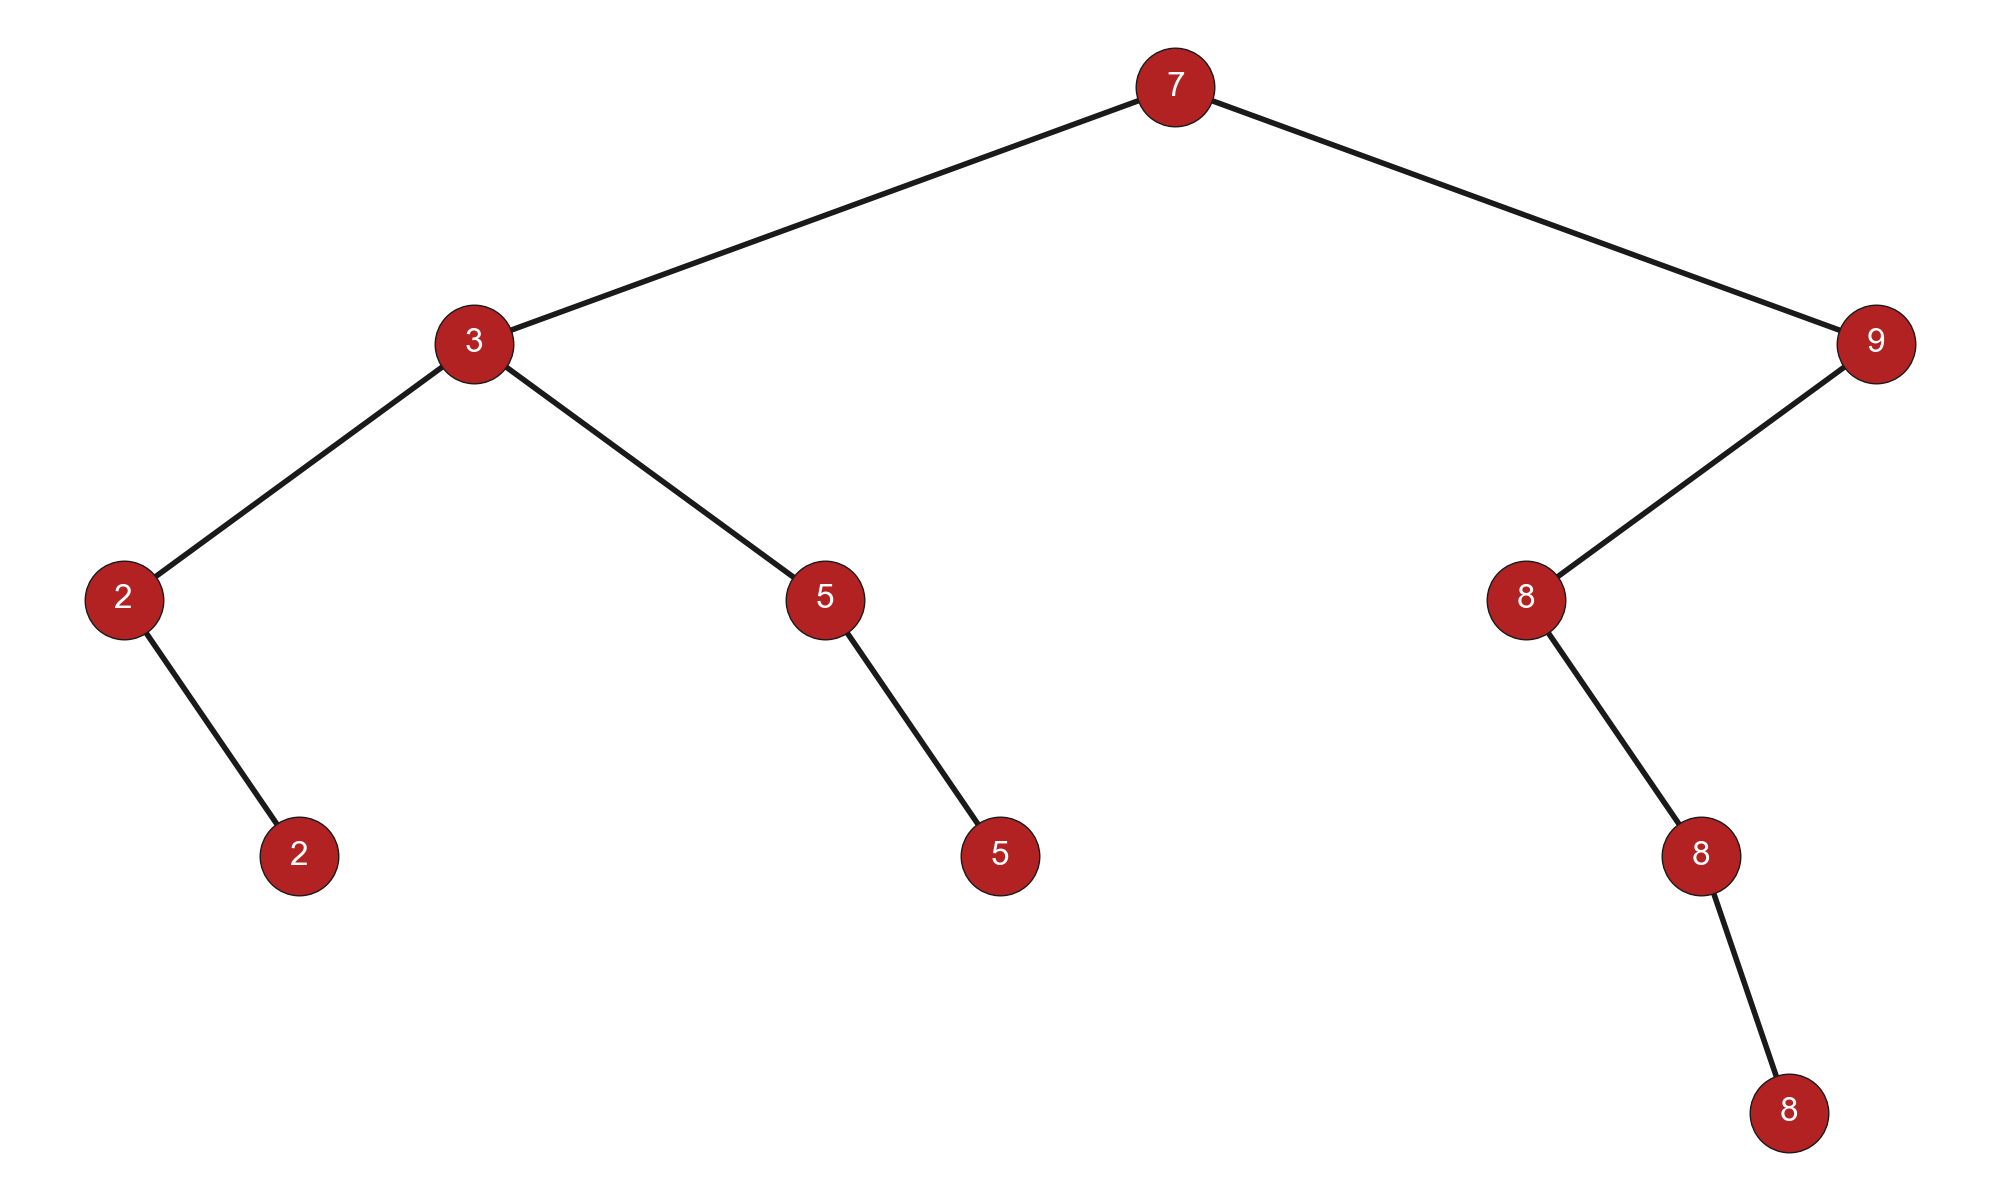

In [8]:
# Graficamos nuestro árbol binario y mostramos la lista de valores insertados.
tree.plot_tree()
print(f"Lista de valores: {vals}")

Podemos observar que el árbol crece conforme la regla de asignación definida en nuestra clase: Dado que el primer valor de la lista es 7, este se define como el nodo raíz. A partir de ahí, los valores siguientes se asignan al árbol siguiendo las reglas del árbol binario:

- `9`: Es mayor que `7`, por lo que se asigna al hijo derecho de la raíz.
- `3`: Es menor que `7`, por lo que se asigna al hijo izquierdo de la raíz.
- `2`: Es menor que `7`, así que se dirige al subárbol izquierdo. Luego, al ser menor que `3`, se asigna como hijo izquierdo de `3`.
- `8`: Es mayor que `7`, así que se dirige al subárbol derecho. Luego, al ser menor que `9`, se asigna como hijo izquierdo de `9`.
- `8` (repetido): Es mayor que `7`, así que se dirige al subárbol derecho. Luego, al ser menor que `9`, se dirige al nodo `8`. Finalmente, al ser igual a `8`, se asigna como hijo derecho del nodo `8` existente.
- `5`: Es menor que `7`, así que se dirige al subárbol izquierdo. Luego, al ser mayor que `3`, se asigna como hijo derecho de `3`.
- `2` (repetido): Es menor que `7`, así que se dirige al subárbol izquierdo. Luego, al ser menor que `3`, se dirige al nodo `2`. Finalmente, al ser igual a `2`, se asigna como hijo derecho del nodo `2` existente.
- `8` (otra repetición): Es mayor que `7`, así que se dirige al subárbol derecho. Luego, al ser menor que `9`, se dirige al nodo `8`. Al ser igual al nodo `8` existente, se desciende al subárbol derecho y se asigna como hijo derecho del nodo `8` ya existente en el tercer nivel.
- `5` (repetido): Es menor que `7`, así que se dirige al subárbol izquierdo. Luego, al ser mayor que `3`, se dirige al nodo `5`. Finalmente, al ser igual a `5`, se asigna como hijo derecho del nodo `5` existente.

Los árboles binarios son un caso de uso muy útil para ejercitar asignaciones recursivas de valores. Se deja como ejercicio al lector describir correctamente las asignaciones del siguiente árbol binario:

Lista de valores: [ 2 15 13  9  9 17  2 14  4  2 11 19 14 15 14]


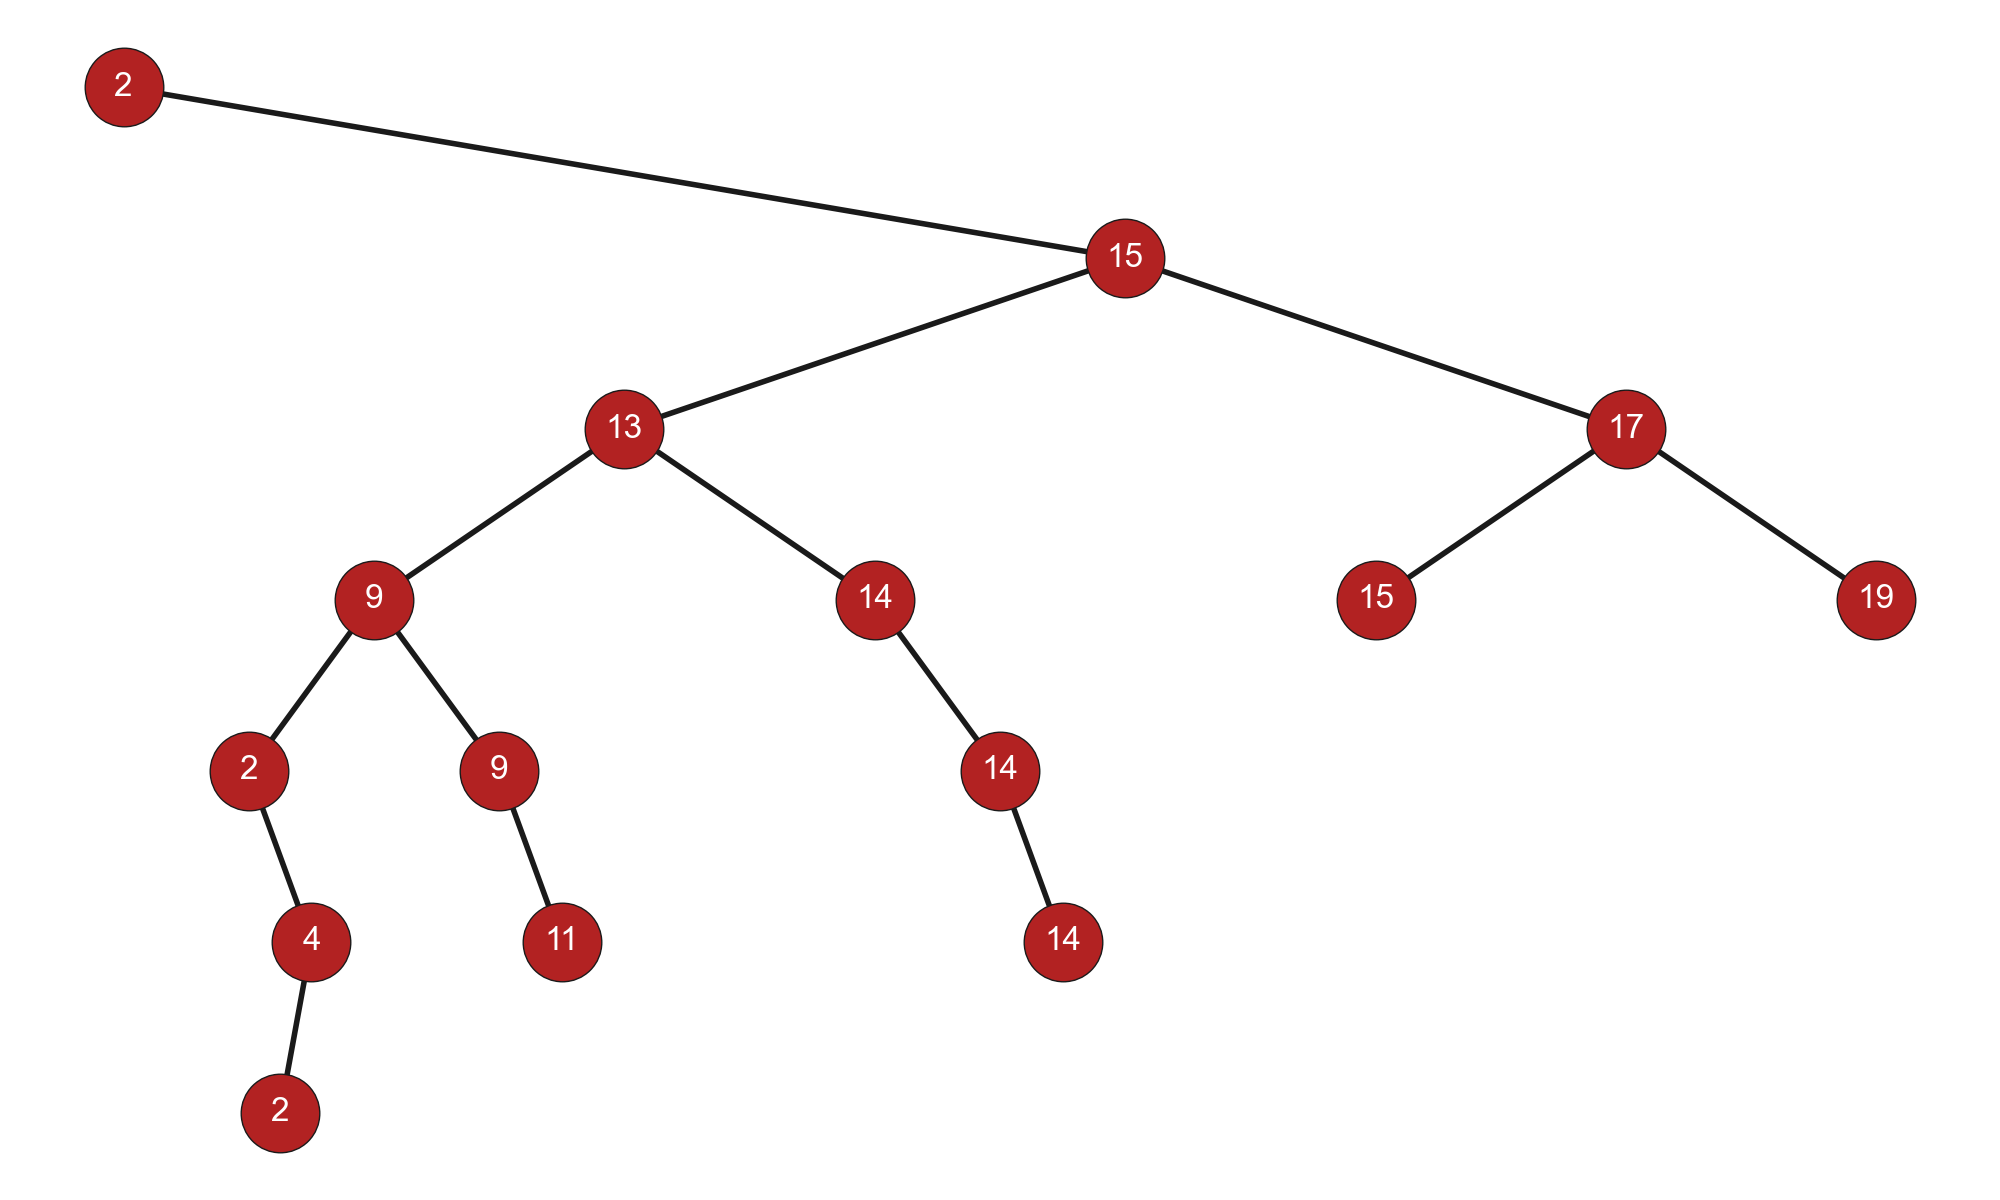

In [9]:
# Inicializamos nuestro árbol.
tree = BinaryTree()

# Hacemos crecer nuestro árbol insertando una lista de valores de manera ordenada.
rng = np.random.default_rng(seed=42)
vals = rng.integers(low=1, high=20, size=15)
for val_j in vals:
    tree.insert(val_j)

# Graficamos nuestro árbol binario y mostramos la lista de valores insertados.
tree.plot_tree()
print(f"Lista de valores: {vals}")

Los árboles binarios son un elemento estructural importante en los árboles de decisión. Como más adelante intentaremos construir una implementación desde cero de este tipo de modelos, este ejercicio es un buen aperitivo. ◼︎

## Criterios de detención.
Las proposiciones (6.1) y (6.2) nos han permitido establecer que, mientras más profundo sea un árbol de decisión, menor será el error que éstos cometerán conforme un set de datos de entrenamiento. Sin embargo, el incremento del número de nodos terminales en un árbol de decisión y, con ello, el aumento en su nivel de complejidad, hace que este tipo de modelos sean muy propensos a capturar particularidades no deseadas de tal set de datos, incluyendo ruido. O, en palabras más simples, **los árboles de decisión suelen ser propensos al overfitting**. Para prevenir este fenómeno, es por tanto necesario determinar el *trade-off* óptimo de complejidad para un modelo de tipo árbol, de manera tal que el error de generalización de dicho modelo sea lo menor posible, lo que suele contrastarse versus un conjunto de datos de prueba.

En primer lugar, consideremos los **criterios de detención** que son inherentes al procedimiento iterativo de particionamiento de un conjunto de entrenamiento, sin importar el (posible) overfitting (es decir, dejamos que árbol de decisión crezca sin límite). Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$ y el vector de valores observados $\mathbf{y}$. Si $f$ representa un modelo de tipo árbol, entonces el nodo $t$ puede setearse en forma inevitable como un nodo terminal cuando el conjunto $\mathcal{D}_{t} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\mathbf{x}_{i} \in \mathcal{X}_{t} \wedge i=1,...,m_{t} \right\}$ ya no pueda dividirse, lo que puede ocurrir en los siguientes casos:

- Cuando los valores de salida en $\mathcal{D}_{t}$ son homogéneos. Esto es, si $y_{i}=y_{i}^{\prime};\forall \left( \mathbf{x}_{i} ,y_{i} \right) \wedge \left( \mathbf{x}_{i}^{\prime} ,y_{i}^{\prime} \right) \in \mathcal{D}_{t}$. En particular, este es necesariamente el caso cuando $m_{t}=1$.
- Cuando los valores de entrada $\mathbf{x}_{i}$ (para $i=1,...,m$) son todos localmente constantes en $\mathcal{D}_{t}$. Esto es, si $\mathbf{x}_{i}= \mathbf{x}_{i}^{\prime};\forall \left( \mathbf{x}_{i} ,y_{i} \right) \wedge \left( \mathbf{x}_{i}^{\prime} ,y_{i}^{\prime} \right) \in \mathcal{D}_{t}$. En esta situación, todas las instancias que se propagan al nodo $t$ tienen el mismo valor y, por lo tanto, no es posible dividir $\mathcal{D}_{t}$ en dos (o más) subespacios no vacíos.

Para prevenir el overfitting, suele definirse un **criterio de detención** en la forma de una heurística que, de alguna manera, limite el número de particiones de $\mathcal{D}_{t}$ si es que el tamaño de dicho subconjunto se ha hecho demasiado pequeño, o bien, si no es posible encontrar un *split* adecuado. Algunos de los enfoques más comúnmente utilizados como criterio de detención en la construcción de un modelo de árbol de decisión, no siendo necesariamente excluyentes entre ellos, son los siguientes:

- Fijar $t$ como un nodo terminal si éste contiene una cantidad menor a un número mínimo de instancias, que solemos designar como $n_{\mathrm{min}}$. En implementaciones o librerías *ad-hoc* (incluyendo a **<font color='mediumorchid'>Scikit-Learn</font>**), este valor mínimo se denomina `min_samples_split`.
- Fijar $t$ como un nodo terminal si el número de niveles de profundidad $d_{\mathrm{max}}$ del árbol de decisión sobrepasa un límite previamente establecido. En implementaciones o librerías *ad-hoc* (incluyendo a **<font color='mediumorchid'>Scikit-Learn</font>**), este valor mínimo se denomina `max_depth`.
- Fijar $t$ como un nodo terminal si la ganancia total de impureza por efecto de un *split* menor que un valor umbral fijo $\beta$. Esto es, si $p\left( t \right) \triangle i\left( s_{t},t \right) <\beta$, donde $s_{t}$ es el split que divide al nodo $t$ y $p(t)$ es la proporción de instancias de $\mathcal{D}$ que caen en $t$ con respecto al total de instancias de entrenamiento. En implementaciones o librerías *ad-hoc* (incluyendo a **<font color='mediumorchid'>Scikit-Learn</font>**), este valor umbral se denominba `min_impurity_decrease`.
- Fijar $t$ como un nodo terminal si existe un *split* tal que los nodos hijos $t_{L}$ y $t_{R}$, entre ambos, contengan al menos $n_{\mathrm{leaf}}$ instancias de entrenamiento. En implementaciones o librerías *ad-hoc* (incluyendo a **<font color='mediumorchid'>Scikit-Learn</font>**), este valor mínimo se denomina `min_samples_leaf`.

Todos los criterios de detención anteriores están definidos por medio del uso de hiperparámetros ($n_{\mathrm{min}}, d_{\mathrm{max}}, \beta$ y $n_{\mathrm{leaf}}$), los que deben ajustarse manualmente a fin de encontrar el *trade-off* ideal entre complejidad y error de generalización para nuestro árbol de decisión, controlando su tamaño. Si el árbol es demasiado grande, es probable que su error de generalización sea muy grande debido a que éste capturará detalles indeseables de un conjunto de entrenamiento, cayendo por tanto en un problema de overfitting. Si el árbol es demasiado pequeño, éste no capturará los detalles de interés a partir del conjunto de entrenamiento y el error de entrenamiento será demasiado grande, resultando por tanto en un caso de underfitting.

**Ejemplo 6.3 – Un primer acercamiento a los árboles de decisión en <font color='mediumorchid'>Scikit-Learn</font>:** Si bien parte de nuestro aprendizaje implicará la construcción de un árbol de decisión desde cero más adelante, primero echaremos un vistazo a las herramientas provistas por **<font color='mediumorchid'>Scikit-Learn</font>** para la implementación de este tipo de modelos. Todo lo relativo a ellos se encuentra disponible en el módulo `sklearn.tree`, y los objetos que nos permitirán construir árboles de clasificación y regresión, según corresponda, son `DecisionTreeClassifier` y `DecisionTreeRegressor`, respectivamente. Por el momento, no ahondaremos en detalle en los hiperparámetros de cada uno (que son esencialmente los mismos), más allá de los que ya hemos establecido previamente como esenciales para definir los criterios de detención en el entrenamiento de un árbol de decisión. Puntualmente, en este ejercicio, probaremos tres de ellos:

- La profundidad máxima del árbol de decisión, controlada por el hiperparámetro `max_depth`. Testearemos los valores `2`, `4` y `6`.
- El número mínimo de instancias que contendrá un nodo terminal, controlado por el hiperparámetro `min_samples_split`. Testearemos los valores `2`, `8` y `16`.
- El número mínimo de instancias que contendrán los nodos hijos de un nodo intermedio, controlado por el hiperparámetro `min_samples_leaf`. Testearemos los valores `1`, `5` y `10`.

Para visualizar los resultados obtenidos por nuestros modelos, haremos uso de nuestro ya viejo conocido conjunto de datos **<font color='forestgreen'>MOONS</font>**. Recordemos que dicho conjunto está constituido por dos nubes de puntos que tienen formas de medialuna, las que se enfrentan entre sí. Cada punto se etiqueta con una clase, denominada `0` o `1`, dependiendo de en cuál medialuna se localice dicho punto. También evaluaremos la calidad de los modelos obtenidos en los correspondientes datos de prueba haciendo uso de métricas tales como la precisión y la sensibilidad:

In [10]:
from sklearn.datasets import make_moons
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Creamos nuestro conjunto de datos.
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

A continuación, construimos nuestros conjuntos de entrenamiento y de prueba:

In [12]:
# Separamos nuestros datos en conjuntos de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Para observar el efecto de los hiperparámetros anteriores, construimos una pequeña grilla de evaluación. Las combinaciones a evaluar serán valor a valor. Notemos que un árbol se hará más complejo a medida que su profundidad aumenta, y menos complejo a medida que el número de instancias mínimas por nodos hoja y por splits aumenta. Por esta razón, las listas que describen los valores a evaluar para los hiperparámetros `min_samples_split` y `min_samples_leaf` tienen un orden decreciente:

In [13]:
# Definimos una grilla fija con valores para nuestros hiperparámetros.
max_depths = [2, 4, 6]
min_samples_splits = [16, 8, 2]
min_samples_leaves = [10, 5, 1]

Siguiendo la filosofía de la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**, la construcción de un modelo de árbol de decisión simplemente precisa de instanciar dicho modelo y luego ajustarlo por medio del método `fit()`. Las predicciones de las clases correspondientes pueden realizarse igualmente por medio del método `predict()`. Los árboles de decisión, además, tienen soporte para la estimación de probabilidades de pertenencia a una clase por medio del método `predict_proba()`, ya que estimar tales probabilidades es sencillo a partir de las proporciones de las instancias que caen en los nodos terminales respecto de sus nodos padres, como vimos en los desarrollos anteriores.

A fin de mostrar los resultados de cada modelo, simplemente graficaremos las predicciones realizadas por el modelo sobre los datos de entrenamiento y las fronteras de separación resultantes en cada caso. Adjunto a los títulos de cada gráfico en los paneles de la figura resultante, también se incorporan los hiperparámetros de cada modelo y los resultados de precisión y sensibilidad sobre los correspondientes datos de prueba:

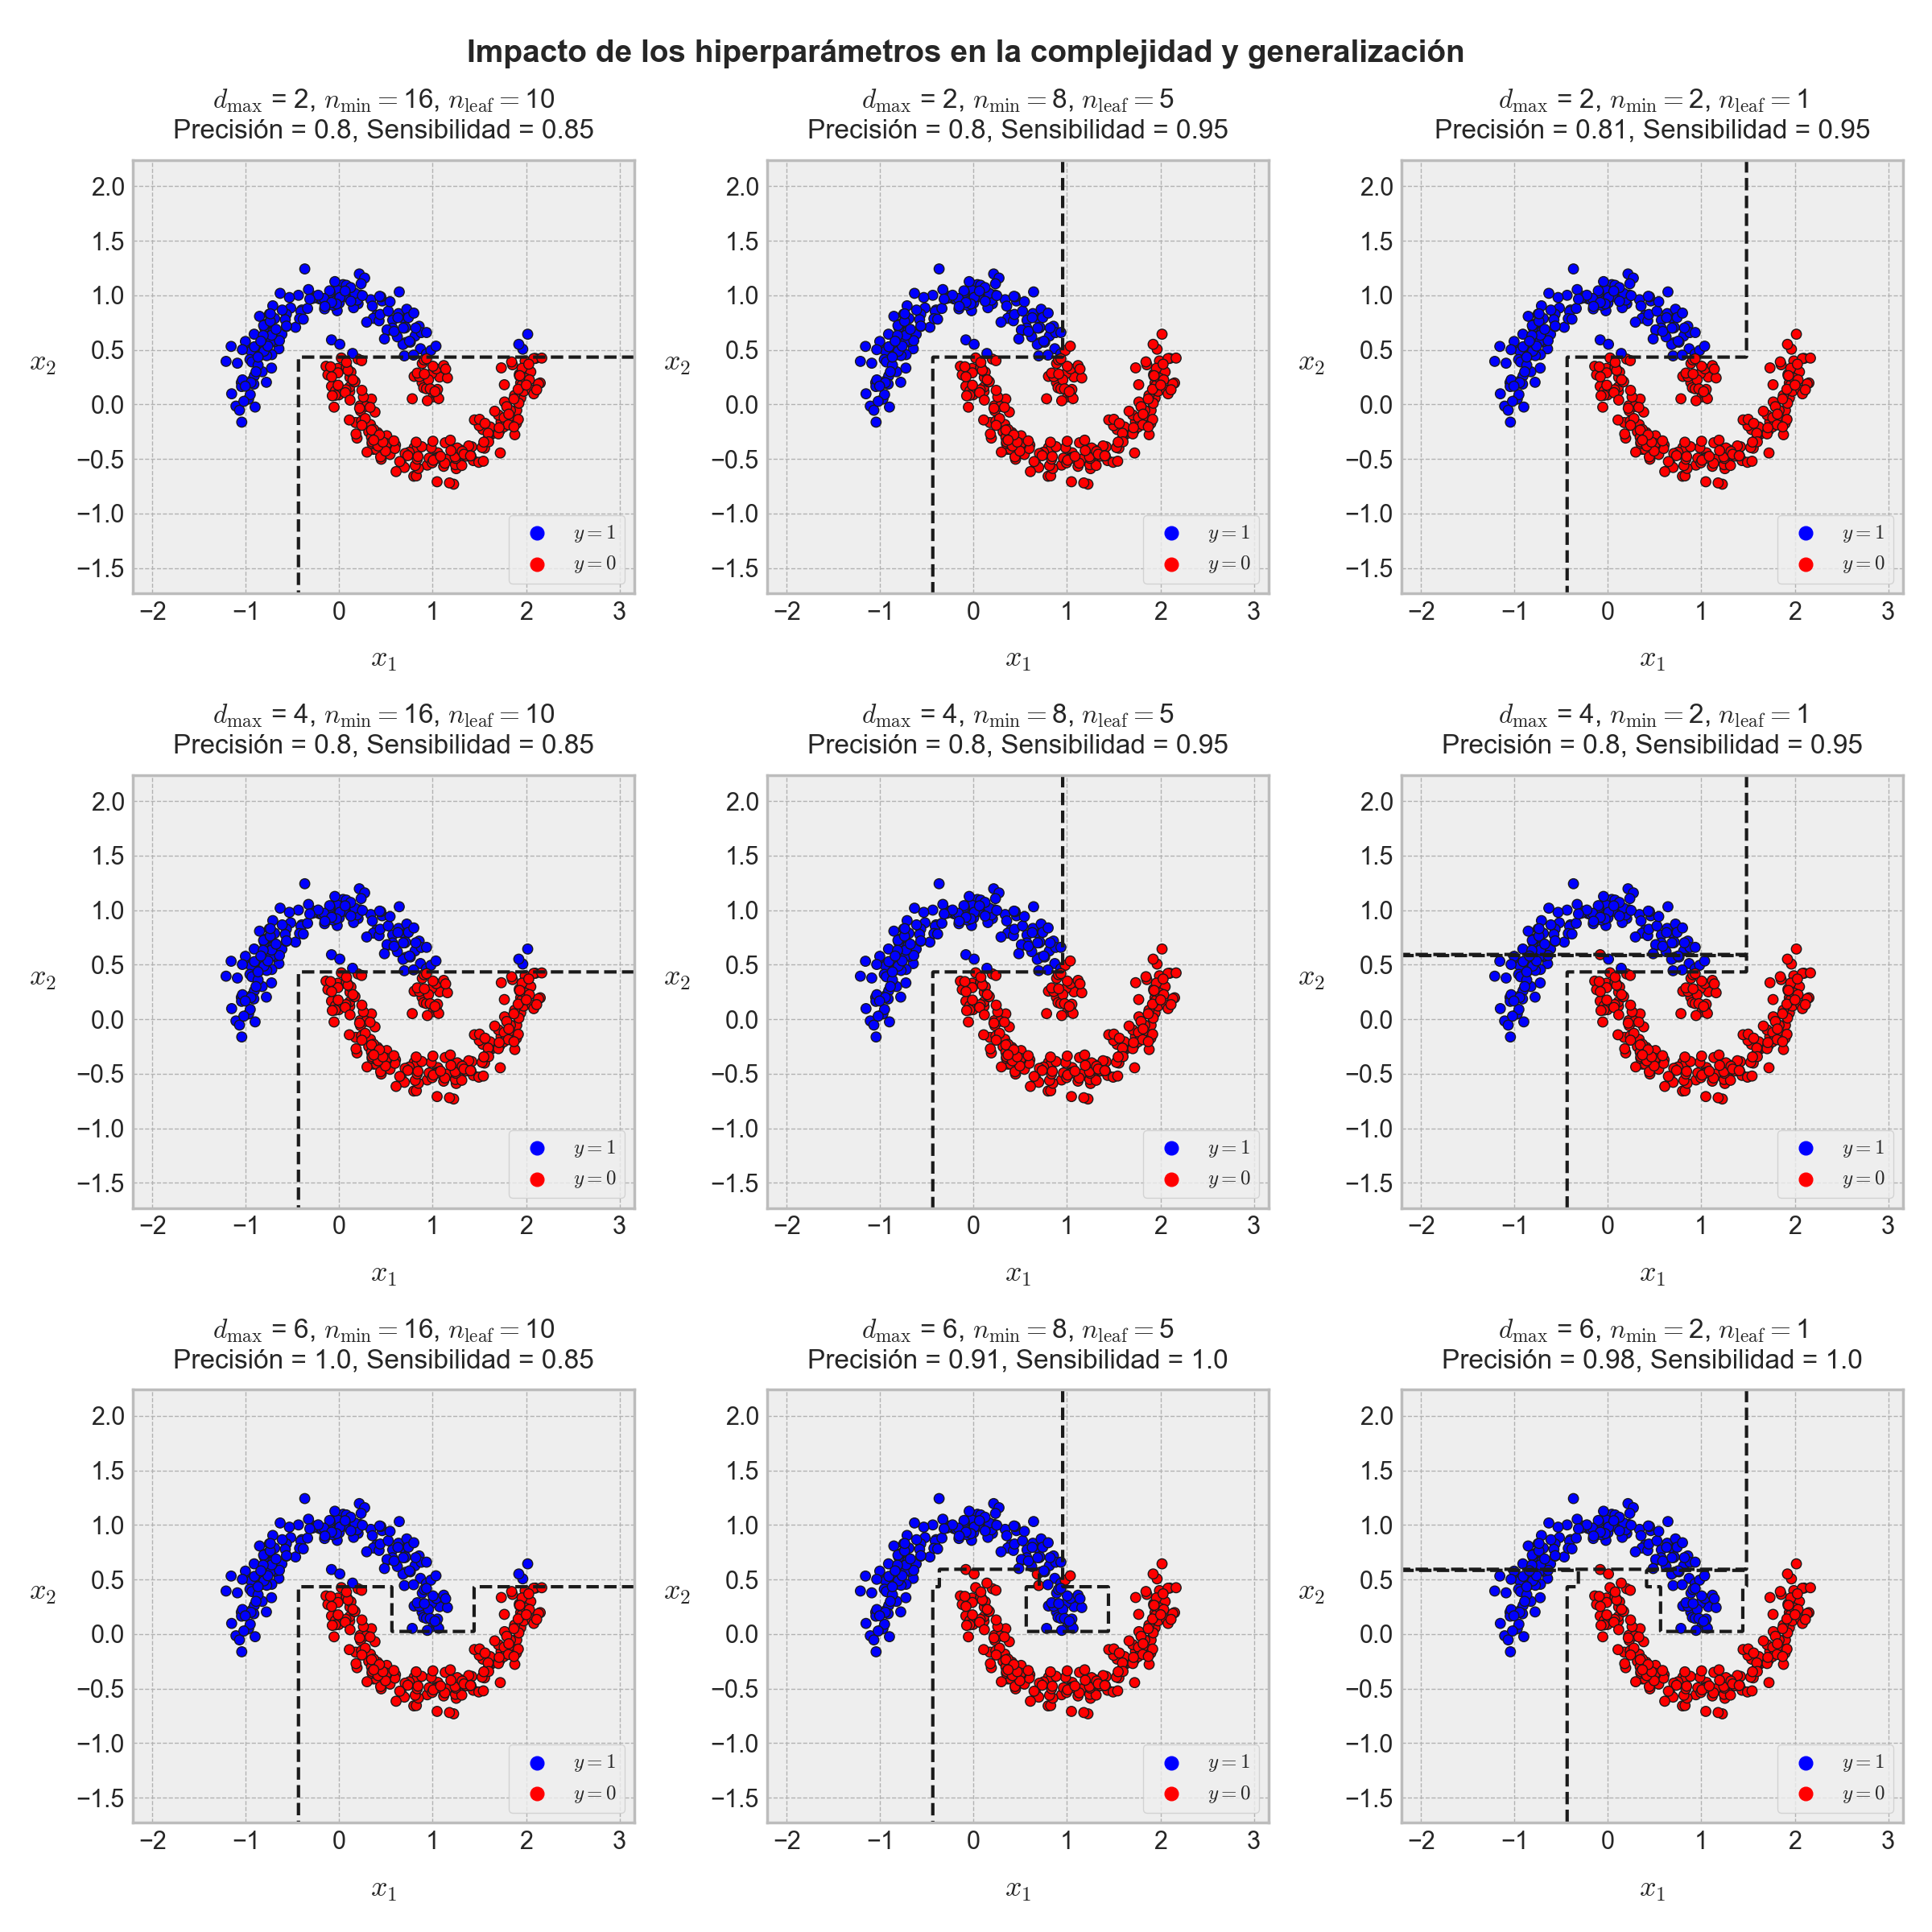

In [14]:
# Entrenamos los modelos y visualizamos los resultados.
fig, ax = plt.subplots(figsize=(12, 12), nrows=3, ncols=3)
fig.suptitle(
    "Impacto de los hiperparámetros en la complejidad y generalización", 
    fontsize=14, fontweight="bold",
)
f1_scores, roc_auc_scores = [], []
for i, max_depth_i in enumerate(max_depths):
    for j, min_samples_split_j in enumerate(min_samples_splits):
        # Entrenamos los modelos para cada combinación de hiperparámetros.
        model_ij = DecisionTreeClassifier(
            max_depth=max_depth_i, min_samples_split=min_samples_split_j, 
            min_samples_leaf=min_samples_leaves[j], random_state=42,
        )
        model_ij.fit(X_train, y_train)

        # Creamos una grilla de puntos en las cuales evaluaremos nuestros modelos.
        x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        X1, X2 = np.meshgrid(
            np.arange(start=x1_min, stop=x1_max, step=0.01), 
            np.arange(start=x2_min, stop=x2_max, step=0.01),
        )
        # Generamos las correspondientes predicciones.
        Z = model_ij.predict(np.c_[X1.ravel(), X2.ravel()])
        Z = Z.reshape(X1.shape)
        y_pred_train = model_ij.predict(X_train)
        y_pred_test = model_ij.predict(X_test)

        # Evaluamos los modelos en los datos de prueba.
        precision_ij = precision_score(y_test, y_pred_test)
        recall_ij = recall_score(y_test, y_pred_test)

        # Graficamos los resultados.
        ax[i, j].scatter(
            X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap="bwr", 
            edgecolors='k', s=20,
        )
        ax[i, j].scatter(x=None, y=None, c="blue", label=r"$y=1$")
        ax[i, j].scatter(x=None, y=None, c="red", label=r"$y=0$")
        ax[i, j].contour(
            X1, X2, Z, levels=[0.5], colors='k', linestyles='--', linewidths=1.5,
        )
        ax[i, j].legend(loc="lower right", fontsize=9, frameon=True)
        ax[i, j].set_xlabel(r"$x_{1}$", fontsize=13, labelpad=10)
        ax[i, j].set_ylabel(r"$x_{2}$", fontsize=13, labelpad=15, rotation=0)
        ax[i, j].set_title(
            r"$d_{\mathrm{max}}$ = " + f"{max_depth_i}"
            + ", " + r"$n_{\mathrm{min}} = $" + f"{min_samples_split_j}"
            + ", " + r"$n_{\mathrm{leaf}} = $" + f"{min_samples_leaves[j]}"
            + "\n" + f"Precisión = {round(precision_ij, 2)}, Sensibilidad = {round(recall_ij, 2)}",
            fontsize=12, pad=10,
        )
    
plt.tight_layout();

Naturalmente, las fronteras de separación que construyen los árboles de decisión son combinaciones de líneas horizontales y verticales, las que cambiarán de dirección tantas veces como el nivel de complejidad que tenga el árbol. Un árbol sencillo, como el localizado en el panel superior central ($d_{\mathrm{max}}=2,n_{\min}=8$ y $n_{\mathrm{leaf}}=5$), genera únicamente tres divisiones del espacio de entrada del problema, resultando en una frontera de separación sencilla entre ambas clases, con resultados *aceptables* sobre datos de prueba (precisión de un 87% y sensibilidad de un 98%). 

Por otro lado, el árbol de decisión que exhibe los mejores resultados sobre datos de prueba (precisión y sensibilidad de un 100%) es aquel cuyos resultados se grafican en el panel inferior central de la figura anterior. La frontera de decisión resultante es mucho más compleja que la de los árboles más simples, con mayores cambios de dirección de las rectas que la componen, resultado de una mayor cantidad de divisiones en los nodos del árbol. Notemos que otras opciones de árbol presentan fronteras menos consistentes y más erráticas, que incluso capturan una cantidad indeseable de ruido desde el conjunto de entrenamiento, lo que lleva a errores de clasificación un tanto más groseros.

En definitiva, considerando únicamente estos hiperparámetros, es razonable elegir combinaciones moderadas de profundidad e instancias por split y nodos terminales, a fin de lograr un buen *trade-off* entre complejidad y generalización.

**Un aspecto importante de los modelos de árbol de decisión es que ya no haremos uso de una fórmula para describirlos**. No porque ésta no exista (ya que siempre puede construirse como una combinación de conjunciones de disyunciones, dependiendo de la cantidad de nodos intermedios), sino porque resulta poco práctica, sobretodo a la hora de interpretar las trayectorias que siguen las instancias a lo largo del árbol y cómo se realizan los *splits*. Por ello, siempre es muy útil contar con una representación gráfica del árbol resultante, la que podemos construir de manera muy sencilla en **<font color='mediumorchid'>Scikit-Learn</font>** por medio de la función `plot_tree()`. Dicha función acepta varios argumentos, entre los cuales consideramos:

- `decision_tree`: Objeto de **<font color='mediumorchid'>Scikit-Learn</font>** que contiene el modelo de árbol de decisión a graficar ya entrenado.
- `filled`: Parámetro Booleano que indica si cada nodo del árbol se coloreará o no, de manera ad-hoc.
- `feature_names`: Lista (o cualquier otro iterable) que contiene los nombres de cada variable independiente.
- `class_names`: Lista (o cualquier otro iterable) que contiene los nombres de las clases que caracterizan a la variable de salida.
- `impurity`: Parámetro Booleano que permite rotular la impureza de cada *split* en los nodos del árbol. En este ejercicio particular, lo desactivaremos, puesto que aún no hemos definido cuáles serán las métricas de impureza a implementar en la decisión de los nodos de un árbol de decisión.
- `node_ids`: Parámetro Booleano que permite elegir si mostramos o no el índice asociado a cada uno de los nodos del árbol de decisión.
- `ax`: Parámetro que permite asociar nuestro árbol a una figura previamente construida en **<font color='mediumorchid'>Matplotlib</font>**, siempre que hayamos individualizado el contenedor donde se almacenan los paneles que constituyen el gráfico (`Axes`).

Mostraremos dos árboles, cada uno de complejidad diferente, correspondientes a los gráficos de los paneles centrales superior e inferior de la figura que construimos previamente:

In [15]:
from sklearn.tree import plot_tree

In [16]:
# Creamos de manera individual un modelo de árbol de baja complejidad, como el del panel superior central.
low_complexity_model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=8, random_state=42)
low_complexity_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

In [17]:
# Creamos de manera individual un modelo de árbol de mayor complejidad, como el del panel inferior central.
high_complexity_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=8, random_state=42)
high_complexity_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=8,
                       random_state=42)

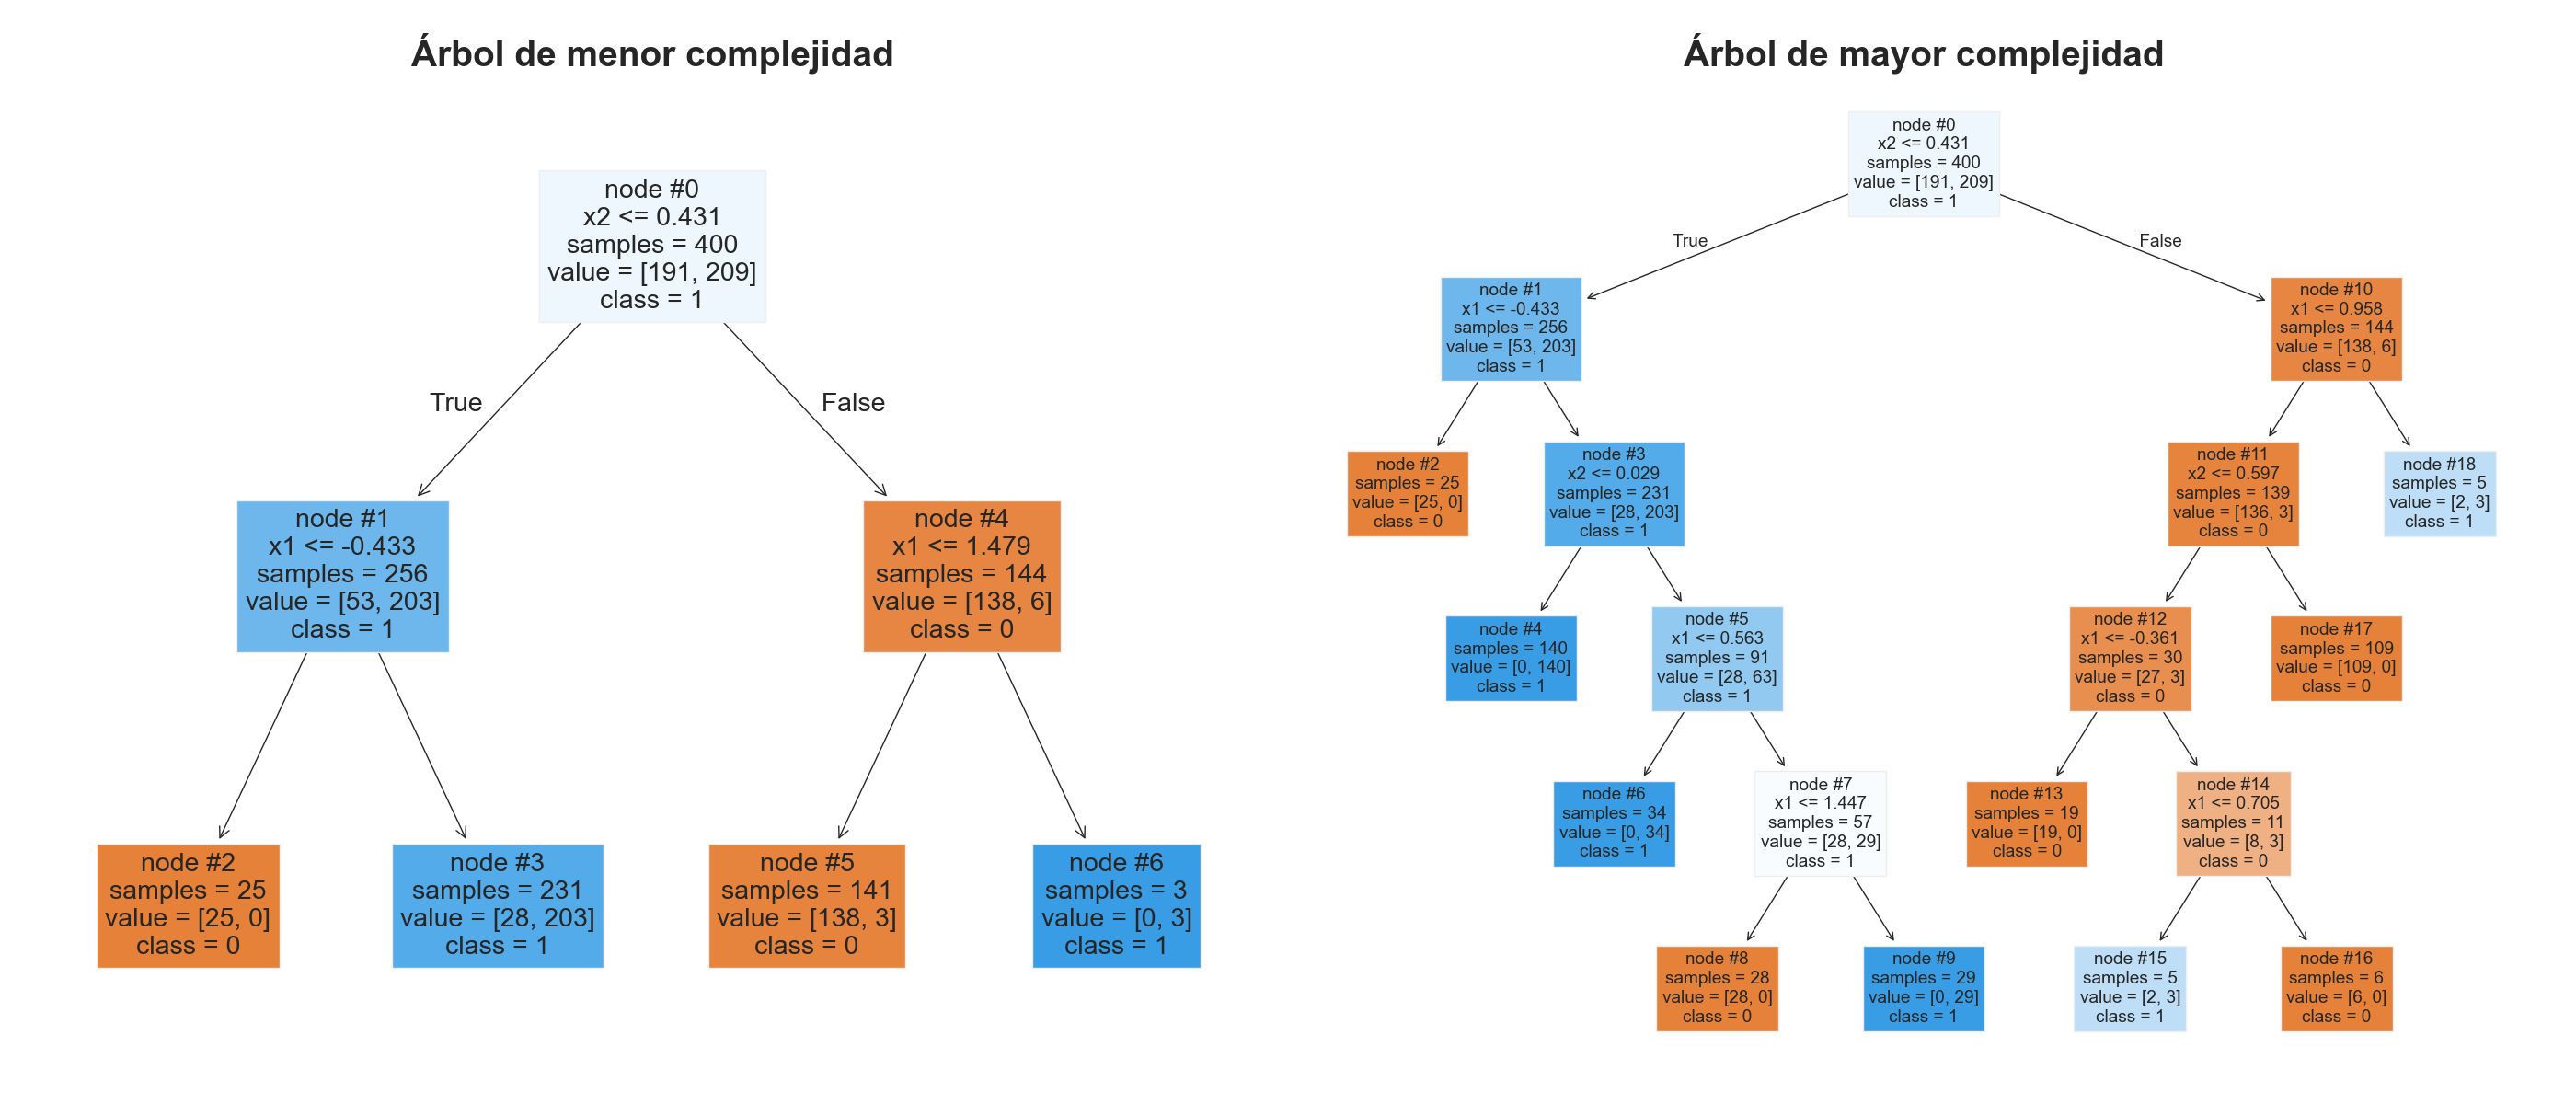

In [18]:
# Mostramos las visualizaciones de cada uno de estos árboles de decisión.
fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
plot_tree(
    decision_tree=low_complexity_model, filled=True, feature_names=["x1", "x2"], 
    class_names=["0", "1"], impurity=False, node_ids=True, ax=ax[0],
)
plot_tree(
    decision_tree=high_complexity_model, filled=True, feature_names=["x1", "x2"], 
    class_names=["0", "1"], impurity=False, node_ids=True, ax=ax[1],
)
ax[0].set_title("Árbol de menor complejidad", fontsize=14, fontweight="bold")
ax[1].set_title("Árbol de mayor complejidad", fontsize=14, fontweight="bold")
plt.tight_layout();

Y ahí lo tenemos. Con estas visualizaciones, es muy sencillo entender el "razonamiento" inherente a cada uno de estos modelos. Por ejemplo, **en el árbol del lado izquierdo**, el primer *split* se realiza sobre el nodo raíz tomando como base a la variable $\mathbf{x}_{2}$ de nuestro conjunto de entrenamiento (que, recordemos, tiene una matriz de diseño $\mathbf{X}$ con sólo dos columnas, que representan a las variables independientes $\mathbf{x}_{1}$ y $\mathbf{x}_{2}$). De esta manera, este primer *split* particiona el espacio de entrada $\mathcal{X}$ conforme la condición (o *pregunta*, en un argot más acorde) $x_{i2}\leq 0.199$, siendo $i=1,...,m$, y $m=400$ el total de instancias del espacio de entrada de este nodo. Todas las instancias en $\mathcal{X}$ que cumplen con dicha condición se propagan al nodo hijo izquierdo de la raíz del árbol, mientras que las instancias que no cumplen con tal condición se propagan al nodo hijo derecho. El gráfico nos muestra cuántas instancias constituyen el espacio de entrada del nodo raíz por medio de la etiqueta `samples = 400`, lo que indica un total de `400` de ellas en la entrada de este nodo, lo que –por supuesto– coincide con el número total de instancias de entrenamiento. También nos indica cuántas instancias en este *split* pertenencen a cada clase por medio de la etiqueta `value = [204, 196]`, lo que indica que `204` instancias en $\mathcal{X}$ son tales que $y_{i}=0$ y `196` son tales que $y_{i}=1$. El nodo raíz se etiqueta con el índice `node #0`, mientras que sus nodos hijos izquierdo y derecho se etiquetan con los índices `node #1` y `node #4`, respectivamente.

En el nodo hijo izquierdo del nodo raíz (`node #1`) se realiza una nueva partición del espacio de entrada, que en este caso podemos designar como $\mathcal{X}_{1}$. Tal partición se realiza ahora con respecto a la variable $\mathbf{x}_{1}$, y es conforme a la condición $x_{i1}\leq -0.467$. De las `176` instancias que se propagan por este nodo, `21` pertenecen a la clase $y_{i}=0$ y `155` pertenecen a la clase $y_{i}=1$. `12` de las instancias de $\mathcal{X}_{t}$ se propagan al nodo hijo izquierdo de `node #1`, todas ellas pertenecientes a la clase $y_{i}=0$. Este nodo hijo es terminal, se etiqueta como `node #2` y se le asigna, por tanto, el valor $\hat{y}_{2}=0$. Notemos que este nodo terminal es **puro**, ya que sólo contiene instancias pertenecientes a una única clase, que es la que finalmente se asigna como valor de salida "local". Dicho de otra forma, **en este nodo terminal (`node #2`) no se cometen errores de clasificación**.

Por otro lado, un total de `164` instancias no cumplen con la condición definida en `node #1` y, por tanto, se propagan a su nodo hijo derecho, que se etiqueta como `node #3`. Este nodo también es terminal y contiene `9` instancias pertenecientes a la clase $y_{i}=0$ y `155` instancias pertenecientes a la clase $y_{i}=1$. A este nodo se le asigna, por tanto, el valor de la clase más frecuente, que es $\hat{y}_{3}=1$. Notemos que, en este caso, la división realizada no es pura, porque hay un total de `9` instancias que se propagan a este nodo que están mal clasificadas. Por lo tanto, en este nodo terminal sí se cometen errores, los que se suman a la cuantía del error de entrenamiento del modelo completo.

La propagación de instancias desde el nodo hijo derecho del nodo raíz es completamente análoga a la anterior, y su descripción se deja como ejercicio al lector.

**En el árbol del lado derecho** la situación es considerablemente distinta, ya que hay un mayor nivel de profundidad y, por tanto, el modelo resultante es de mayor complejidad, por lo que no describiremos las trayectorias que siguen todas las instancias a través de este árbol. Sin embargo, sí comentaremos que la mayoría de los nodos terminales de este árbol son puros, o bien, tienen una proporción pequeña de instancias mal clasificadas. Por ejemplo, el nodo etiquetado como `node #23` tiene asignado como valor de salida a $\hat{y}_{23}=0$. De las `114` instancias que se propagan por este nodo, todas pertenecen a dicha clase, por lo que dicho nodo es puro. El nodo etiquetado como `nodo #21`, por otro lado, no lo es.

La facilidad con la cual podemos leer la forma en la cual un modelo de árbol de decisión resuelve un problema de clasificación no es dependiente del problema en sí. En general, observar la estructura de nuestro modelo siempre será valioso en un contexto de **interpretabilidad**, de la misma forma en la cual observamos la magnitud de los coeficientes de un modelo lineal generalizado para entender el impacto de cada variable independiente conforme el aprendizaje de dicho modelo. Más adelante veremos que los árboles de decisión (y sus modelos derivados) son especialmente útiles para evaluar el impacto de las variables independientes sobre la variable de respuesta. ◼︎

## Reglas de *splitting*.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$ y el vector de valores observados $\mathbf{y}$, siendo $\mathcal{X}$ e $\mathcal{Y}$ los espacios de entrada y salida de $\mathcal{D}$, respectivamente. Sea $f:\mathcal{X}\longrightarrow \mathcal{Y}$ un modelo de tipo árbol que se entrena sobre $\mathcal{D}$. Cuando un criterio de detención no se cumple en un nodo $t$ de dicho árbol, debemos resolver el siguiente sub-problema, conforme el algoritmo (6.2): Encontrar el *split* $s_{t}^{\ast}\in \mathcal{P}$ que maximice la ganancia de impureza $\triangle i(s_{t}^{\ast},t)$. Para ello, es necesario que formalicemos ciertos aspectos estructurales del modelo de árbol de decisión, a fin de poder definir un procedimiento riguroso que permita determinar tal *split*.

### Familias $\mathcal{P}$ de reglas de *splitting*.
Como comentamos al inicio de esta sección, un split $s_{t}$ de un nodo $t$ corresponde a una especie de *pregunta* que permite dividir el subespacio $\mathcal{X}_{t}$ que contiene a todas las instancias de $\mathcal{D}$ que se propagan hasta $t$ en subespacios disjuntos y no vacíos que contendrán las instancias que se propagarán hacia los nodos hijos de $t$. A continuación, formalizaremos este importante elemento estructural en el sentido de que un *split* no es más que una forma de particionar el espacio de entrada que caracteriza a un conjunto de entrenamiento.

**<font color='blue'>Definición 6.3 – Split:</font>** Consideremos el mismo conjunto $\mathcal{D}$ descrito previamente y el mismo modelo de tipo árbol $f:\mathcal{X}\longrightarrow \mathcal{Y}$. Un **split** $s_{t}$ de un nodo $t$ es una partición de $\mathcal{X}_{t}$, tal que cada instancia $\mathbf{x}_{i}\in \mathcal{X}_{t}$ (para $i=1,...,m_{t}$) pertenece a exactamente uno de los subconjuntos resultantes de dicha partición. Es decir, si el split $s_{t}$ particiona a $\mathcal{X}_{t}$ en los subespacios que describen la entrada a los nodos hijos $t_{L}$ y $t_{R}$, digamos $\mathcal{X}_{t_{L}}$ y $\mathcal{X}_{t_{R}}$, entonces cada $\mathbf{x}_{i}\in \mathcal{X}_{t}$ será tal que $\mathbf{x}_{i}\in \mathcal{X}_{t_{L}}\Longrightarrow \mathbf{x}_{i}\notin \mathcal{X}_{t_{R}}$, y viceversa. Necesariamente, lo anterior implica que $\mathcal{X}_{t_{L}}\cap \mathcal{X}_{t_{R}}= \emptyset$.

Si $\mathcal{X}_{t}$ se divide en dos subconjuntos por un split $s_{t}$, dicho split se denomina **binario**. Por convención, los nodos hijos de $t$ serán denotados como $t_{L}$ y $t_{R}$. En un caso más general, $s_{t}$ puede dividir a $\mathcal{X}_{t}$ en más de dos subconjuntos, en cuyo caso tal split se denomina **multinomial**. El conjunto $\mathcal{S}$ de todos los splits posibles para un nodo $t$ es equivalente al conjunto de todas las posibles particiones sobre $\mathcal{X}_{t}$. Por lo tanto, $\mathcal{S}$ es un conjunto infinitamente grande siempre que al menos una de las variables de entrada (columnas de $\mathbf{X}$) sea continua. Por ejemplo, si $\mathcal{X}_{t}= \mathbb{R}$, entonces existen infinitas formas de particionar $\mathcal{X}_{t}$ en dos o más subconjuntos. Sin embargo, entre todas estas opciones, sólo nos interesan aquellas que particionen a $\mathcal{X}_{t}$ (y, por extensión, a $\mathcal{D}_{t} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\mathbf{x}_{i} \in \mathcal{X}_{t} \wedge i=1,...,m_{t} \right\}$, donde $m_{t}$ es el número de instancias en $\mathcal{X}_{t}$) en subconjuntos no vacíos que valga la pena considerar. Por ejemplo, en un árbol binario, los splits que resulten en un nodo hijo vacío no se consideran porque su *bondad* o *idoneidad* no puede evaluarse en el conjunto de entrenamiento. Por lo tanto, el problema de optimización que resulta de encontrar el *mejor* split $s_{t}^{\ast}$ de $\mathcal{X}_{t}$ puede reinterpretarse como el problema de encontrar la "mejor" partición de $\mathcal{X}_{t}$ que resulte en subconjuntos no vacíos de instancias de $\mathcal{D}_{t}$.

Asumiendo que todas las $m_{t}$ instancias que se propagan al nodo $t$ tienen valores distintos, el número de particiones de $\mathcal{X}_{t}$ que resultan en $k$ subconjuntos no vacíos que constituyen los espacios de entrada de los nodos hijos de $t$ puede describirse por medio de la fórmula

$$S\left( m_{t},k \right) =\frac{1}{k!} \sum_{p=0}^{k} \left( -1 \right)^{k-p} \binom{k}{p} p^{m_{t}}$$
<p style="text-align: right;">$(6.19)$</p>

Si $s_{t}$ es un split binario, entonces $S\left( m_{t},2 \right) =2^{m_{t}-1}-1$ particiones posibles. Se tiene pues que el número de particiones poaibles sobre un nodo $t$ crece exponencialmente con el número de instancias que caen en $t$. Por lo tanto, una estrategia basada en pura fuerza bruta para enumerar todas esas particiones y seleccionar la mejor es computacionalmente intratable. Por esta razón, debemos formular ciertos supuestos que simplifiquen la búsqueda del mejor split. En concreto, los algoritmos de inducción de árboles de decisión suelen asumir que tal split $s_{t}^{\ast}$ *vive* en una familia $\mathcal{P}\subseteq \mathcal{S}$ de candidatos con estructura ad-hoc a nuestro problema.

La **familia usual** $\mathcal{P}$ de splits es el conjunto de splits binarios definidos en una única variable y que resultan en subconjuntos no vacíos de $\mathcal{D}_{t}$. Es decir,

$$\mathcal{P} =\left\{ s_{t}|s_{t}\in \bigcup_{j=1}^{n} \mathcal{P} \left( \mathbf{x}_{j} \right) ;\mathcal{D}_{t_{L}} \neq \emptyset \wedge \mathcal{D}_{t_{R}} \neq \emptyset \right\}$$
<p style="text-align: right;">$(6.20)$</p>

Donde $\mathbf{x}_{j}$ hace referencia a dicha variable, siendo ésta una columna de la matriz de diseño $\mathbf{X}$ ($j=1,...,n$). Se reconocen pues dos casos de interés:

**(I)** Si $\mathbf{x}_{j}$ es una variable categórica ordenada que toma valores en $\mathcal{X}_{t}$, entonces el conjunto de todos los splits binarios en $\mathbf{X}_{j}$ es equivalente al conjunto de todas las particiones binarias disjuntas $s_{j}^{v}$ de $\mathcal{X}_{j}$:

$$\mathcal{P} \left( \mathbf{x}_{j} \right) =\left\{ \left( \left\{ \mathbf{x}_{j} |x_{ij}\leq v \right\} \wedge \left\{ \mathbf{x}_{j} |x_{ij}>v \right\} ;\  i=1,...,m \right) |v\in \mathcal{X}_{j} \right\}$$
<p style="text-align: right;">$(6.21)$</p>

Donde $\mathcal{X}_{j}$ es el espacio de todos los valores que puede tomar la $j$-ésima columna de la matriz de diseño $\mathbf{X}$ (a veces denominado *$j$-ésimo espacio columna* de $\mathbf{X}$). Desde un punto de vista geométrico, los splits definidos como en (6.21) particionan el espacio de entrada de un nodo $t$ por medio de hiperplanos que son todos paralelos a los ejes coordenados. En consecuencia, el **umbral de decisión** $v$ representa la distancia de dicho hiperplano al origen.

**(II)** Si $\mathbf{x}_{j}$ es una variable categórica que toma valores en $\mathcal{X}_{j}=\left\{ b_{1},...,b_{k} \right\}$, entonces el conjunto de todos los splits binarios en $\mathcal{X}_{j}$ es equivalente al conjunto de todas las particiones binarias no vacías de $\mathcal{X}_{j}$:

$$\mathcal{P} \left( \mathbf{x}_{j} \right) =\left\{ \left( \left\{ \mathbf{x}_{j} |x_{ij}\in \mathcal{B} \right\} \wedge \left\{ \mathbf{x}_{j} |x_{ij}\in \overline{\mathcal{B}} \right\} ;i=1,...,m \right) |\mathcal{B} \subset \left\{ b_{1},...,b_{k} \right\} \right\}$$
<p style="text-align: right;">$(6.22)$</p>

Donde $\overline{\mathcal{B}} =\left\{ b_{1},...,b_{k} \right\} \backslash \mathcal{B}$ es el complemento de $\mathcal{B}$.

Dada la descomposición (6.20) en subconjuntos del tipo $\mathcal{P} \left( \mathbf{x}_{j} \right)$, el split $s_{t}^{\ast}\in \mathcal{P}$ será el "mejor" de los "mejores" splits definidos en cada una de las variables independientes (columnas) que constituyen la matriz de diseño $\mathbf{X}$. Esto es,

$$s_{t}^{\ast}=\underset{s_{t}^{\ast}\left( j \right)}{\mathrm{argmax}} \left( \triangle i\left( s_{t}^{\ast}\left( j \right) ,t \right) \right) \  \  \wedge \  \  s_{t}^{\ast}\left( j \right) =\underset{\begin{matrix}s\in \mathcal{P} \left( \mathbf{x}_{j} \right)\\ \mathcal{D}_{t_{L}} \wedge \mathcal{D}_{t_{R}} \neq \emptyset\end{matrix}}{\mathrm{argmax}} \left( \triangle i\left( s,t \right) \right)$$
<p style="text-align: right;">$(6.23)$</p>

El problema de encontrar el mejor split para un nodo es, por tanto, equivalente al problema (6.23).

Mientras las particiones descritas por las fórmulas (6.21) y (6.22) ciertamente constituyen los tipos de splits más comunes en un árbol de decisión, existen otras propuestas en la literatura especializada que vale la pena considerar. Por ejemplo, los algoritmos ID3 y C4.5 (Quinlan, 1986 - 1993) reemplazan los splits binarios sobre variables categóricas con splits denominados **multidireccionales**. Esto es, si $\mathcal{X}_{j}$ contiene un total de $k$ valores, digamos $b_{1},...,b_{k}$, entonces un split sobre $\mathbf{x}_{j}$ divide al espacio $\mathcal{X}_{j}$ en $k$ nodos hijos, uno por cada valor que puede tomar $\mathbf{x}_{j}$. Por lo tanto, en nuestro desarrollo, $\mathcal{P}(\mathbf{x}_{j})$ se reduce a la expresión

$$\mathcal{P} \left( \mathbf{x}_{j} \right) =\left\{ \left( \left\{ \mathbf{x}_{j} |x_{ij}=b_{r} \right\} |b_{r}\in \mathcal{X}_{j} \  ;\  i=1,...,m\wedge r=1,...,k \right) \right\}$$
<p style="text-align: right;">$(6.24)$</p>

Otros algoritmos proponen reemplazar los splits que resultan en hiperplanos paralelos a los ejes coordenados por hiperplanos con orientaciones arbitrarias, lo que resulta en árboles igual de precisos, pero de menor complejidad. Sin embargo, en un marco de referencia como éste, la descomposición (6.23) deja de ser válida, lo que deriva en que la búsqueda del "mejor" split sea un proceso computacionalmente mucho más costoso. El campo de estudio de los árboles de decisión es vasto y, aún hoy, sigue en desarrollo.

### Bondad o idoneidad de un split.
A continuación, describiremos métricas de impureza $i(t)$ que nos permitirán evaluar qué tan bueno es un split $s_{t}$ para un nodo $t$ en un árbol de decisión. Como en el desarrollo que realizamos para la inducción de un árbol de decisión, ahora también separaremos el estudio de estas métricas en función de si el problema de interés es de clasificación o de regresión.

#### Problema de clasificación.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$ y el vector de valores observados $\mathbf{y}$, el que sólo puede tomar una cantidad finita de valores. Sin pérdida de generalidad, consideremos el caso para el cual $\mathcal{D}$ viene definido por la estructura mostrada en la Tabla (6.2).

<p style="text-align: center;">Tabla (6.2): Tabla de verdad que describe al conjunto de entrenamiento $\mathcal{D}$</p>

| $i$ | Variable $\mathbf{x}_{1}$ | Variable $\mathbf{x}_{2}$ | Variable $\mathbf{x}_{3}$ | Salida $\mathbf{y}$ |
| :-: | :-----------------------: | :-----------------------: | :-----------------------: | :-----------------: |
| 0 | 0 | 0 | 0 | $c_{1}$ |
| 1 | 0 | 0 | 1 | $c_{1}$ |
| 2 | 0 | 1 | 0 | $c_{2}$ |
| 3 | 0 | 1 | 1 | $c_{2}$ |
| 4 | 0 | 1 | 1 | $c_{2}$ |
| 5 | 1 | 0 | 0 | $c_{2}$ |
| 6 | 1 | 0 | 0 | $c_{2}$ |
| 7 | 1 | 0 | 0 | $c_{2}$ |
| 8 | 1 | 0 | 0 | $c_{2}$ |
| 9 | 1 | 1 | 1 | $c_{2}$ |

En este caso, $m=10 \wedge n=3$ (es decir, el espacio de entrada $\mathcal{X}$ estará constituido por tres variables independientes y contiene un total de diez instancias). Sea $\mathcal{X}_{j}$ el espacio de entrada asociado a cada variable independiente ($j=1,2,3$), el cual es binario para todo $j$. Sea $f:\mathcal{X}\longrightarrow \mathcal{Y}$ un modelo de árbol de decisión, siendo $\mathcal{Y}$ el espacio de salida $\mathcal{D}$ (que también es binario). En el nodo raíz $t_{0}$ del árbol, el conjunto de instancias que entran a este nodo, denotado como $\mathcal{D}_{0}$, es equivalente a $\mathcal{D}$. Queremos pues encontrar el mejor split binario definido sobre una de las variables de entrada. Dado que cada una de ellas es categórica, la familia $\mathcal{P}(\mathbf{x}_{j})$ cuenta exactamente un split por variable, donde cada uno particiona a $\mathcal{D}_{0}$ en dos subespacios:

$$\begin{array}{lll}\mathcal{D}_{t_{L}}^{\left( 0 \right)}&=&\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{0} ,x_{ij}=0 \right\}\\ \mathcal{D}_{t_{R}}^{\left( 0 \right)}&=&\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{0} ,x_{ij}=1 \right\}\end{array}$$
<p style="text-align: right;">$(6.25)$</p>

Como establecimos en un principio, nuestro objetivo es particionar $\mathcal{D}_{0}$ usando el split $s_{0}^{\ast}$ que maximice la ganancia de impureza:

$$\triangle i\left( s_{t_{0}},t_{0} \right) =i\left( t_{0} \right) -p_{L}^{\left( 0 \right)}i\left( t_{L}^{\left( 0 \right)} \right) -p_{R}^{\left( 0 \right)}i\left( t_{R}^{\left( 0 \right)} \right)$$
<p style="text-align: right;">$(6.26)$</p>

Donde la función de impureza $i(t_{0})$ evalúa la bondad del nodo $t_{0}$. Dado que nuestro objetivo es construir un modelo de árbol de decisión que minimice el correspondiente error de generalización, parece natural tomar como estimador de dicho error al error de entrenamiento local en $t_{0}$. Tiene sentido pues la siguiente definición.

**<font color='blue'>Definición 6.4 – Función de impureza para modelos de clasificación:</font>** Consideremos el conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$, donde $\mathcal{X}$ e $\mathcal{Y}$ son los espacios de entrada y salida de $\mathcal{D}$, siendo $\mathcal{Y} =\left\{ c_{1},...,c_{k} \right\}$, respectivamente. Sea $f:\mathcal{X}\longrightarrow \mathcal{Y}$ un modelo de árbol de decisión, y sea $t$ un nodo de $f$, donde la clase más frecuente en $\mathcal{D}_{t}$ es $c_{r}$ ($1\leq r\leq k$). Si el modelo $f$ se entrena por medio de un algoritmo voraz usando la función de pérdida binaria como función de costo, entonces la **función de impureza** $i_{E}(t)$, con base en el error de entrenamiento de $f$, se define como

$$i_{E}\left( t \right) =1-\max_{c_{r}\in \mathcal{Y}} \left\{ p\left( c_{r}|t \right) \right\}$$
<p style="text-align: right;">$(6.27)$</p>

El criterio que se deriva de la ecuación (6.27) implica que el "mejor" split será aquel que minimice el error de entrenamiento local del modelo en cada nodo. Si bien esto parece algo obvio, se trata en verdad de un enfoque que tiene dos principales desventajas:

- Como corolario de las proposiciones (6.1) y (6.2), $\triangle i\left( s_{t},t \right)$ será cero para todo split $s_{t}$ si la clase más frecuente es la misma en ambos nodos hijos. Esto es, si $\hat{y}_{t}=\hat{y}_{t_{L}}=\hat{y}_{t_{R}}$. En el problema descrito por la tabla (6.2), si generamos un split en cualquiera de las variables $\mathbf{x}_{1},\mathbf{x}_{2}$ o $\mathbf{x}_{3}$, produciremos nodos hijos en los cuales $c_{2}$ será siempre la clase más frecuente. Como resultado $\triangle i(s_{t_{0}},t_{0})= 0$ para los tres posibles splits, como si fueran igualmente malos, o como si no fuera posible mejorar más los resultados.

- La función de impureza (6.27) no es sensible a los cambios en las distribuciones a posteriori $p\left( y|t_{L} \right)$ y $p\left( y|t_{R} \right)$. En el problema descrito por la tabla (6.2), ninguno de los tres splits mejora el error de entrenamiento. Sin embargo, la división del nodo raíz $t_{0}$ conforme $\mathcal{X}_{1}$ es propensa a generar un árbol más simple que los resultantes de dividir dicho nodo conforme el resto de las variables. Como se muestra en la Fig. (6.3), la división conforme $\mathcal{X}_{1}$ produce un nodo hijo derecho que ya es terminal y para el cual no se requiere más trabajo, ya que es puro. La división conforme $\mathcal{X}_{2}$ también resulta en nodo hijo derecho que es puro, pero con un nodo hijo izquierdo más "grande" (con un mayor número de instancias), lo que sugiere un mayor trabajo para separar adecuadamente las clases. Finalmente, la división del nodo raíz $t_{0}$ conforme $\mathcal{X}_{3}$ produce dos nodos que no son puros, lo que implica aún más trabajo. Por lo tanto, la división según $\mathcal{X}_{1}$ es la mejor, incluso aunque no reduzca el error de entrenamiento del modelo en este paso.

<p style="text-align: center;"><img src="figures/fig_6_3.png" width="900"></p>
<p style="text-align: center;">Fig. (6.3): Nodos hijos resultantes de dividir el nodo raíz de un árbol sencillo para el problema descrito por la tabla (6.2) con respecto a las variables $\mathcal{X}_{1},\mathcal{X}_{2}$ y $\mathcal{X}_{3}$</p>

Los problemas anteriormente descritos se deben al hecho de que el algoritmo voraz (6.2) está basado en un procedimiento de optimización de un solo paso. Un buen criterio de impureza, idealmente, debiera tomar en consideración la posibilidad de realizar mejoras más profundas en nuestro árbol de decisión. Para evitar las propiedades indeseables previamente descritas de la función (6.27), la elección de $i(t)$ debiera guiarse por el aseguramiento de que la impureza se haga progresivamente más pequeña cuando el nodo $t$ se haga más homogéneo hacia una (o algunas) de las clases (lo que no es necesariamente compatible con el mejoramiento del error de clasificación) y más grande cuando el nodo $t$ se haga más heterogéneo. El siguiente teorema, formulado en el [trabajo de Breiman et al (1984)](https://www.scirp.org/reference/referencespapers?referenceid=2144582), permite identificar una clase de funciones de impureza que cumplen con estos requerimientos.

**<font color='indianred'>Teorema 6.1:</font>** *Sea $\Phi \left( p_{1},...,p_{r} \right)$ una función $r$-aria estrictamente cóncava, definida en el conjunto $U=\left\{ p_{k}\in \mathbb{R} \  |\  0\leq p_{k}\leq 1\wedge k=1,...,r \right\}$, con $\sum\nolimits_{k=1}^{r} p_{k}=1$, tal que*

- *$\Phi \left( 1,0,...,0 \right) =\Phi \left( 0,1,...,0 \right) =\cdots =\Phi \left( 0,0,...,1 \right)$ es mínimo.*
- *$\Phi \left( \frac{1}{r} ,...,\frac{1}{r} \right)$ es máximo.*

*Entonces, para $i\left( t \right) =\Phi \left( p\left( c_{1}|t \right) ,...,p\left( c_{r}|t \right) \right)$ y un split arbitrario $s_{t}$ sobre el nodo $t$, se tendrá que*

$$\triangle i\left( s_{t},t \right) \geq 0$$
<p style="text-align: right;">$(6.28)$</p>

*Donde la igualdad se da si y sólo si $p\left( c_{k}|t_{L} \right) =p\left( c_{k}|t_{R} \right) =p\left( c_{k}|t \right)$ para todo $k=1,...,r$.* □

**<font color='indianred'>Demostración del teorema 6.1:</font>** Por hipótesis, la función $\Phi$ es estrictamente cóncava en el conjunto de todas las distribuciones de probabilidad de $r$ clases. Por definición de función cóncava (que es lo opuesto a una función convexa), si tomamos dos distribuciones $\mathbf{p}$ y $\mathbf{q}$ distintas, entonces se tendrá que

$$\Phi \left( \alpha \mathbf{p} +\left( 1-\alpha \right) \mathbf{q} \right) >\alpha \Phi \left( \mathbf{p} \right) +\left( 1-\alpha \right) \Phi \left( \mathbf{q} \right)$$
<p style="text-align: right;">$(6.29)$</p>

Para todo escalar $\alpha$ tal que $0<\alpha <1$. Definamos ahora las probabilidades $\mathbf{p} =\left( p\left( c_{1}|t \right) ,...,p\left( c_{r}|t \right) \right)$, $\mathbf{p}_{L} =\left( p\left( c_{1}|t_{L} \right) ,...,p\left( c_{r}|t_{L} \right) \right)$ y $\mathbf{p}_{R} =\left( p\left( c_{1}|t_{R} \right) ,...,p\left( c_{r}|t_{R} \right) \right)$. Por definición de probabilidad condicional, se tiene que cada componente de $\mathbf{p}$ es un promedio (ponderado por las probabilidades asociadas a los nodos hijos, $p_{L}$ y $p_{R}$) de las correspondientes componentes de $\mathbf{p}_{L}$ y $\mathbf{p}_{R}$. Es decir, $p\left( c_{k}|t \right) =p_{L}p\left( c_{k}|t_{L} \right) +p_{R}p\left( c_{k}|t_{R} \right)$ para todo $k=1,...,r$. Reescribiendo $\mathbf{p}$ en forma vectorial, obtenemos

$$\mathbf{p} =p_{L}\mathbf{p}_{L} +p_{R}\mathbf{p}_{R}$$
<p style="text-align: right;">$(6.30)$</p>

Poniendo $i(t)=\Phi(\mathbf{p})$, la ganancia de impureza puede escribirse como

$$\triangle i\left( s_{t},t \right) =\Phi \left( \mathbf{p} \right) -p_{L}\Phi \left( \mathbf{p}_{L} \right) -p_{R}\Phi \left( \mathbf{p}_{R} \right)$$
<p style="text-align: right;">$(6.31)$</p>

Como la función $\Phi$ es estrictamente cóncava, se tiene que

$$\Phi \left( p_{L}\mathbf{p}_{L} +p_{R}\mathbf{p}_{R} \right) >p_{L}\Phi \left( \mathbf{p}_{L} \right) +p_{R}\Phi \left( \mathbf{p}_{R} \right)$$
<p style="text-align: right;">$(6.32)$</p>

De donde concluimos que

$$\begin{array}{lll}\triangle i\left( s_{t},t \right)&=&\Phi \left( \mathbf{p} \right) -p_{L}\Phi \left( \mathbf{p}_{L} \right) -p_{R}\Phi \left( \mathbf{p}_{R} \right)\\ &=&\underbrace{\Phi \left( p_{L}\mathbf{p}_{L} +p_{R}\mathbf{p}_{R} \right)}_{>p_{L}\Phi \left( \mathbf{p}_{L} \right) +p_{R}\Phi \left( \mathbf{p}_{R} \right)} -p_{L}\Phi \left( \mathbf{p}_{L} \right) -p_{R}\Phi \left( \mathbf{p}_{R} \right)\\ &>&0\end{array}$$
<p style="text-align: right;">$(6.33)$</p>

Es decir, si $\mathbf{p}_{L}\neq \mathbf{p}_{R}$, se produce una ganancia positiva de impureza ($\triangle i> 0$).

Notemos que, si $\Phi \left( \mathbf{p} \right) =p_{L}\Phi \left( \mathbf{p}_{L} \right) +p_{R}\Phi \left( \mathbf{p}_{R} \right)$, entonces $\triangle i= 0$, que es lo que ocurre cuando $\mathbf{p} =\mathbf{p}_{L} =\mathbf{p}_{R}$. Por lo tanto, se tendrá que $p\left( c_{k}|t \right) =p\left( c_{k}|t_{L} \right) =p\left( c_{k}|t_{R} \right)$, por lo que, en efecto, no hay ganancia de impureza al dividir $t$, pues los nodos hijos izquierdo ($t_{L}$) y derecho ($t_{R}$) tienen la misma distribución de clases que $t$, lo que demuestra el teorema (6.1). □

**Ejemplo 6.4 – El índice de Gini:** Resulta evidente que las funciones que satisfacen el teorema (6.1) son las más adecuadas para usarse como métricas de impureza en la construcción de un modelo de árbol de decisión. Hay opciones populares en la práctica, pero en realidad, toda función estrictamente cóncava que satisfaga las condiciones de dicho teorema debiera ser suficiente. Un ejemplo es la función $G:([0,1])^{r}\longrightarrow [0,1-\frac{1}{r}]$, definida como $G\left( \mathbf{p} \right) =1-\sum\nolimits_{k=1}^{r} p_{k}^{2}$, denominada **coeficiente o índice de Gini**, donde $r$ es el número de clases que constituyen el espacio de salida $\mathcal{Y}$ en un problema de interés y $p_{k}$ la probabilidad de pertenencia de una instancia a la clase $k$, con $k=1,...,r$.

A fin de observar el efecto del índice de Gini como métrica de impureza resultante de la división de un nodo, consideremos el conjunto de datos descrito por la Tabla (6.2). En el nodo raíz ($t_{0}$), se tiene que $p\left( c_{1}|t_{0} \right) =\frac{2}{10} \wedge p\left( c_{2}|t_{0} \right) =\frac{8}{10}$, por lo que el índice de Gini en este nodo nos da $G\left( t_{0} \right) =1-\left[ \left( \frac{2}{10} \right)^{2} +\left( \frac{8}{10} \right)^{2} \right] =0.32$. Ahora comprobamos los mismos valores conforme las divisiones según los espacios de entrada $\mathcal{X}_{1},\mathcal{X}_{2}$ y $\mathcal{X}_{3}$:

- División según $\mathcal{X}_{1}$:

    - **Nodo hijo izquierdo ($t_{1}$):** Consideramos todos los valores tales que $x_{i1}=0$ (para $i=1,2,...,10$). El número de instancias que se propagan a este nodo es $m_{t_{1}}=5$ y, por lo tanto, las probabilidades de clase son $p\left( y=c_{1}\wedge \mathcal{X}_{1} =0|t_{1} \right) =\frac{2}{5}$ y $p\left( y=c_{2}\wedge \mathcal{X}_{1} =0|t_{1} \right) =\frac{3}{5}$. El índice de Gini que mide la ganancia de impureza en $t_{1}$ sobre el split definido en $\mathcal{X}_{1}$ nos da $G\left( t_{1} \right) =1-\left[ \left( \frac{2}{5} \right)^{2} +\left( \frac{3}{5} \right)^{2} \right] =0.48$.
    - **Nodo hijo derecho ($t_{2}$):** Consideramos todos los valores tales que $x_{i1}=1$ (para $i=1,2,...,10$). El número de instancias que se propagan a este nodo es $m_{t_{2}}=5$ y, por lo tanto, las probabilidades de clase son $p\left( y=c_{1}\wedge \mathcal{X}_{1} =1|t_{2} \right) =\frac{0}{5}= 0$ y $p\left( y=c_{2}\wedge \mathcal{X}_{1} =1|t_{2} \right) =\frac{5}{5}= 1$. El índice de Gini que mide la ganancia de impureza en $t_{2}$ sobre el split definido en $\mathcal{X}_{1}$ nos da $G\left( t_{1} \right) =1-\left[ 0^{2} +1^{2} \right] =0$.
    - En general, $p_{L}=\frac{1}{2}\wedge p_{R}=\frac{1}{2}$, por lo cual la ganancia de impureza por este split completo será

$$\begin{array}{lll}\triangle i(s_{t_{0}},t_{0}|\mathcal{X}_{1} )&=&G\left( t_{0} \right) -p_{L}G\left( t_{1} \right) -p_{R}G\left( t_{2} \right)\\ &=&0.32-\left( 0.5\cdot 0.48+0.5\cdot 0 \right)\\ &=&0.08\end{array}$$
<p style="text-align: right;">$(6.34)$</p>

- División según $\mathcal{X}_{2}$:

    - **Nodo hijo izquierdo ($t_{1}$):** Consideramos todos los valores tales que $x_{i2}=0$ (para $i=1,2,...,10$). El número de instancias que se propagan a este nodo es $m_{t_{1}}=6$ y, por lo tanto, las probabilidades de clase son $p\left( y=c_{1}\wedge \mathcal{X}_{2} =0|t_{1} \right) =\frac{2}{6}$ y $p\left( y=c_{2}\wedge \mathcal{X}_{2} =0|t_{1} \right) =\frac{4}{6}$. El índice de Gini que mide la ganancia de impureza en $t_{1}$ sobre el split definido en $\mathcal{X}_{2}$ nos da $G\left( t_{1} \right) =1-\left[ \left( \frac{2}{6} \right)^{2} +\left( \frac{4}{6} \right)^{2} \right] =0.444$.
    - **Nodo hijo derecho ($t_{2}$):** Consideramos todos los valores tales que $x_{i2}=1$ (para $i=1,2,...,10$). El número de instancias que se propagan a este nodo es $m_{t_{2}}=4$ y, por lo tanto, las probabilidades de clase son $p\left( y=c_{1}\wedge \mathcal{X}_{2} =1|t_{2} \right) =\frac{0}{4}= 0$ y $p\left( y=c_{2}\wedge \mathcal{X}_{2} =1|t_{2} \right) =\frac{4}{4}= 1$. El índice de Gini que mide la ganancia de impureza en $t_{2}$ sobre el split definido en $\mathcal{X}_{2}$ nos da $G\left( t_{1} \right) =1-\left[ 0^{2} +1^{2} \right] =0$.
    - En general, $p_{L}=\frac{3}{5}\wedge p_{R}=\frac{2}{5}$, por lo cual la ganancia de impureza por este split completo será

$$\begin{array}{lll}\triangle i(s_{t_{0}},t_{0}|\mathcal{X}_{2} )&=&G\left( t_{0} \right) -p_{L}G\left( t_{1} \right) -p_{R}G\left( t_{2} \right)\\ &=&0.32-\left( 0.6\cdot 0.444+0.4\cdot 0 \right)\\ &=&0.32-0.2667\\ &=&0.0533\end{array}$$
<p style="text-align: right;">$(6.35)$</p>

- División según $\mathcal{X}_{3}$:

    - **Nodo hijo izquierdo ($t_{1}$):** Consideramos todos los valores tales que $x_{i3}=0$ (para $i=1,2,...,10$). El número de instancias que se propagan a este nodo es $m_{t_{1}}=6$ y, por lo tanto, las probabilidades de clase son $p\left( y=c_{1}\wedge \mathcal{X}_{3} =0|t_{1} \right) =\frac{1}{6}$ y $p\left( y=c_{2}\wedge \mathcal{X}_{3} =0|t_{1} \right) =\frac{5}{6}$. El índice de Gini que mide la ganancia de impureza en $t_{1}$ sobre el split definido en $\mathcal{X}_{3}$ nos da $G\left( t_{1} \right) =1-\left[ \left( \frac{1}{6} \right)^{2} +\left( \frac{5}{6} \right)^{2} \right] =0.2778$.
    - **Nodo hijo derecho ($t_{2}$):** Consideramos todos los valores tales que $x_{i3}=1$ (para $i=1,2,...,10$). El número de instancias que se propagan a este nodo es $m_{t_{2}}=4$ y, por lo tanto, las probabilidades de clase son $p\left( y=c_{1}\wedge \mathcal{X}_{3} =1|t_{2} \right) =\frac{1}{4}$ y $p\left( y=c_{2}\wedge \mathcal{X}_{3} =1|t_{2} \right) =\frac{3}{4}$. El índice de Gini que mide la ganancia de impureza en $t_{2}$ sobre el split definido en $\mathcal{X}_{3}$ nos da $G\left( t_{1} \right) =1-\left[ \left( \frac{1}{4} \right)^{2} +\left( \frac{3}{4} \right)^{2} \right] =0.375$.
    - En general, $p_{L}=\frac{3}{5}\wedge p_{R}=\frac{2}{5}$, por lo cual la ganancia de impureza por este split completo será

$$\begin{array}{lll}\triangle i(s_{t_{0}},t_{0}|\mathcal{X}_{3} )&=&G\left( t_{0} \right) -p_{L}G\left( t_{1} \right) -p_{R}G\left( t_{2} \right)\\ &=&0.32-\left( 0.6\cdot 0.2778+0.4\cdot 0.375 \right)\\ &=&0.32-0.31668\\ &=&0.0033\end{array}$$
<p style="text-align: right;">$(6.36)$</p>

Por lo tanto, se tiene que la máxima ganancia de impureza se logra dividiendo el nodo raíz $t_{0}$ conforme $\mathcal{X}_{1}$. Este es el mejor split cuando se usa el índice de Gini como criterio de impureza. Esto reafirma el uso de funciones de impureza que cumplen con las condiciones establecidas en el teorema (6.1) para seleccionar los mejores splits en un árbol de decisión. Este ejercicio, además, reafirma el uso de criterios de impureza basados en funciones cóncavas sobre métricas más tradicionales, como el error de clasificación o pérdida binaria, el cual es cero para todo split en este ejemplo. ◼︎

El ejemplo (6.4) nos permite, por tanto, formalizar la siguiente definición.

**<font color='blue'>Definición 6.5 – Criterio de impureza basado en el índice de Gini:</font>** La función de impureza $i_{G}:\left( \left[ 0,1 \right] \right)^{r} \longrightarrow \left[ 0,1-\frac{1}{r} \right]$ definida como

$$i_{G}\left( p_{1},...,p_{r} \right) =1-\sum_{k=1}^{r} \left( p\left( y=c_{k}|t \right) \right)^{2}$$
<p style="text-align: right;">$(6.37)$</p>

Donde $r$ es el número de clases que constituye el espacio de salida de un problema de clasificación arbitrario y $t$ es un nodo arbitrario, es llamada **índice de Gini**.

El índice de Gini no es la única elección popular de función de impureza conforme las condiciones del teorema (6.1). Otra elección muy común en muchos frameworks y librerías especializadas (incluyendo a **<font color='mediumorchid'>Scikit-Learn</font>**) es la que se formaliza a continuación.

**<font color='blue'>Definición 6.6 – Criterio de impureza basado en la entropía (de Shannon):</font>** La función de impureza $i_{H}:\left( \left[ 0,1 \right] \right)^{r} \longrightarrow \log(r)$ definida como

$$i_{H}\left( p_{1},...,p_{r} \right) =-\sum_{k=1}^{r} p\left( y=c_{k}|t \right) \log \left( p\left( y=c_{k}|t \right) \right)$$
<p style="text-align: right;">$(6.38)$</p>

Donde $r$ es el número de clases que constituye el espacio de salida de un problema de clasificación arbitrario y $t$ es un nodo arbitrario, es llamada **entropía (de Shannon)**.

La entropía tiende a ser más sensible a los cambios en probabilidades pequeñas que el índice de Gini, lo que la hace preferible en algunos problemas específicos. Sin embargo, ambas funciones son estrictamente cóncavas y comparten propiedades clave que las hacen útiles en la construcción de árboles de decisión, y suelen diferir únicamente (y de manera muy ligera) en el número de instancias que se propagan por nodo en cada caso. Por lo tanto, la elección de una u otra dependerá únicamente de cuestiones muy específicas asociadas a los problemas de interés.

#### Problema de regresión.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$ y el vector de valores observados $\mathbf{y}$, para el cual el espacio de salida $\mathcal{Y}$ está constituido por valores continuos. Sea $\mathcal{X}$ el espacio de entrada de $\mathcal{D}$. Si $f:\mathcal{X}\longrightarrow \mathcal{Y}$ es un modelo de árbol de decisión –siendo $t$ un nodo arbitrario de $f$–, la proposición (6.2) muestra que dividir $t$ de cualquier forma reduce el error cuadrático medio de $f$ sobre $\mathcal{D}$. En particular, tal reducción no es nula a menos que los valores asignados a los nodos hijos de $t$ sea distintos a los que ya fueron asignados a $t$. Contrario a lo que ocurre en los problemas de clasificación, ésto ocurre rara vez (por ejemplo, cuando el promedio de los valores de salida en los nodos hijos coincide con los valores de salida en $t$), lo que implica que el error cometido por un árbol de regresión es muy sensible a los cambios en las distribuciones que caracterizan a los subespacios de instancias que se propagan a los nodos hijos, por pequeños que sean. Como resultado, la estimación local del error de entrenamiento en árboles de regresión no exhibe las propiedades indeseables que sí son propias del error de clasificación y, por tanto, se trata de un buen criterio de impureza para este tipo de problemas. Esto le da sentido a la siguiente definición.

**<font color='blue'>Definición 6.7 – Función de impureza basada en el error cuadrático medio:</font>** Consideremos el conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$, donde $\mathcal{X}$ e $\mathcal{Y}$ son los espacios de entrada y salida de $\mathcal{D}$, respectivamente. Sea $f:\mathcal{X}\longrightarrow \mathcal{Y}$ un modelo de árbol de decisión, y sea $t$ un nodo de $f$. Si el modelo $f$ se entrena por medio de un algoritmo voraz usando el error cuadrático medio como función de costo, entonces la **función de impureza** $i_{R}(t)$, con base en el error de entrenamiento de $f$, se define como

$$i_{E}\left( t \right) =\frac{1}{m_{t}} \sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} \left( y_{i}-\hat{y}_{t} \right)^{2}$$
<p style="text-align: right;">$(6.39)$</p>

Donde $\mathcal{D}_{t} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\mathbf{x}_{i} \in \mathcal{X}_{t} \wedge i=1,...,m_{t} \right\}$, siendo $m_{t}$ el número de instancias en el espacio de entrada del nodo $t$, que denotamos como $\mathcal{X}_{t}$. Notemos que el criterio (6.27) cuantifica la varianza asociada al valor de salida de $t$, por lo cual el mejor split $s_{t}^{\ast}$, en este caso, es aquel que reduce al máximo la varianza en los nodos hijos de $t$.

### Determinación del mejor split binario.
Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento compuesto por la matriz de diseño $\mathbf{X}$ y el vector de valores observados $\mathbf{y}$. Definimos $\mathcal{X}$ y $\mathcal{Y}$ como los espacios de entrada y salida asociados a $\mathcal{D}$, respectivamente, y consideramos un modelo de árbol de decisión arbitrario representado por la función $f:\mathcal{X}\longrightarrow \mathcal{Y}$. Sea $t$ un nodo interno de dicho árbol, cuyo espacio de entrada denotaremos como $\mathcal{X}_{t}$. El subconjunto de datos propagado hasta $t$ estará dado por $\mathcal{D}_{t} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\mathbf{x}_{i} \in \mathcal{X}_{t} \wedge i=1,...,m_{t} \right\}$, donde $m_{t}$ es el número de instancias contenidas en $\mathcal{X}_{t}$.

Habiendo definido el conjunto $\mathcal{P}$ de posibles reglas de división (splitting) y los criterios de impureza que evalúan la calidad de una partición, el siguiente paso para completar la inducción del algoritmo voraz (6.2) es desarrollar un proceso eficiente para identificar el mejor split $s_{t}^{\ast} \in \mathcal{P}$. Si asumimos que $\mathcal{P}$ contiene únicamente splits binarios univariantes, entonces, conforme a la ecuación (6.23), encontrar $s_{t}^{\ast}$ equivale a identificar el mejor split $s_{j}^{\ast}$ para cada una de las $n$ variables de entrada del conjunto de entrenamiento, donde $j=1, \dots, n$. Este procedimiento es formalizado en el algoritmo (6.3).

<p style="text-align: center;">Algoritmo (6.3): Determinación del mejor split $s_{t}^{\ast}$ que particiona a $\mathcal{D}_{t}$</p>

**`def`** `FindBestSplit`$(\mathcal{D}_{t})$:<br>
>$\delta= \infty$<br>
>**`for`** $j=1,...,n$:
>>Encontrar los mejores splits $s_{j}^{\ast}$ definidos en $\mathcal{X}_{j}$<br>
>>**`if`** $\triangle i\left( s_{j}^{\ast},t \right) >\delta$:
>>>$\delta =\triangle i\left( s_{j}^{\ast},t \right)$<br>
>>>$s_{t}^{\ast} =s_{j}^{\ast}$

>**`return`** $s_{t}^{\ast}$

En el algoritmo (6.3), $\mathcal{X}_{j}$ es el espacio de entrada de la $j$-ésima variable independiente (o columna) de la matriz de diseño $\mathbf{X}$. Dicho algoritmo presenta un desafío interesante, puesto que la línea 4 (donde simplemente establecimos que *vamos a encontrar los mejores splits por cada columna de la matriz de diseño*) admite diferentes procedimientos dependiendo del tipo de variables en cuestión (y, por extensión, de la naturaleza del espacio $\mathcal{X}_{j}$). Por esta razón, dividiremos nuestro estudio conforme tales tipos.

#### Caso de variables ordenadas.
Consideremos el mismo contexto del algoritmo (6.3). Sea $\mathbf{x}_{j}$ una columna de $\mathbf{X}$ que representa a una variable ordenada, y sea $\mathcal{P}(\mathbf{x}_{j})$ el conjunto de todas las particiones disjuntas de $\mathcal{X}_{j}$, como se describe en la ecuación (6.21). Denotemos por $\mathcal{X}_{j|\mathcal{D}_{t}}$ al conjunto de valores únicos de $\mathbf{x}_{j}$ que están presentes en las instancias que se propagan hasta el nodo $t$ (es decir, $\mathcal{X}_{j|\mathcal{D}_{t}} =\left\{ x_{ij}|\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t} \right\}$). El mejor split $s_{j}^{\nu}\in \mathcal{P}(\mathbf{x}_{j})$ corresponde a la mejor partición de $\mathcal{D}_{t}$ que resulta en los conjuntos no vacíos:

$$\begin{array}{l}\mathcal{D}_{t_{L}}^{\nu} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t} \wedge x_{ij}\leq \nu \right\}\\ \mathcal{D}_{t_{R}}^{\nu} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t} \wedge x_{ij}>\nu \right\}\end{array}$$
<p style="text-align: right;">$(6.40)$</p>

donde $\nu$ es llamado **umbral de decisión** del split. Como se ilustra en la Fig. (6.4), existen $\left| \mathcal{X}_{j|\mathcal{D}_{t}} \right| -1$ particiones de $\mathcal{D}_{t}$ que resultan en dos conjuntos no vacíos como los descritos en la ecuación (6.40); es decir, una por cada valor $\nu_{k}\in \mathcal{X}_{j|\mathcal{D}_{t}}$, exceptuando al último, el que nos lleva a una partición no válida. En particular, si $\mathbf{x}_{j}$ es localmente constante en el nodo $t$ (es decir, todos los puntos en la Fig. (6.4) se superponen), entonces $\left| \mathcal{X}_{j|\mathcal{D}_{t}} \right| =1$, siendo impracticable utilizar la variable $\mathbf{x}_{j}$ para dividir el nodo $t$. Más importante aún, es común que existan varios umbrales $\nu$ que produzcan la misma partición de las instancias que se propagan hasta $t$. Si $\nu_{k}$ y $\nu_{k+1}$ son dos valores inmediatamente consecutivos en $\mathcal{X}_{j|\mathcal{D}_{t}}$, entonces todos los splits $s_{j}^{\nu}$ para $\nu \in \left[ \nu_{k} ,\nu_{k+1} \right)$ producirán la misma partición de $\mathcal{D}_{t}$ que produce $s_{j}^{\nu_{k}}$. En términos de la ganancia de impureza $\triangle i$, todas esas particiones serán equivalentes cuando se evalúen en $\mathcal{D}_{t}$. En el contexto de la generalización, sin embargo, estos splits podrían no ser estrictamente iguales dado que éstos no producen la misma partición sobre el subespacio de entrada $\mathcal{X}_{t}$. Por convención, los umbrales de decisión que se comportan de esta manera suelen escogerse a partir del promedio de los valores sucesivos, digamos $\nu_{k}^{\prime} =\frac{\nu_{k} +\nu_{k+1}}{2}$ entre valores consecutivos de la correspondiente variable, como se esquematiza con la línea punteada en la Fig. (6.4). En la práctica, esta resulta ser una muy buena heurística a seguir para la mayoría de los problemas que enfrentaremos en el *mundo real*.

<p style="text-align: center;"><img src="figures/fig_6_4.png" width="650"></p>
<p style="text-align: center;">Fig. (6.4): Particiones binarias de $\mathcal{D}_{t}$ sobre la variable ordenada $\mathbf{x}_{j}$. Si seteamos el umbral de decisión $\nu$ en cualquier valor del intervalo semiabierto $\left[ \nu_{k} ,\nu_{k+1} \right)$, ésto resultará en particiones idénticas de $\mathcal{D}_{t}$, pero no de $\mathcal{X}_{t}$</p>

En el marco de referencia planteado previamente, el mejor split $s_{j}^{\ast}$ es el split $s_{j}^{\nu'_{k}}$ que maximiza la ganancia de impureza. Computacionalmente, la evaluación exhaustiva de todos estos splits puede realizarse eficientemente cuando consideramos umbrales de decisión $\nu'_{k}$ de manera ordenada, remarcando el hecho de que $\triangle i(s_{j}^{\nu'_{k+1}})$ puede calcularse a partir de $\triangle i(s_{j}^{\nu'_{k}})$ en un número finito de operaciones, que es linealmente proporcional al número de instancias que van desde el nodo hijo derecho al nodo hijo izquierdo. Como tal, la evaluación exhaustiva de todos los splits intermedios puede realizarse en un tiempo lineal con respecto a $m_{t}$, garantizando por tanto un buen tiempo de ejecución.

**En problemas de clasificación**, la evaluación de $\triangle i_{G}(s_{t},t)$ o $\triangle i_{H}(s_{t},t)$ se reduce al cálculo de las probabilidades $p(c|t)$, $p(c|t_{L})$ y $p(c|t_{R})$ para todas las clases $c\in \mathcal{Y}$. Los números necesarios para calcular estas probabilidades corresponden a $m_{c(t)}$, $m_{c(t_{L})}$ y $m_{c(t_{R})}$, que representan el número de instancias que pertenecen a la clase $c$ en el nodo $t$ y en los nodos hijos $t_{L}$ y $t_{R}$, respectivamente, junto con los totales $m_{t}$, $m_{t_{L}}$ y $m_{t_{R}}$, que representan las instancias que se propagan a los nodos $t$, $t_{L}$ y $t_{R}$, respectivamente. Tanto $m_{c(t)}$ como $m_{t}$ solo se calculan una única vez para todos los splits, mientras que el resto de estos números se calculan por medio de las siguientes fórmulas de recurrencia, desde $s_{j}^{\nu'_{k}}$ hasta $s_{j}^{\nu'_{k+1}}$:

$$\begin{array}{llll}m_{t_{L}}^{\nu_{k+1}^{\prime}}&=&m_{t_{L}}^{\nu_{k}^{\prime}}+\left| \left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu_{k+1}^{\prime}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}} \right\} \right|&\left( a \right)\\ m_{c\left( t_{L} \right)}^{\nu_{k+1}^{\prime}}&=&m_{c\left( t_{L} \right)}^{\nu_{k}^{\prime}}+\left| \left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu_{k+1}^{\prime}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}} \wedge y_{i}=c \right\} \right|&\left( b \right)\\ m_{t_{R}}^{\nu_{k+1}^{\prime}}&=&m_{t_{R}}^{\nu_{k}^{\prime}}-\left| \left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu_{k+1}^{\prime}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}} \right\} \right|&\left( c \right)\\ m_{c\left( t_{R} \right)}^{\nu_{k+1}^{\prime}}&=&m_{c\left( t_{R} \right)}^{\nu_{k}^{\prime}}-\left| \left\{ \left( \mathbf{x}_{i} ,y_{i} \right) |\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu_{k+1}^{\prime}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}} \wedge y_{i}=c \right\} \right|&\left( d \right)\end{array}$$
<p style="text-align: right;">$(6.41)$</p>

Donde $\mathcal{D}_{t_{L}}^{\nu_{k+1}^{\prime}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}}$ es el conjunto constituido por todas las instancias de entrenamiento que van desde el nodo hijo derecho hacia el nodo hijo izquierdo cuando cambiamos de $s_{j}^{\nu'_{k}}$ a $s_{j}^{\nu'_{k+1}}$.

**En problemas de regresión**, $i_{R}(t)$ puede re-expresarse en términos de la diferencia entre el promedio de los valores de salida al cuadrado y el cuadrado del promedio de los valores de salida. Es decir,

$$i_{R}\left( t \right) =\frac{\mathrm{E} \left[ t^{2} \right]}{m_{t}} -\left( \frac{\mathrm{E} \left[ t \right]}{m_{t}} \right)^{2}$$
<p style="text-align: right;">$(6.42)$</p>

Donde $\mathrm{E} \left[ t^{2} \right] =\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} y_{i}^{2} \wedge \mathrm{E} \left[ t \right] =\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t}} y_{i}$. Bajo este planteamiento, los números necesarios para calcular $\triangle i_{R}(s_{t},t)$ son $\mathrm{E}[t]$, $\mathrm{E}[t^{2}]$, $\mathrm{E}[t_{L}]$, $\mathrm{E}[t_{L}^{2}]$, $\mathrm{E}[t_{R}]$ y $\mathrm{E}[t_{R}^{2}]$, junto con los totales $m_{t}$, $m_{t_{L}}$ y $m_{t_{R}}$. Como en el caso de los problemas de clasificación, $\mathrm{E}[t]$, $\mathrm{E}[t^{2}]$ y $m_{t}$ sólo deben calcularse una sola vez para todos los splits, mientras que $m_{t_{L}}$ y $m_{t_{R}}$ pueden calcularse desde un split a otro de manera iterativa usando las ecuaciones (6.41a) y (6.41c). El resto de los números puede calcularse por medio de las siguientes fórmulas de recurrencia, desde $s_{j}^{\nu'_{k}}$ a $s_{j}^{\nu'_{k+1}}$:

$$\begin{array}{llll}\mathrm{E}_{\nu_{k+1}^{\prime}} \left[ t_{L} \right]&=&\displaystyle \mathrm{E}_{\nu_{k}^{\prime}} \left[ t_{L} \right] +\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu^{\prime_{k+1}}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}}} y_{i}&\left( a \right)\\ \mathrm{E}_{\nu_{k+1}^{\prime}} \left[ t_{L}^{2} \right]&=&\displaystyle \mathrm{E}_{\nu_{k}^{\prime}} \left[ t_{L}^{2} \right] +\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu^{\prime_{k+1}}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}}} y_{i}^{2}&\left( b \right)\\ \mathrm{E}_{\nu_{k+1}^{\prime}} \left[ t_{R} \right]&=&\displaystyle \mathrm{E}_{\nu_{k}^{\prime}} \left[ t_{R} \right] +\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu^{\prime_{k+1}}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}}} y_{i}&\left( c \right)\\ \mathrm{E}_{\nu_{k+1}^{\prime}} \left[ t_{R}^{2} \right]&=&\displaystyle \mathrm{E}_{\nu_{k}^{\prime}} \left[ t_{R}^{2} \right] +\sum_{\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t_{L}}^{\nu^{\prime_{k+1}}} \cap \mathcal{D}_{t_{R}}^{\nu_{k}^{\prime}}} y_{i}^{2}&\left( d \right)\end{array}$$
<p style="text-align: right;">$(6.43)$</p>

Partiendo desde la partición inicial, que definimos como $\nu_{0}^{\prime} =-\infty$, y es tal que $t_{L}$ está vacío y $t_{R}\equiv t$, y utilizando los juegos de ecuaciones (6.41) y (6.43) para cambiar desde $\nu'_{k}$ a $\nu'_{k+1}$, la búsqueda del mejor split $s_{j}^{\ast}$ sobre $\mathcal{X}_{j}$ puede implementarse finalmente conforme el algoritmo (6.4).

<p style="text-align: center;">Algoritmo (6.4): Determinación del mejor split $s_{t}^{\ast}$ que particiona a $\mathcal{D}_{t}$ (versión explícita)</p>

**`def`** `FindBestSplit`$(\mathcal{D}_{t})$:<br>
>$\delta= 0$<br>
>$k= 0$<br>
>$-\nu'_{k}= _\infty$<br>
>Calculamos los números necesarios para $i(t)$<br>
>Inicializamos todos los números para el cálculo de $t_{L}$ en $0$<br>
>Inicializamos todos los números para el cálculo de $t_{R}$ conforme a $i(t)$<br>
>Ordenamos las instancias en $\mathcal{D}_{t}$ de forma tal que $x_{1j}< x_{2j}<\cdots < x_{m_{t}j}$<br>
>$i=1$<br>
>**`while`** $i\leq m_{t}$:<br>
>>**`while`** $i+1\leq m_{t}$ **`and`** $x_{i+1,j}=x_{i,j}$:<br>
>>>$i=i+1$<br>

>>$i=i+1$<br>
>>**`if`** $i\leq m_{t}$:<br>
>>>$\nu_{k+1}^{\prime} =\frac{x_{i,j}+x_{i-1,j}}{2}$<br>
>>>Actualizamos los números necesarios desde $\nu'_{k}$ a $\nu'_{k+1}$<br>
>>>**`if`** $\triangle i(s_{j}^{\nu_{k+1}^{\prime}},t)>\delta$:<br>
>>>>$\delta =\triangle i(s_{j}^{\nu_{k+1}^{\prime}},t)$<br>
>>>>$s_{j}^{\ast}= s_{j}^{\nu'_{k+1}}$<br>

>>>$k=k+1$

>**`return`** $s_{t}^{\ast}$

Como veremos más adelante, la complejidad de este algoritmo está acotada superiormente por la complejidad de la operación de ordenamiento de las instancias de $\mathcal{D}_{t}$. Sin embargo, en el contexto de los árboles de decisión aleatorizados, que son un ingrediente estructural fundamental del **modelo de random forest** (que también veremos más adelante), donde la determinación del mejor split $s_{j}^{\ast}$ no resulta tan crucial, mostraremos que las técnicas de aproximación basadas en el *sub-muestreo* de las instancias que se propagan a los nodos o en la discretización de los valores que puede tomar la variable independiente $\mathbf{x}_{j}$ pueden reducir la complejidad computacional del procedimiento completo sin sacrificar en forma significativa la calidad de los modelos resultantes.

**Ejemplo 6.5 – Búsqueda del mejor split en un árbol de clasificación:** Consideremos un conjunto de entrenamiento constituido por un total de $8$ pares del tipo $(x_{i},y_{i})\in \mathbb{R}^{2}$, descrito por la Tabla (6.3).

<p style="text-align: center;">Tabla (6.3): Tabla que describe al conjunto de entrenamiento para el ejemplo (6.5)</p>

| Índice ($i$) | Variable $x$ | Variable $y$ |
| :----------: | :----------: | :----------: |
| 1 | 0.3 | 0 |
| 2 | 1.2 | 0 |
| 3 | 1.7 | 1 |
| 4 | 2.2 | 1 |
| 5 | 2.5 | 0 |
| 6 | 3.5 | 1 |
| 7 | 3.6 | 1 |
| 8 | 4.2 | 1 |

El problema descrito por la Tabla (6.3) es de clasificación binaria, ya que $y$ sólo toma los valores $0$ o $1$, según corresponda. Además, cada una de las instancias que se muestran en dicha tabla se han ordenado en forma creciente conforme los valores de $x$. Vamos a asumir que estas instancias se propagan hasta un nodo $t$ de un modelo de árbol de decisión, y determinar el mejor split para dicho nodo conforme las posibles particiones de $x$.

Identificamos las cantidades $m_{t}=8$, $\# \left\{ y_{i}=0 \right\} =3$ y $\# \left\{ y_{i}=1 \right\} =5$. Por lo tanto, el índice de Gini en $t$ (antes de su división) es

$$\begin{array}{lll}i_{G}&=&\displaystyle 1-\left( \frac{3}{8} \right)^{2} -\left( \frac{5}{8} \right)^{2}\\ &=&\displaystyle 1-\frac{9}{64} -\frac{25}{64}\\ &=&\displaystyle 1-\frac{34}{64}\\ &=&0.46875\end{array}$$
<p style="text-align: right;">$(6.44)$</p>

Dado que la variable $x$ es ordenada y tenemos $8$ valores distintos, consideraremos la división entre cada par consecutivo de valores. Como hemos visto previamente, en la práctica, solemos tomar el punto medio entre dos valores sucesivos de $x$ como candidato de umbral $\nu$. Para este conjunto de datos, los puntos medios relevantes son:

$$\begin{array}{lllll}\nu_{1} =\displaystyle \frac{0.3+1.2}{2} =0.75&;&\displaystyle \nu_{2} =\frac{1.2+1.7}{2} =1.45&;&\displaystyle \nu_{3} =\frac{1.7+2.2}{2} =1.95\\ \displaystyle \nu_{4} =\frac{2.2+2.5}{2} =2.35&;&\displaystyle \nu_{5} =\frac{2.5+3.5}{2} =3.00&;&\displaystyle \nu_{6} =\frac{3.5+3.6}{2} =3.55\\ &&\displaystyle \nu_{7} =\frac{3.6+4.2}{2} =3.90&&\end{array}$$
<p style="text-align: right;">$(6.45)$</p>

Procedimentalmente, cada umbral $\nu_{k}$ genera dos nodos hijos, que designamos como $t_{L}=\left\{ \left( x_{i},y_{i} \right) \  |\  x_{i}\leq \nu_{k} \right\} \wedge t_{R}=\left\{ \left( x_{i},y_{i} \right) \  |\  x_{i}>\nu_{k} \right\}$. De esta manera, para cada partición, calcularemos:

- El índice de Gini en $t_{L}$ y $t_{R}$.
- El valor "mezclado" o ponderado de dicho índice: $i_{G}\left( s_{t},t \right) =\frac{m_{t_{L}}}{m_{t}} i_{G}\left( t_{L} \right) +\frac{m_{t_{R}}}{m_{t}} i_{G}\left( t_{R} \right)$.
- La ganancia de impureza para realizar la división: $\triangle i_{G}\left( s_{t},t \right) =i_{G}\left( t \right) -i_{G}\left( s_{t},t \right)$.

Por ejemplo, para el umbral $\nu_{2}=1.45$:

**Nodo hijo izquierdo:**
- En $t_{L}$ propagamos todas las instancias tales que $x\leq 1.45$. Dichas instancias son $\left\{ \left( 0.3,0 \right) ,\left( 1.2,0 \right) \right\}$, por lo que $m_{t_{L}}^{\nu_{2} =1.25}=2$. De lo anterior, $m_{t_{L}\wedge y_{i}=0}^{\nu_{2} =1.25}=2$ y $m_{t_{L}\wedge y_{i}=1}^{\nu_{2} =1.25}=0$.
- Calculamos el correspondiente índice de Gini como $i_{G}(t_{L})=1-\left( \frac{2}{2} \right)^{2} -0^{2}=0$.

**Nodo hijo derecho:**
- En $t_{R}$ propagamos todas las instancias tales que $x>1.45$. Dichas instancias son $\left\{ \left( 1.7,1 \right) ,\left( 2.2,1 \right) ,\left( 2.5,0 \right) ,\left( 3.5,1 \right) ,\left( 3.6,1 \right) ,\left( 4.2,1 \right) \right\}$, por lo que $m_{t_{R}}^{\nu_{2} =1.25}=6$. De lo anterior, $m_{t_{R}\wedge y_{i}=0}^{\nu_{2} =1.25}=1$ y $m_{t_{R}\wedge y_{i}=1}^{\nu_{2} =1.25}=5$.
- Calculamos el correspondiente índice de Gini como $i_{G}(t_{R})=1-\left( \frac{1}{6} \right)^{2} -\left( \frac{5}{6} \right)^{2} =1-\frac{1}{36} -\frac{25}{36} =0.2778$.

Por lo tanto, el índice de Gini de este split es

$$i_{G}\left( s^{\nu_{2}},t \right) =\frac{2}{8} \cdot 0+\frac{6}{8} \cdot 0.2778=0.2083$$
<p style="text-align: right;">$(6.46)$</p>

Y la ganancia de impureza será

$$\begin{array}{lll}\triangle i_{G}\left( s^{\nu_{2}},t \right)&=&i_{G}\left( t \right) -i_{G}\left( s^{\nu_{2}},t \right)\\ &=&0.46875-0.2083\\ &\approx&0.26045\end{array}$$
<p style="text-align: right;">$(6.47)$</p>

Se deja como ejercicio al lector calcular las ganancias de impureza para el resto de los splits conforme cada umbral de decisión y comprobar que, en efecto, aquel con máxima ganancia es precisamente el realizado con respecto al umbral $\nu_{2}=1.45$. Este sencillo procedimiento, resoluble fácilmente usando lápiz y papel, contiene toda la *magia negra* asociada al proceso de búsqueda de splits para optimizar el crecimiento de un modelo de árbol de decisión. E ilustra perfectamente por qué este modelo es tan usado en la práctica: Su simplicidad, derivada de una heurística computacionalmente eficiente y fácilmente interpretable. ◼︎

**Ejemplo 6.6 – Cálculo de la impureza de un split en Python:** Vamos a mostrar cómo implementar de manera sencilla el cálculo del índice de Gini en un split, considerando un conjunto de datos cuya variable de salida es de tipo binaria. Este ejemplo se ha modificado de uno de los muchos ejercicios mostrados en el extraordinario libro [Effective XGBoost, de Matt Harrison](https://github.com/mattharrison/effective_xgboost_book).

El conjunto de datos que construiremos estará constituido por pares del tipo $(x_{i},y_{i})\in \mathbb{R}^{2}$, donde $y_{i}$ únicamente tendrá valores etiquetados como `Positive` o `Negative`, en referencia a las clases positiva y negativa, respectivamente, de un problema de clasificación binaria. Cada subconjunto de instancias estará definido conforme una distribución normal estándar centrada en los valores `10` y `5`, respectivamente, con 10 veces más instancias pertenecientes a la clase negativa que a la positiva:

In [19]:
import pandas as pd

In [20]:
from typing import Any

In [21]:
# Definimos los parámetros iniciales de las distribuciones de interés.
center_pos = 10
center_neg = 5
count_pos = 200
count_neg = 2000

In [22]:
# Definimos una semilla aleatoria fija.
rng = np.random.default_rng(seed=42)

In [23]:
# Construmos nuestro conjunto de datos.
data = pd.DataFrame(
    {
        "value": np.hstack([
            center_pos + rng.standard_normal(size=count_pos),
            center_neg + rng.standard_normal(size=count_neg),
        ]),
        "label": ["Positive"] * count_pos + ["Negative"] * count_neg,
    }
)

Para tener una idea visual de nuestro conjunto de datos, construimos el siguiente gráfico:

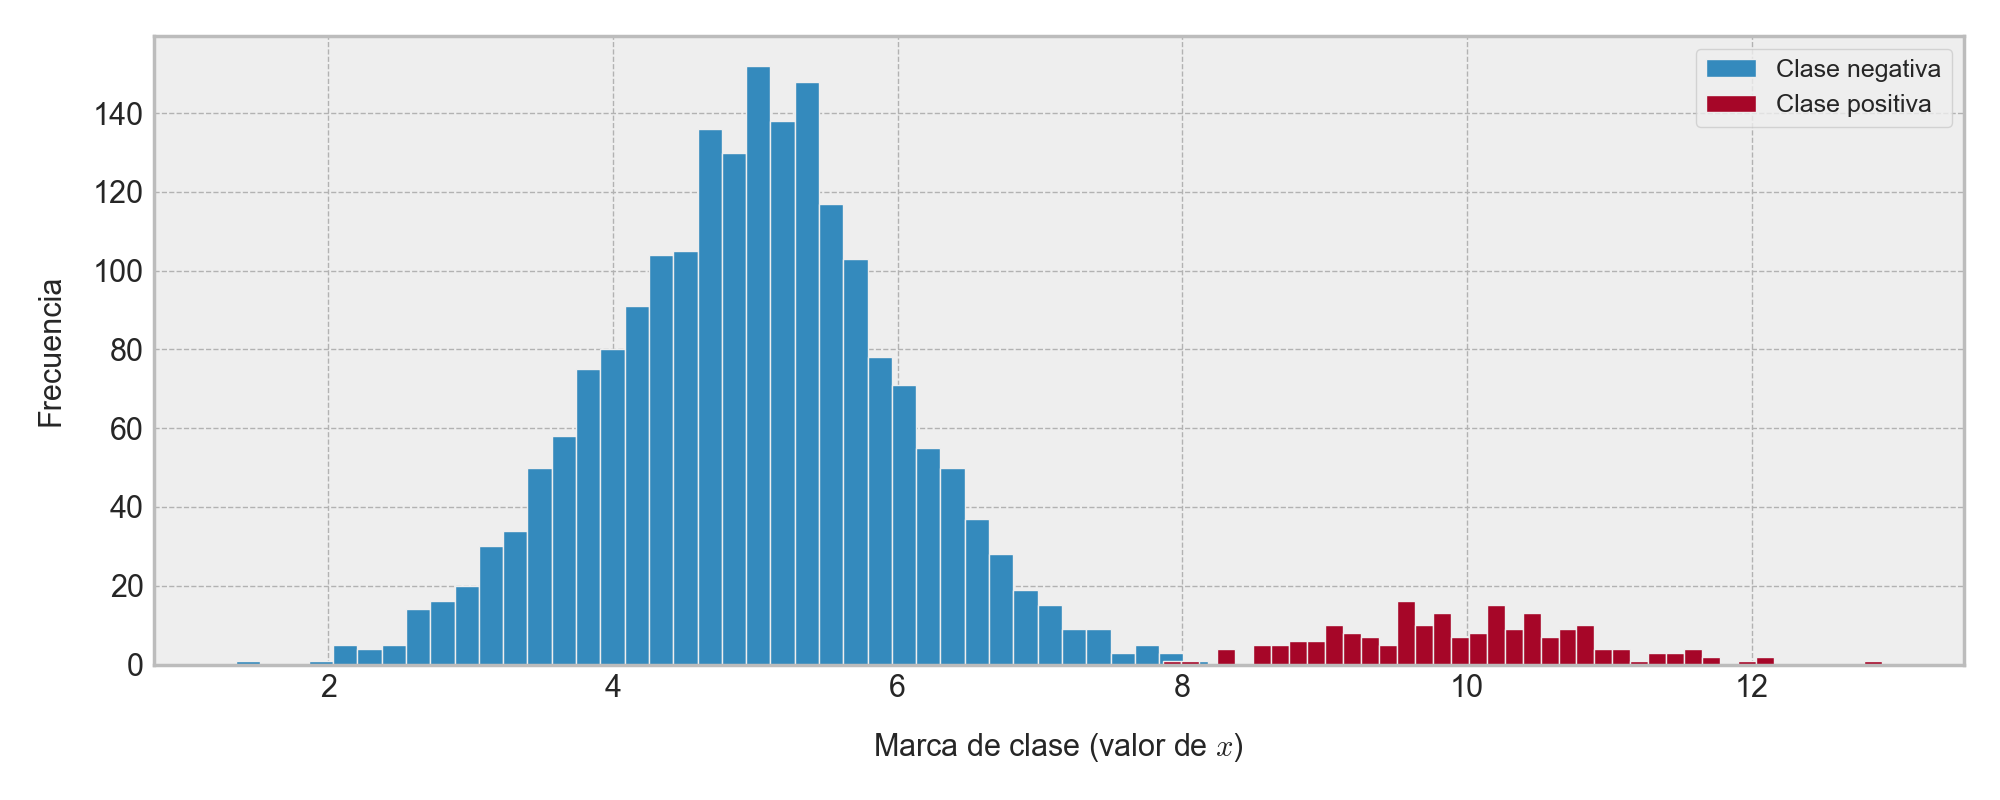

In [24]:
# Visualizamos nuestro conjunto de datos.
fig, ax = plt.subplots(figsize=(10, 4))
p = data.groupby("label").plot(kind="hist", bins=40, alpha=1.0, ax=ax)
ax.legend(
    ["Clase negativa", "Clase positiva"], loc="best", fontsize=9, frameon=True,
)
ax.set_xlabel(r"Marca de clase (valor de $x$)", fontsize=11, labelpad=10)
ax.set_ylabel("Frecuencia", fontsize=11, labelpad=10)
plt.tight_layout();

Puede ser algo difícil de notar, pero existe un cierto nivel mínimo de superposición entre ambas distribuciones en torno al valor $x=8$, donde existen instancias que pertenecen a ambas clases. Supongamos ahora que deseamos entrenar un modelo de árbol de decisión sobre este conjunto de datos. Por lo tanto, el primer paso a la hora de generar el *crecimiento* de dicho árbol, es dividir el nodo raíz (que llamaremos $t$) conforme un determinado split, que a su vez se define conforme una serie de valores que dependen de las promedios entre cada par de instancias que describen $x$, habiendo ordenado previamente sus valores.

En este ejemplo simplemente implementaremos una función sencilla que calculará el índice de Gini de un split, dado un umbral $\nu'_{k}$ tal que $3\leq \nu'_{k}\leq 12$, a fin de recubrir todo el espacio de entrada. Notemos que vamos a prescindir de calcular los valores medios entre cada par de puntos, ya que simplemente mostraremos cómo varía la traza de esta función de impureza y cómo podemos identificar, en forma gráfica, el valor mínimo de dicha función, a fin de determinar el mejor split en este caso particular.

Para ello, lo primero es definir nuestra función para calcular el correspondiente índice de Gini del split completo. Es decir, $i_{G}\left( s_{t},t \right) =\frac{m_{t_{L}}}{m_{t}} i_{G}\left( t_{L} \right) +\frac{m_{t_{R}}}{m_{t}} i_{G}\left( t_{R} \right)$, donde $t_{L}$ y $t_{R}$ son los nodos hijos izquierdo y derecho, respectivamente, de $t$. Equiparemos a nuestra función con un hiperparámetro Booleano denominado `debug`, que nos permitirá imprimir en pantalla los índices de Gini en cada nodo y del split completo una vez calculados:

In [25]:
def calc_gini_impurity(
    df: pd.DataFrame,
    val_col: str,
    label_col: str,
    pos_val: Any,
    split_point: float,
    debug: bool,
) -> float:
    """
    Función que realiza el cálculo de la impureza conforme el índice de Gini de un 
    conjunto de datos. El índice de Gini es una medida de la probabilidad de que una
    instancia aleatoria sea clasificada incorrectamente cuando una variable indepen-
    diente se utiliza para dividir un conjunto de datos en el nodo de un árbol de
    decisión. Mientras más pequeño sea el índice de Gini, mejor será esta división.

    Parámetros:
    -----------
    df : DataFrame de Pandas que contiene los datos de interés.
    val_col : Nombre de la variable independiente asignado a una columna de `df` que
        será utilizada para dividir nuestros datos.
    label_col : Nombre de la variable de respuesta asignado a una columna de `df`.
    pos_val : Valor de la variable de respuesta que representa a la clase positiva.
    split_point : Umbral de decisión que define a un split.
    debug : Variable opcional que, cuando se setea en `debug=True`, imprime en pantalla
        los valores calculados del índice de Gini y las ganancias de impureza a partir
        de las mezclas de los índices por nodo.

    Retorna:
    --------
    Media ponderada de los índices de Gini para las instancias que pertenecen a las
        clases positiva y negativa.
    """
    # Generamos una serie Booleana con los índices asociados al split.
    split_mask = df[val_col] >= split_point

    # Generamos otra serie que captura los índices asociados a la clase positiva.
    pos_label_mask = df[label_col] == pos_val

    # Calculamos los verdaderos y falsos positivos y negativos, respectivamente.
    tp = df[split_mask & pos_label_mask].shape[0]
    fp = df[split_mask & ~pos_label_mask].shape[0]
    tn = df[~split_mask & ~pos_label_mask].shape[0]
    fn = df[~split_mask & pos_label_mask].shape[0]

    # Calculamos los totales de instancias en la clase positiva y negativa.
    m_pos = tp + fp
    m_neg = tn + fn

    # Determinamos el total de instancias del conjunto de datos.
    m = df.shape[0]

    # Calculamos el índice de Gini asociado a cada subconjunto de instancias.
    if m_pos == 0:
        gini_positive = 0
    else:
        gini_positive = 1 - (tp / m_pos) ** 2 - (fp / m_pos) ** 2
    if m_neg == 0:
        gini_negative = 0
    else:
        gini_negative = 1 - (tn / m_neg) ** 2 - (fn / m_neg) ** 2

    # Calculamos la media ponderada de ambos índices (Gini del split completo).
    split_gini = gini_positive * (m_pos / m) + gini_negative * (m_neg / m)

    # Generamos las impresiones en pantalla de los índices de Gini (de ser
    # requeridas).
    if debug:
        print(
            f"Gini (clase positiva) = {round(gini_positive, 3)}"
            + "\n"
            + f"Gini (clase negativa) = {round(gini_negative, 3)}"
            + "\n"
            + f"Gini (split) = {round(split_gini, 3)}"
        )
    return split_gini

La función de impureza así definida nos permitirá calcular el índice de Gini de cualquier split descrito por un umbral definido por el parámetro `split_point`. Por ejemplo, el índice de Gini del split que divide a $t$ en los conjuntos $x\leq 7.9$ (nodo izquierdo) y $x>7.9$ (nodo derecho) tomando el conjunto de datos previamente construido como espacio de entrada de un nodo $t$ (que guardamos en la variable `data`), se calcula de manera directa como:

In [26]:
# Calculamos el índice de Gini para el umbral indicado.
gini_val = calc_gini_impurity(df=data, val_col="value", label_col="label", pos_val="Positive", split_point=7.9, debug=True)

Gini (clase positiva) = 0.029
Gini (clase negativa) = 0.001
Gini (split) = 0.004


Ahora vamos a generar la traza de nuestra función de impureza para el intervalo $3\leq \nu'_{k}\leq 12$:

In [27]:
# Definimos un set de umbrales de decisión.
thresholds = np.linspace(start=3, stop=12, num=100)

In [28]:
# Calculamos los índices de Gini para splits definidos por estos umbrales.
gini_vals = []
for thresh_k in thresholds:
    gini_vals.append(
        calc_gini_impurity(
            df=data, val_col="value", label_col="label", pos_val="Positive", 
            split_point=thresh_k, debug=False,
        )
    )

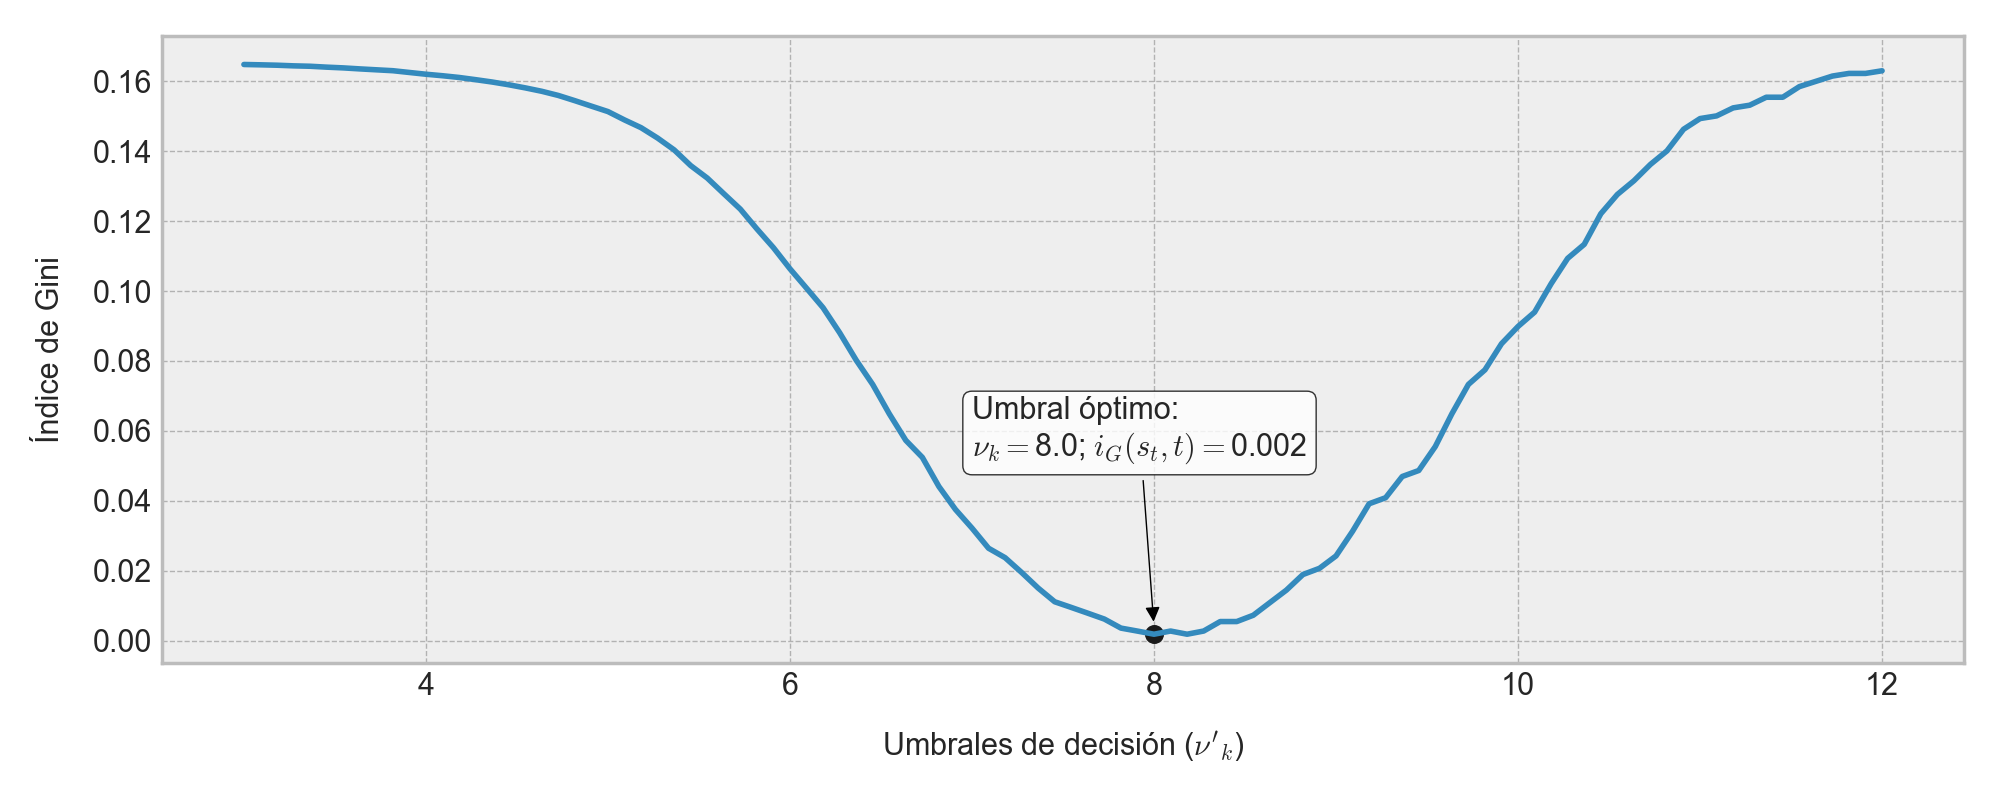

In [29]:
# Visualizamos la traza de nuestra función de impureza basada en el índice de Gini.
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, gini_vals, lw=2.0)
ax.scatter(
    thresholds[np.argmin(gini_vals)], np.min(gini_vals), s=40, marker="o", 
    color="k",
)
ax.annotate(
    text="Umbral óptimo:\n" + r"$\nu_{k}=$" 
    + f"{thresholds[np.argmin(gini_vals)].round(3)}; " + r"$i_{G}(s_{t},t)=$"
    + f"{np.min(gini_vals).round(3)}", 
    xy=(thresholds[np.argmin(gini_vals)], np.min(gini_vals) + 0.002), 
    xytext=(7.0, 0.06), size=11, va="center", arrowprops=dict(color="black", arrowstyle="-|>"),
    bbox=dict(boxstyle="round", alpha=0.8, color="white", ec="black"),
)
ax.set_xlabel(r"Umbrales de decisión ($\nu'_{k}$)", fontsize=11, labelpad=10)
ax.set_ylabel("Índice de Gini", fontsize=11, labelpad=10)
plt.tight_layout();

Podemos observar que el mejor split en este nodo $t$ es aquel que divide al espacio de entrada conforme los intervalos $x\leq 8$ y $x>8$. El índice de Gini de este split, que es el mínimo de todos los calculados en el espacio de entrada completo, es $i_{G}(s_{t},t)= 0.002$. ◼︎

#### Caso de variables categóricas.
Consideremos el mismo contexto anterior, pero siendo ahora $\mathbf{x}_{j}$ una variable categórica (recordemos que $\mathbf{x}_{j}$ es una columna de la matriz de diseño $\mathbf{X}\in \mathbb{R}^{m\times n}$). Sea $\mathcal{P}(\mathbf{x}_{j})$ el conjunto de todas las particiones del espacio de entrada $\mathcal{X}_{j}=\left\{ b_{1},...,b_{k} \right\}$, como se define en la ecuación (6.22). El número de particiones no binarias en este conjunto es igual a $2^{k-1}-1$, el cual puede convertirse rápidamente en intratable si deseamos explorarlo de manera exhaustiva a medida que $k$ crece. Afortunadamente, en problemas de clasifición binaria, es posible reducir esta complejidad exponencial a la observación de $k-1$ particiones gracias al siguiente resultado.

**<font color='indianred'>Teorema 6.2 – Lema de agrupación:</font>** *Sea $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right) :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$ un conjunto de entrenamiento, con $\mathbf{X}$ una matriz diseño que contiene, al menos, una variable categórica. Sea $\mathbf{x}_{j}\in \mathbb{R}^{n}$ una de tales variables, siendo $\mathcal{X}_{j}$ su correspondiente subespacio de entrada. Sea $f:\mathcal{X}\longrightarrow \mathcal{Y}$ un modelo de árbol de decisión, con $\mathcal{X}$ e $\mathcal{Y}$ los espacios de entrada y salida de $\mathcal{D}$. Reordenemos las categorías que comprenden $\mathcal{X}_{j}$ de manera tal que*

$$\begin{array}{c}p\left( c_{1}|t\wedge x_{ij}=b_{1} \right) \leq p\left( c_{1}|t\wedge x_{ij}=b_{2} \right) \leq \cdots \leq p\left( c_{1}|t\wedge x_{ij}=b_{k} \right)\\ p\left( c_{2}|t\wedge x_{ij}=b_{1} \right) \leq p\left( c_{2}|t\wedge x_{ij}=b_{2} \right) \leq \cdots \leq p\left( c_{2}|t\wedge x_{ij}=b_{k} \right)\\ \vdots \  \  \  \  \vdots \  \  \  \  \vdots \  \  \  \  \vdots\\ p\left( c_{r}|t\wedge x_{ij}=b_{1} \right) \leq p\left( c_{r}|t\wedge x_{ij}=b_{2} \right) \leq \cdots \leq p\left( c_{r}|t\wedge x_{ij}=b_{k} \right)\end{array}$$
<p style="text-align: right;">$(6.48)$</p>

*Donde $t$ es un nodo arbitrario del modelo y $c_{1},...,c_{r}$ son los elementos que constituyen $\mathcal{Y}$. Si la función de impureza $i(t)$ satisface los requerimientos del teorema (6.1), entonces uno de los $k-1$ subconjuntos $\mathcal{B} =\left\{ b_{1},...,b_{h} \right\}$, para $h=1,...,k-1$, define una partición binaria de las instancias que se propagan hasta $t$, de manera tal que*

$$\begin{array}{l}\mathcal{D}_{t_{L}}^{\mathcal{B}} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) :\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t} \wedge x_{ij}\in \mathcal{B} \right\}\\ \mathcal{D}_{t_{R}}^{\mathcal{B}} =\left\{ \left( \mathbf{x}_{i} ,y_{i} \right) :\left( \mathbf{x}_{i} ,y_{i} \right) \in \mathcal{D}_{t} \wedge x_{ij}\in \overline{\mathcal{B}} \right\}\end{array}$$
<p style="text-align: right;">$(6.49)$</p>

*Donde $\overline{\mathcal{B}}$ es el complemento de $\mathcal{B}$. La partición (6.49), por tanto, maximiza $\triangle i(s_{t},t)$, para $s_{t}\in \mathcal{P}(\mathbf{x}_{j})$.* □

En otras palabras, no hace falta probar todas las particiones de $\mathcal{X}_{j}=\left\{ b_{1},...,b_{k} \right\}$; basta con probar las $k-1$ particiones que separan categorías consecutivas en la ordenación de $\mathbf{x}_{j}$. El teorema (6.2) respalda por tanto la implementación eficiente de los árboles de decisión con variables categóricas.

**Ejemplo 6.7 – ¿Cómo impacta el lema de agrupación?:** Consideremos el nodo $t$ de un árbol de decisión. Si $\mathbf{x}_{j}$ es una variable independiente categórica que es parte de la matriz de diseño $\mathbf{X}\in \mathbb{R}^{m\times n}$ (con $1\leq j\leq n$), parte del entrenamiento de este modelo involucrará determinar el mejor split conforme el subespacio de entrada $\mathcal{X}_{j}$. Sea $\mathcal{D}_{t}$ el subconjunto de instancias de entrenamiento que se propaga hasta $t$, el cual especificamos en la Tabla (6.4).

<p style="text-align: center;">Tabla (6.4): Tabla que describe al subconjunto de entrenamiento para el ejemplo (6.7)</p>

| Índice ($i$) | Variable $\mathbf{x}_{j}$ | Variable $y$ |
| :----------: | :-----------------------: | :----------: |
| 1 | $A$ | $c_{1}$ |
| 2 | $A$ | $c_{1}$ |
| 3 | $B$ | $c_{2}$ |
| 4 | $B$ | $c_{1}$ |
| 5 | $B$ | $c_{2}$ |
| 6 | $C$ | $c_{2}$ |
| 7 | $C$ | $c_{2}$ |
| 8 | $C$ | $c_{2}$ |
| 9 | $D$ | $c_{1}$ |

De la Tabla (6.4), notamos que $\mathcal{X}_{j} =\left\{ A,B,C,D \right\}$ y, en total, hay $m_{t}=9$ instancias que se propagan hasta el nodo $t$. La distribución de las clases por cada categoría de $\mathcal{X}_{j}$ es la siguiente:

- Categoría $A$: $2$ instancias, ambas pertenecientes a la clase $c_{1}\Longrightarrow p\left( c_{1}|x_{ij}=A \right) =\frac{2}{2} =1\wedge p\left( c_{2}|x_{ij}=A \right) =0$.
- Categoría $B$: $3$ instancias, las que se corresponden con las clases $\left\{ c_{2},c_{1},c_{2} \right\}\Longrightarrow p\left( c_{1}|x_{ij}=B \right) =\frac{1}{3} \wedge p\left( c_{2}|x_{ij}=B \right) =\frac{2}{3}$.
- Categoría $C$: $3$ instancias, todas pertenecientes a la clase $c_{2}\Longrightarrow p\left( c_{1}|x_{ij}=C \right) =0\wedge p\left( c_{2}|x_{ij}=C \right) =\frac{3}{3} =1$
- Categoría $D$: $1$ instancia de clase $c_{1}\Longrightarrow p\left( c_{1}|x_{ij}=D \right) =1\wedge p\left( c_{2}|x_{ij}=D \right) =0$.

De manera general, sumando todas las instancias que llegan a $t$, tenemos $4$ instancias que pertenecen a la clase $c_{1}$ y $5$ instancias que pertenecen a la clase $c_{2}$.

Conforme el teorema (6.2), ordenamos las categorías con respecto a la probabilidad de alguna clase (típicamente la que se usa en la medida de impureza, o simplemente escogiendo una clase de referencia; en este ejercicio usaremos $c_{1}$):

$$p\left( c_{1}|x_{ij}=C \right) =0<p\left( c_{1}|x_{ij}=B \right) =\frac{1}{3} <p\left( c_{1}|x_{ij}=A \right) =1=p\left( c_{1}|x_{ij}=D \right) =1$$
<p style="text-align: right;">$(6.50)$</p>

Podemos romper el empate de $A$ y $D$ en cualquier orden (por ejemplo, dejar $A$ antes que $D$). De esta manera, el orden de menor a mayor es $C<B<A<D$.

La clave del teorema (6.2) es que, si la función de impureza cumple las propiedades del teorema (6.1) (ser estrictamente cóncava, simétrica verticalmente, etc.), no necesitamos probar todos los posibles subconjuntos del subespacio de entrada $\mathcal{X}_{j} =\left\{ A,B,C,D \right\}$; basta con probar las tres divisiones contiguas siguientes: $\left\{ C \right\} \  |\  \left\{ B,A,D \right\}$, $\left\{ C,B \right\} \  |\  \left\{ A,D \right\}$ y $\left\{ C,B,A \right\} \  |\  \left\{ D \right\}$. Si usamos como función de impureza al índice de Gini, tendremos que:

- **En el nodo $t$:** Se tiene que $m_{t}=9$, $p(c_{1}|t)=\frac{4}{9}$ y $p(c_{2}|t)=\frac{5}{9}$. Por lo tanto, $i_{G}\left( t \right) =1-\left( \frac{4}{9} \right)^{2} -\left( \frac{5}{9} \right)^{2} \approx 0.4938$.
- **Partición 1 – $\left\{ C \right\} \  |\  \left\{ B,A,D \right\}$:**
    - Nodo hijo izquierdo ($\left\{ C \right\}$): Las tres instancias con $x_{ij}=C$ pertenecen a la clase $c_{2}$. Por lo tanto, $p(c_{2}|t_{L})=1$ e $i_{G}\left( t_{L} \right) =1-1^{2}=0$.
    - Nodo hijo derecho ($\left\{ B,A,D \right\}$): Juntamos las instancias con $x_{ij}=B$ ($3$ instancias), $x_{ij}=A$ ($2$ instancias) y $x_{ij}=D$ ($1$ instancia), lo que nos da un total de $m_{t_{R}}=6$. Luego, $m_{t_{R}|y_{i}=c_{1}}\left( x_{ij}=B \right) =1\wedge m_{t_{R}|y_{i}=c_{1}}\left( x_{ij}=B \right) =2$, $m_{t_{R}|y_{i}=c_{1}}\left( x_{ij}=A \right) =2\wedge m_{t_{R}|y_{i}=c_{1}}\left( x_{ij}=A \right) =0$ y $m_{t_{R}|y_{i}=c_{1}}\left( x_{ij}=D \right) =1\wedge m_{t_{R}|y_{i}=c_{1}}\left( x_{ij}=D \right) =0$. Así que $p\left( c_{1}|t_{R} \right) =\frac{4}{6} =\frac{2}{3} \wedge p\left( c_{2}|t_{R} \right) =\frac{1}{3}$, con lo cual $i_{G}\left( t_{R} \right) =1-\left( \frac{2}{3} \right)^{2} -\left( \frac{1}{3} \right)^{2} \approx 0.4444$.
    - Ponderación de ambos nodos hijos: De los resultados anteriores, $i_{G}\left( s_{t},t \right) =\frac{m_{t_{L}}}{m_{t}} i_{G}\left( t_{L} \right) +\frac{m_{t_{R}}}{m_{t}} i_{G}\left( t_{R} \right) =\frac{3}{9} \cdot 0+\frac{6}{9} \cdot \frac{4}{9} \approx 0.2963$.
    - Ganancia de impureza: $\triangle i\left( s_{t},t \right) =i_{G}\left( t \right) -i_{G}\left( s_{t},t \right) \approx 0.4938-0.2963=0.1975$.

- **Partición 2 – $\left\{ C,B \right\} \  |\  \left\{ A,D \right\}$:**
    - Nodo hijo izquierdo ($\left\{ C,B \right\}$): Juntamos las instancias con $x_{ij}=C$ ($3$ instancias) y $x_{ij}=B$ ($3$ instancias), lo que nos da un total de $m_{t_{L}}=6$. Luego, $m_{t_{L}|y_{i}=c_{1}}\left( x_{ij}=C \right) =0\wedge m_{t_{L}|y_{i}=c_{2}}\left( x_{ij}=C \right) =3$ y $m_{t_{L}|y_{i}=c_{1}}\left( x_{ij}=B \right) =1\wedge m_{t_{L}|y_{i}=c_{2}}\left( x_{ij}=B \right) =2$. Así que $p\left( c_{1}|t_{L} \right) =\frac{1}{6} \wedge p\left( c_{2}|t_{L} \right) =\frac{5}{6}$, con lo cual $i_{G}\left( t_{L} \right) =1-\left( \frac{1}{6} \right)^{2} -\left( \frac{5}{6} \right)^{2} \approx 0.2778$.
    - Nodo hijo derecho ($\left\{ A,D \right\}$): Juntamos las instancias con $x_{ij}=A$ ($2$ instancias) y $x_{ij}=D$ ($1$ instancias), lo que nos da un total de $m_{t_{R}}=3$. Todas las instancias pertenecen a la clase $c_{1}$. Por lo tanto, $p\left( c_{1}|t_{R} \right) =1$ e $i_{G}(t_{R})=1-1^{2}=0$.
    - Ponderación de ambos nodos hijos: De los resultados anteriores, $i_{G}\left( s_{t},t \right) =\frac{m_{t_{L}}}{m_{t}} i_{G}\left( t_{L} \right) +\frac{m_{t_{R}}}{m_{t}} i_{G}\left( t_{R} \right) =\frac{6}{9} \cdot 0.2778+\frac{3}{9} \cdot 0\approx 0.1852$.
    - Ganancia de impureza: $\triangle i_{G}\left( s_{t},t \right) =i_{G}\left( t \right) -i_{G}\left( s_{t},t \right) \approx 0.4938-0.1852=0.3086$.

- **Partición 3 – $\left\{ C,B,A \right\} \  |\  \left\{ D \right\}$:**
    - Nodo hijo izquierdo ($\left\{ C,B,A \right\}$): Juntamos las instancias con $x_{ij}=C$ ($3$ instancias), $x_{ij}=B$ ($1$ instancia) y $x_{ij}=A$ ($2$ instancias), lo que nos da un total de $m_{t_{L}}=6$. Luego, $m_{t_{L}|y_{i}=c_{1}}\left( x_{ij}=C \right) =0\wedge m_{t_{L}|y_{i}=c_{2}}\left( x_{ij}=C \right) =3$, $m_{t_{L}|y_{i}=c_{1}}\left( x_{ij}=B \right) =1\wedge m_{t_{L}|y_{i}=c_{2}}\left( x_{ij}=B \right) =2$ y $m_{t_{L}|y_{i}=c_{1}}\left( x_{ij}=A \right) =2\wedge m_{t_{L}|y_{i}=c_{2}}\left( x_{ij}=A \right) =0$. Así que $p\left( c_{1}|t_{L} \right) =\frac{3}{8} \wedge p\left( c_{2}|t_{L} \right) =\frac{5}{8}$, con lo cual $i_{G}\left( t_{L} \right) =1-\left( \frac{3}{8} \right)^{2} -\left( \frac{5}{8} \right)^{2} =0.46875$.
    - Nodo hijo derecho ($\left\{ D \right\}$): Sólo una instancia perteneciente a la clase $c_{1}$. Por lo tanto, $i_{G}(t_{R})=0$.
    - Ponderación de ambos nodos hijos: De los resultados anteriores, $i_{G}\left( s_{t},t \right) =\frac{m_{t_{L}}}{m_{t}} i_{G}\left( t_{L} \right) +\frac{m_{t_{R}}}{m_{t}} i_{G}\left( t_{R} \right) =\frac{8}{9} \cdot 0.46875+\frac{1}{9} \cdot 0\approx 0.4167$.
    - Ganancia de impureza: $\triangle i_{G}\left( s_{t},t \right) =i_{G}\left( t \right) -i_{G}\left( s_{t},t \right) \approx 0.4938-0.4167=0.0771$.

Notemos que la máxima ganancia de impureza se logra en la partición 2 ($\left\{ C,B \right\} \  |\  \left\{ A,D \right\}$), lo que confirma el teorema (6.2): Ordenamos las categorías por su probabilidad y sólo probamos las divisiones contiguas en ese orden ($k-1=3$ cortes en nuestro ejercicio). De este modo, gracias al reordenamiento del subespacio de entrada $\mathcal{X}_{j}$ y a la propiedad de concavidad del índice de Gini, no fue necesario explorar exhaustivamente todas las particiones posibles de $\mathcal{X}_{j}$ (que serían $2^{4-1}=8$ particiones en total). En su lugar, sólo hicimos 3 particiones contiguas, ahorrando mucho tiempo y confirmando cuál era la mejor de todas ellas. ◼︎